# 1. Problema de Negócio

Utilizar algoritmo de aprendizado de máquina com o objetivo de identificar padrões de comorbidades de óbitos por Alzheimer no Brasil (2012–2022)

# 2. Conexão e Análise dos Dados

In [2]:
# Importando os pacotes

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Importando o dataFrame - todos como str

df = pd.read_csv('dados_filtrados.csv', sep=';', dtype=str)

In [4]:
df

CONTADOR ORIGEM TIPOBITO   DTOBITO HORAOBITO NATURAL0    DTNASC IDADE  \
0         42081      1        2  28042012      1800      NaN  18071914   497   
1         52106      1        2  12072012      1440      NaN  07101944   467   
2         25135      1        2  30072012      1930      NaN  03091938   473   
3         10487      1        2  29012012      1745      NaN  23061928   483   
4         10560      1        2  27042012      1300      NaN  13041920   492   
...         ...    ...      ...       ...       ...      ...       ...   ...   
211588  1514999      1        2  22122022      0857      843  15041939   483   
211589  1515062      1        2  23082022      0920      831  01031953   469   
211590  1515229      1        2  05072022      2000      833  24071938   483   
211591  1515340      1        2  06072022      2358      190  26101930   491   
211592  1515396      1        2  06072022      0655      831  26111929   492   

       SEXO RACACOR  ... STDOEPIDEM STDONOVA DTCADINV TPOBITOCOR DTCONINV  \
0         2       4  ...          0        1      NaN        NaN      NaN   
1         1       1  ...          0        1      NaN        NaN      NaN   
2         1       1  ...          0        1      NaN        NaN      NaN   
3         1       1  ...          0        1      NaN        NaN      NaN   
4         2       1  ...          0        1      NaN        NaN      NaN   
...     ...     ...  ...        ...      ...      ...        ...      ...   
211588    2       1  ...          0        1      NaN        NaN      NaN   
211589    2       4  ...          0        1      NaN        NaN      NaN   
211590    2       1  ...          0        1      NaN        NaN      NaN   
211591    2       1  ...          0        1      NaN        NaN      NaN   
211592    2       4  ...          0        1      NaN        NaN      NaN   

       DTCADINF MORTEPARTO DTCONCASO NUDIASOBIN   ANO  
0           NaN        NaN       NaN        NaN  2012  
1           NaN        NaN       NaN        NaN  2012  
2           NaN        NaN       NaN        NaN  2012  
3           NaN        NaN       NaN        NaN  2012  
4           NaN        NaN       NaN        NaN  2012  
...         ...        ...       ...        ...   ...  
211588      NaN        NaN       NaN        NaN  2022  
211589      NaN        NaN       NaN        NaN  2022  
211590      NaN        NaN       NaN        NaN  2022  
211591      NaN        NaN       NaN        NaN  2022  
211592      NaN        NaN       NaN        NaN  2022  

[211593 rows x 68 columns]

In [5]:
# Descrição dos dados

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211593 entries, 0 to 211592
Data columns (total 68 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   CONTADOR    211593 non-null  object
 1   ORIGEM      211593 non-null  object
 2   TIPOBITO    211593 non-null  object
 3   DTOBITO     211593 non-null  object
 4   HORAOBITO   208415 non-null  object
 5   NATURAL0    174587 non-null  object
 6   DTNASC      211484 non-null  object
 7   IDADE       211593 non-null  object
 8   SEXO        211593 non-null  object
 9   RACACOR     205564 non-null  object
 10  ESTCIV      206211 non-null  object
 11  ESC         200701 non-null  object
 12  OCUP        187751 non-null  object
 13  CODMUNRES   211593 non-null  object
 14  LOCOCOR     211593 non-null  object
 15  CODESTAB    132717 non-null  object
 16  CODMUNOCOR  211593 non-null  object
 17  IDADEMAE    0 non-null       object
 18  ESCMAE      0 non-null       object
 19  SERIESCMAE  0 non-null 

In [6]:
# Calculando o percentual dos dados que estão em branco

percentual_nulos = (df.isnull().sum() / len(df)) * 100
percentual_nulos[percentual_nulos > 0].sort_values(ascending=False)

PESO          100.000000
OCUPMAE       100.000000
CAUSAMAT      100.000000
OBITOPARTO    100.000000
PARTO         100.000000
GESTACAO      100.000000
SEMAGESTAC    100.000000
GRAVIDEZ      100.000000
QTDFILMORT    100.000000
QTDFILVIVO    100.000000
SERIESCMAE    100.000000
ESCMAE        100.000000
IDADEMAE      100.000000
ACIDTRAB      100.000000
DTCADINF      100.000000
MORTEPARTO    100.000000
DTCONCASO     100.000000
ESCMAE2010    100.000000
DTCADINV       99.999055
TPOBITOCOR     99.999055
DTCONINV       99.999055
NUDIASOBIN     99.998582
FONTE          99.983931
CIRCOBITO      99.982986
TPMORTEOCO     99.779766
OBITOPUERP     99.776930
OBITOGRAV      99.776458
CIRURGIA       99.180030
EXAME          99.167269
COMUNSVOIM     93.338627
DTINVESTIG     87.268955
FONTEINV       86.826124
LINHAD         77.300289
LINHAC         50.567363
LINHAII        45.238264
CODESTAB       37.277226
TPPOS          34.498778
ASSISTMED      28.642252
NECROPSIA      28.428162
LINHAB         21.025270


In [7]:
# Cálculo da quantidade e percentual de colunas com dados faltantes no DataFrame

qtd_colunas_valores_faltantes = percentual_nulos[percentual_nulos > 0].count()
print(f'Total de colunas com dados faltantes: {qtd_colunas_valores_faltantes}')
print(f'Percentual das colunas com dados faltantes: {(qtd_colunas_valores_faltantes / 68) * 100:.2f}%')

Total de colunas com dados faltantes: 57
Percentual das colunas com dados faltantes: 83.82%


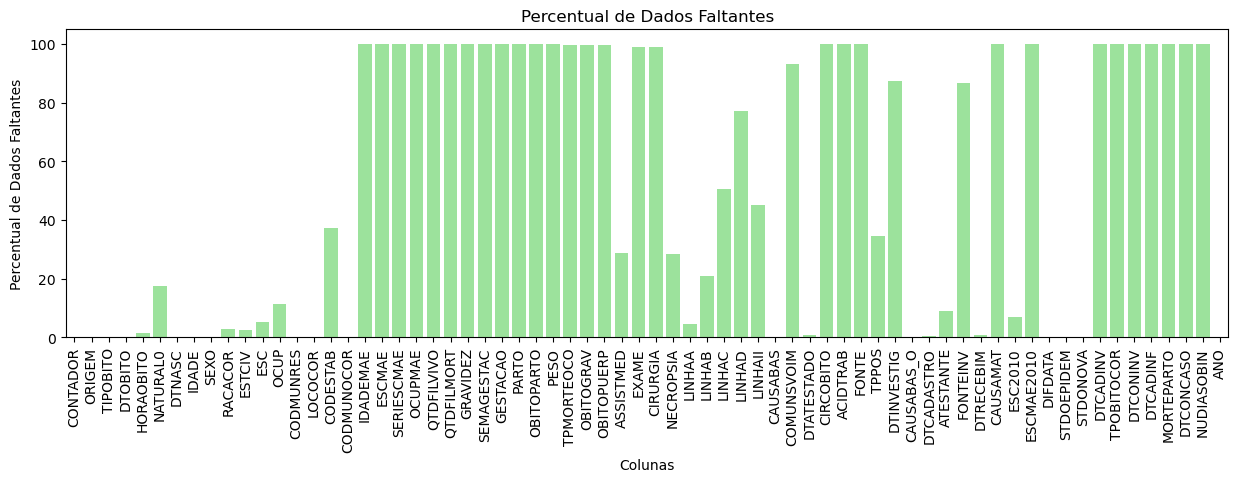

In [8]:
# Gráfico em barra dos valores nulos

plt.figure(figsize=(15, 4))
sns.barplot(x=percentual_nulos.index, y=percentual_nulos.values, color='lightgreen')
plt.title('Percentual de Dados Faltantes')
plt.xlabel('Colunas')
plt.ylabel('Percentual de Dados Faltantes')
plt.xticks(rotation=90) # deixa os labels em pé, melhor p ver

plt.show()

## Dicionário dos dados de Mortalidade

| Coluna         | Descrição                                                                                                         | Tipo  | % Dados Faltantes | Ação        |
|----------------|-------------------------------------------------------------------------------------------------------------------|-------|-------------------|-------------|
| Contador       | ID ordenado dos registros na tabela                                                                              | Int   | -                 | Descartar   |
| Origem         | Banco de dados de Origem da Informação                                                                           | Int   | -                 | Descartar   |
| TIPOBITO       | Óbito Fetal - Morte antes do nascimento                                                                          | Int   | -                 | Descartar   |
| DtObito        | Data em que ocorreu o óbito                                                                                      | Str   | -                 | Descartar   |
| HORAOBITO      | Hora do óbito                                                                                                    | Str   | -                 | Descartar   |
| Natural0       | País e Unidade de Federação onde o falecido nasceu                                                               | Int   | 17%               | Manter      |
| DTNASC         | Data de Nascimento                                                                                               | Str   | -                 | Descartar   |
| Idade          | Idade do Falecido codificada                                                                                     | Int   | -                 | Manter      |
| Sexo           | Sexo do Falecido                                                                                                 | Int   | -                 | Manter      |
| RacaCor        | Cor informada pelo responsável pelas informações                                                                 | Int   | 2%                | Manter      |
| EstCiv         | Estado Civil do falecido                                                                                         | Int   | 2%                | Manter      |
| Esc            | Escolaridade em anos                                                                                             | Int   | 5%                | Manter      |
| OCUP           | Tipo de trabalho predominante na vida do falecido                                                                | Int   | 11%               | Manter      |
| CodMunRes      | Código do município de residência                                                                                | Int   | -                 | Manter      |
| LOCOCOR        | Local de ocorrência do óbito                                                                                     | Int   | -                 | Manter      |
| CODESTAB       | Código do Estabelecimento                                                                                        | Int   | -                 | Descartar   |
| CODMUNOCOR     | Código do município onde ocorreu o óbito                                                                         | Int   | -                 | Manter      |
| IdadeMae       | Idade da mãe                                                                                                     | Int   | 100%              | Descartar   |
| ESCMAE         | Escolaridade da mãe                                                                                              | Int   | 100%              | Descartar   |
| SERIESCMAE     | Última série escolar concluída pela mãe                                                                          | Int   | 100%              | Descartar   |
| OCUPMAE        | Trabalho da mãe                                                                                                  | Int   | 100%              | Descartar   |
| QTDFILVIVO     | Número de filhos vivos                                                                                           | Int   | 100%              | Descartar   |
| QTDFILMORT     | Número de filhos mortos                                                                                          | Int   | 100%              | Descartar   |
| GRAVIDEZ       | Óbito na gravidez                                                                                                | Int   | 100%              | Descartar   |
| SEMAGESTAC     | Semanas de gestação                                                                                              | Int   | 100%              | Descartar   |
| GESTACAO       | Faixas de semanas de gestação                                                                                    | Int   | 100%              | Descartar   |
| PARTO          | Tipo de parto                                                                                                    | Int   | 100%              | Descartar   |
| OBITOPARTO     | Óbito no parto                                                                                                   | Int   | 100%              | Descartar   |
| PESO           | Peso ao nascer                                                                                                   | Int   | 100%              | Descartar   |
| TPMORTEOCO     | Situação gestacional/pósgestacional do óbito                                                                    | Int   | 99%               | Descartar   |
| OBITOGRAV      | Óbito na gravidez                                                                                                | Int   | 99%               | Descartar   |
| OBITOPUERP     | Óbito no puerpério                                                                                               | Int   | 99%               | Descartar   |
| ASSISTMED      | Atendimento médico durante a enfermidade                                                                         | Int   | 28%               | Manter      |
| EXAME          | Realização de exame                                                                                              | Int   | 99%               | Descartar   |
| CIRURGIA       | Realização de cirurgia                                                                                           | Int   | 99%               | Descartar   |
| NECROPSIA      | Execução ou não de necropsia                                                                                     | Int   | 28%               | Manter      |
| LINHAA         | Causa terminal                                                                                                   | Str   | -                 | Manter      |
| LINHAB         | Causa antecedente                                                                                                | Str   | -                 | Manter      |
| LINHAC         | Causa antecedente                                                                                                | Str   | -                 | MCausa Básicaanter      |
| LINHAD         | Causa básica                                                                                                     | Str   | -                 | Manter      |
| LINHAII        | Causa contribuinte                                                                                               | Str   | -                 | Manter      |
| CAUSABAS       | Causa básica                                                                                                     | Str   | -                 | Manter      |
| COMUNSVOIM     | Código do município do SVO ou IML                                                                                | Int   | 92%               | Descartar   |
| DTATESTADO     | Data do atestado                                                                                                 | Str   | -                 | Descartar   |
| CIRCOBITO      | Tipo de morte violenta                                                                                           | Int   | 99%               | Descartar   |
| ACIDTRAB       | Óbito relacionado ao trabalho                                                                                    | Int   | 99%               | Descartar   |
| FONTE          | Fonte da informação                                                                                              | Int   | -                 | Descartar   |
| TPPOS          | Óbito investigado                                                                                                | Int   | 100%              | Descartar   |
| DTINVESTIG     | Data da investigação                                                                                             | Str   | -                 | Descartar   |
| CAUSABAS_O     | Causa básica informada antes da resseleção                                                                       | Str   | -                 | Manter      |
| DTCADASTRO     | Data do cadastro                                                                                                 | Str   | -                 | Descartar   |
| ATESTANTE      | Médico atendeu o paciente?                                                                                       | Int   | 10%               | Manter      |
| FONTEINV       | Fonte da investigação                                                                                            | Int   | 86%               | Descartar   |
| DTRECEBIM      | Data de recebimento                                                                                              | Str   | -                 | Descartar   |
| CAUSAMAT       | CID causa materna                                                                                                | Int   | 100%              | Descartar   |
| ESC2010        | Escolaridade última série concluída (falecido)                                                                   | Int   | 7%                | Manter      |
| ESCMAE2010     | Escolaridade última série concluída (mãe)                                                                        | Int   | 100%              | Descartar   |
| DIFDATA        | Diferença entre datas                                                                                            | Int   | -                 | Descartar   |
| STDOEPIDEM     | Status DO Epidemiológica                                                                                         | Int   | -                 | Descartar   |
| STDONOVA       | Status DO Nova                                                                                                   | Int   | -                 | Descartar   |
| DTCADINV       | Data do cadastro de investigação                                                                                 | Str   | -                 | Manter      |
| TPOBITOCOR     | Momento da ocorrência do óbito                                                                                   | Int   | -                 | Descartar   |
| DTCONINV       | Data da conclusão da investigação                                                                                | Str   | -                 | Manter      |
| DTCADINF       | Indica se houve investigação                                                                                     | Str   | -                 | Manter      |
| MORTEPARTO     | Falta descrição na fonte                                                                                         | Int   | -                 | Descartar   |
| DTCONCASO      | Data da conclusão do caso                                                                                        | Str   | -                 | Descartar   |
| NUDIASOBIN     | Dias entre óbito e conclusão da investigação                                                                     | Int   | 99%               | Descartar   |
| ANO            | Ano que a morte ocorreu                                                                                          | Str   | -                 | Manter      |


# 3. Processamento de Dados

A etapa de limpeza dos dados, juntamente com a exploração. Ao longo dessa etapa, são identificadas as variáveis presentes, os tipos de dados, se há valores nulos, outliers e correlação para, então, realizar a limpeza, visto que dados “sujos” podem influenciar diretamente no desempenho dos algoritmos de aprendizagem, distorcendo os resultado. Após a realização dessa etapa, a precisão dos modelos é otimizada com a qualidade dos dados, reduzindo erros.

## 1. Alterando o dtype dos dados

In [13]:
# Pegando todas as colunas

col_names = df.columns

In [14]:
# Colunas que devem ser do tipo str

colunms_str = ['DTOBITO', 'HORAOBITO', 'DTNASC','LINHAA', 'LINHAB', 'LINHAC', 'LINHAD', 'LINHAII',
       'CAUSABAS', 'DTATESTADO', 'DTINVESTIG', 'CAUSABAS_O', 'DTCADASTRO', 'DTRECEBIM',  'DIFDATA',
       'STDOEPIDEM', 'STDONOVA', 'DTCADINV', 'TPOBITOCOR', 'DTCONINV',
       'DTCADINF', 'DTCONCASO']

In [15]:
# Convertendo as colunas que devem ser numéricas para Inteiro

for cols in col_names:
    if cols not in colunms_str:
        df[cols] = pd.to_numeric(df[cols], errors='coerce').astype('Int64')

## 2. Descartar colunas irrelevantes / que não serão utilizadas para esta pesquisa

In [17]:
df.drop(['CONTADOR', 'ORIGEM', 'TIPOBITO', 'DTOBITO', 'HORAOBITO', 'DTNASC', 'CODESTAB', 'IDADEMAE', 'ESCMAE', 'SERIESCMAE', 'OCUPMAE', 'QTDFILVIVO',
        'QTDFILMORT', 'GRAVIDEZ', 'SEMAGESTAC', 'GESTACAO', 'PARTO', 'OBITOPARTO', 'PESO', 'TPMORTEOCO', 'OBITOGRAV', 'OBITOPUERP', 'EXAME', 'CIRURGIA',
        'COMUNSVOIM', 'DTATESTADO', 'CIRCOBITO', 'ACIDTRAB', 'FONTE', 'TPPOS', 'DTINVESTIG', 'DTCADASTRO', 'FONTEINV', 'DTRECEBIM', 'CAUSAMAT', 'ESCMAE2010',
        'DIFDATA', 'STDOEPIDEM', 'STDONOVA', 'DTCADINV', 'TPOBITOCOR', 'DTCONINV', 'DTCADINF', 'MORTEPARTO', 'DTCONCASO', 'NUDIASOBIN'], axis=1, inplace=True)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211593 entries, 0 to 211592
Data columns (total 22 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   NATURAL0    174587 non-null  Int64 
 1   IDADE       211593 non-null  Int64 
 2   SEXO        211593 non-null  Int64 
 3   RACACOR     205564 non-null  Int64 
 4   ESTCIV      206211 non-null  Int64 
 5   ESC         200701 non-null  Int64 
 6   OCUP        187751 non-null  Int64 
 7   CODMUNRES   211593 non-null  Int64 
 8   LOCOCOR     211593 non-null  Int64 
 9   CODMUNOCOR  211593 non-null  Int64 
 10  ASSISTMED   150988 non-null  Int64 
 11  NECROPSIA   151441 non-null  Int64 
 12  LINHAA      201645 non-null  object
 13  LINHAB      167105 non-null  object
 14  LINHAC      104596 non-null  object
 15  LINHAD      48031 non-null   object
 16  LINHAII     115872 non-null  object
 17  CAUSABAS    211593 non-null  object
 18  CAUSABAS_O  211459 non-null  object
 19  ATESTANTE   192230 non-

## 3. Tratamento de Dados Faltantes

In [20]:
# Calculando o percentual dos dados que estão em branco

percentual_nulos = (df.isnull().sum() / len(df)) * 100
percentual_nulos[percentual_nulos > 0].sort_values(ascending=False)

LINHAD        77.300289
LINHAC        50.567363
LINHAII       45.238264
ASSISTMED     28.642252
NECROPSIA     28.428162
LINHAB        21.025270
NATURAL0      17.489236
OCUP          11.267859
ATESTANTE      9.151059
ESC2010        7.075376
ESC            5.147618
LINHAA         4.701479
RACACOR        2.849338
ESTCIV         2.543562
CAUSABAS_O     0.063329
dtype: float64

#### Imputação de dados

De acordo com o dicionário dos dados de mortalidade, algumas variáveis utilizam o valor 9 para indicar 'Não informado'.

In [23]:
df[['ASSISTMED', 'NECROPSIA', 'ESC2010', 'ESC', 'ESTCIV']] = df[['ASSISTMED', 'NECROPSIA', 'ESC2010', 'ESC', 'ESTCIV']].fillna(9)

Para as demais, será utilizado o valor 0 para indicar que 'Não se Aplica' / 'Não Informado'

In [25]:
df[['LINHAD', 'LINHAII', 'LINHAC', 'LINHAB', 'LINHAA', 'CAUSABAS_O', 'NATURAL0', 'OCUP', 'ATESTANTE', 'RACACOR']] = df[['LINHAD', 'LINHAII', 'LINHAC', 'LINHAB', 'LINHAA', 'CAUSABAS_O', 'NATURAL0', 'OCUP', 'ATESTANTE', 'RACACOR']].fillna(0)

In [26]:
df.isnull().values.any()

False

In [27]:
df.head() 

NATURAL0  IDADE  SEXO  RACACOR  ESTCIV  ESC    OCUP  CODMUNRES  LOCOCOR  \
0         0    497     2        4       3    1  999993     290840        3   
1         0    467     1        1       4    2  999993     290840        3   
2         0    473     1        1       2    3  621005     230240        3   
3         0    483     1        1       2    1       0     210230        3   
4         0    492     2        1       3    0       0     210150        3   

   CODMUNOCOR  ...  LINHAA  LINHAB LINHAC LINHAD LINHAII CAUSABAS CAUSABAS_O  \
0      290840  ...   *G300   *R54X      0      0       0     G300       G300   
1      290840  ...   *G300       0      0      0   *I64X     G300       G300   
2      230240  ...   *J969   *E46X  *G300      0       0     G300       G300   
3      210230  ...   *G300       0      0      0       0     G300       G300   
4      210150  ...   *G300       0      0      0       0     G300       G300   

  ATESTANTE ESC2010   ANO  
0         5       0  2012  
1         5       1  2012  
2         1       1  2012  
3         0       0  2012  
4         5       9  2012  

[5 rows x 22 columns]

## 4. Tratamento das colunas de CID

Devido a algumas linhas da coluna CID conterem mais de um valor, será necessário realizar um tratamento nessas linhas. Para isso, utilizaremos o método de split com base no caractere *. Após essa divisão, cada letra presente no CID será codificado, transformando-o no tipo int. Esse procedimento visa facilitar a aplicação de algoritmos posteriormente, garantindo que os dados estejam em um formato adequado para análise.

In [30]:
print(df[df['LINHAA'].str.count(r'\*') >= 2])

        NATURAL0  IDADE  SEXO  RACACOR  ESTCIV  ESC    OCUP  CODMUNRES  \
86             0    471     1        4       2    4  214610     320130   
196            0    469     1        1       2    2  999993     260230   
523            0    495     1        1       2    5  999993     310210   
528            0    462     1        2       2    4  914405     313670   
729            0    474     2        1       9    9       0     130260   
...          ...    ...   ...      ...     ...  ...     ...        ...   
211133         0    489     1        4       2    4  621005     320500   
211202       831    486     1        4       9    9  715210     312770   
211276       831    475     2        4       3    3  999992     316720   
211335       831    492     2        1       3    1  999992     354100   
211569       826    486     2        1       3    2  515115     261540   

        LOCOCOR  CODMUNOCOR  ...      LINHAA  LINHAB LINHAC LINHAD  \
86            3      320130  ...  *W790*T

In [31]:
# Verifica a quantidade de * presente nas linhas

max_splits_A = df['LINHAA'].str.count(r'\*').max()
max_splits_B = df['LINHAB'].str.count(r'\*').max()
max_splits_C = df['LINHAC'].str.count(r'\*').max()
max_splits_D = df['LINHAD'].str.count(r'\*').max()
max_splits_II = df['LINHAII'].str.count(r'\*').max()


print(max_splits_A, max_splits_B, max_splits_C, max_splits_D, max_splits_II)

4.0 4.0 4.0 4.0 9.0


In [32]:
# Separar os CID's, criando novas colunas

# Lista das colunas de CID para realizar a separação
df_linhas = ['LINHAA', 'LINHAB', 'LINHAC', 'LINHAD', 'LINHAII']

# Vetor auxiliar
df_splited = []

# Percorre as linhas do df realizando o split, renomeando as colunas e preenchendo como 0 colunas sem informações
for linhas in df_linhas:
    try:
        # Separa os CID's em colunas
        df_split = df[linhas].str.split('*', expand=True)
        
        # realiza o split no primeiro *, fazendo com que a primeira coluna seja nula, sendo necessário dropar
        df_split = df_split.drop(0, axis=1)
        
        # renomeia as colunas criadas para linha_i com base na quantidade de colunas
        df_split.columns = [f'{linhas}_{i+1}' for i in range(df_split.shape[1])]
        
        # linhas que ficaram sem valor recebem 0
        df_split = df_split.replace('', 0).fillna(0)
        
        # adiciona esse novo "df" na lista aux para realizar o outro loop com a prox linha
        df_splited.append(df_split)
        
    except:
        pass

In [33]:
df_splited

[       LINHAA_1 LINHAA_2 LINHAA_3 LINHAA_4
 0          G300        0        0        0
 1          G300        0        0        0
 2          J969        0        0        0
 3          G300        0        0        0
 4          G300        0        0        0
 ...         ...      ...      ...      ...
 211588        0        0        0        0
 211589     G309        0        0        0
 211590     R54X        0        0        0
 211591        0        0        0        0
 211592     A403        0        0        0
 
 [211593 rows x 4 columns],
        LINHAB_1 LINHAB_2 LINHAB_3 LINHAB_4
 0          R54X        0        0        0
 1             0        0        0        0
 2          E46X        0        0        0
 3             0        0        0        0
 4             0        0        0        0
 ...         ...      ...      ...      ...
 211588     I509        0        0        0
 211589        0        0        0        0
 211590        0        0        0        0
 2

In [34]:
# Transformando o CID's em colunas numéricas:

def substituir_letras(cid):
    # Verifica se é string
    if isinstance(cid, str):
        aux = ""
        
        for digito in cid:
            # verifica se é letra (a - z)
            if digito.isalpha():
                # ord -> converte caracteres em inteiros
                numero = ord(digito.upper()) - ord('A') + 1
                # concatena à string auxiliar criada
                aux += str(numero)

            # se for numero, continua
            else:
                aux += digito     
        return aux
    return cid

##### DICIONARIO COM A CODIFICAÇÃO POR LETRA:
| Letra | Número |
|-------|--------|
| A     | 1      |
| B     | 2      |
| C     | 3      |
| D     | 4      |
| E     | 5      |
| F     | 6      |
| G     | 7      |
| H     | 8      |
| I     | 9      |
| J     | 10     |
| K     | 11     |
| L     | 12     |
| M     | 13     |
| N     | 14     |
| O     | 15     |
| P     | 16     |
| Q     | 17     |
| R     | 18     |
| S     | 19     |
| T     | 20     |
| U     | 21     |
| V     | 22     |
| W     | 23     |
| X     | 24     |
| Y     | 25     |
| Z     | 26     |


In [36]:
# Linhas que passarão pelo tratamento da transformação:
df_linhas = ['LINHAA_1','LINHAA_2','LINHAA_3','LINHAA_4','LINHAB_1','LINHAB_2','LINHAB_3','LINHAB_4','LINHAC_1','LINHAC_2','LINHAC_3',
             'LINHAC_4','LINHAD_1','LINHAD_2','LINHAD_3','LINHAD_4','LINHAII_1', 'LINHAII_2', 'LINHAII_3', 'LINHAII_4', 'LINHAII_5', 'LINHAII_6',
            'LINHAII_7', 'LINHAII_8', 'LINHAII_9']

# Percorre as features do df_splited, 
for i in range(len(df_splited)):
    for coluna in df_linhas:
        if coluna in df_splited[i].columns:
            df_splited[i][coluna] = df_splited[i][coluna].apply(substituir_letras)

In [37]:
# Transformar o tipo de dado para inteiro
for i in range(len(df_splited)):
    # preencher NA com 0
    df_splited[i] = df_splited[i].fillna(0)

    # garantir a transformação para números
    df_splited[i] = df_splited[i].apply(pd.to_numeric, errors='coerce')

    # transformar para inteiro
    df_splited[i] = df_splited[i].astype('Int64')

In [38]:
# transforma a lista com as novas colunas em uma serie para realizar a concatenação com o df original:
df_splited_final = pd.concat(df_splited, axis=1)

In [39]:
df_splited_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211593 entries, 0 to 211592
Data columns (total 25 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   LINHAA_1   211593 non-null  Int64
 1   LINHAA_2   211593 non-null  Int64
 2   LINHAA_3   211593 non-null  Int64
 3   LINHAA_4   211593 non-null  Int64
 4   LINHAB_1   211593 non-null  Int64
 5   LINHAB_2   211593 non-null  Int64
 6   LINHAB_3   211593 non-null  Int64
 7   LINHAB_4   211593 non-null  Int64
 8   LINHAC_1   211593 non-null  Int64
 9   LINHAC_2   211593 non-null  Int64
 10  LINHAC_3   211593 non-null  Int64
 11  LINHAC_4   211593 non-null  Int64
 12  LINHAD_1   211593 non-null  Int64
 13  LINHAD_2   211592 non-null  Int64
 14  LINHAD_3   211593 non-null  Int64
 15  LINHAD_4   211593 non-null  Int64
 16  LINHAII_1  211593 non-null  Int64
 17  LINHAII_2  211593 non-null  Int64
 18  LINHAII_3  211593 non-null  Int64
 19  LINHAII_4  211593 non-null  Int64
 20  LINHAII_5  211593 non-null

In [40]:
# concatena o df original com o df com as linhas de CID's separadas
df = pd.concat([df, df_splited_final], axis=1)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211593 entries, 0 to 211592
Data columns (total 47 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   NATURAL0    211593 non-null  Int64 
 1   IDADE       211593 non-null  Int64 
 2   SEXO        211593 non-null  Int64 
 3   RACACOR     211593 non-null  Int64 
 4   ESTCIV      211593 non-null  Int64 
 5   ESC         211593 non-null  Int64 
 6   OCUP        211593 non-null  Int64 
 7   CODMUNRES   211593 non-null  Int64 
 8   LOCOCOR     211593 non-null  Int64 
 9   CODMUNOCOR  211593 non-null  Int64 
 10  ASSISTMED   211593 non-null  Int64 
 11  NECROPSIA   211593 non-null  Int64 
 12  LINHAA      211593 non-null  object
 13  LINHAB      211593 non-null  object
 14  LINHAC      211593 non-null  object
 15  LINHAD      211593 non-null  object
 16  LINHAII     211593 non-null  object
 17  CAUSABAS    211593 non-null  object
 18  CAUSABAS_O  211593 non-null  object
 19  ATESTANTE   211593 non-

In [42]:
df.isnull().values.any()

True

In [43]:
df = df.fillna(0)

In [44]:
# Codificando CAUSABAS e CAUSABAS_O

df['CAUSABAS'] = df['CAUSABAS'].apply(substituir_letras)
df['CAUSABAS_O'] = df['CAUSABAS_O'].apply(substituir_letras)

In [45]:
# Transformar CAUSABAS e CAUSABAS_O para inteiro

causas = ['CAUSABAS', 'CAUSABAS_O']

for x in causas:
    # preencher na com 0
    df[x] = df[x].fillna(0)

    df[x] = df[x].apply(pd.to_numeric, errors='coerce')

    df[x] = df[x].astype('Int64')

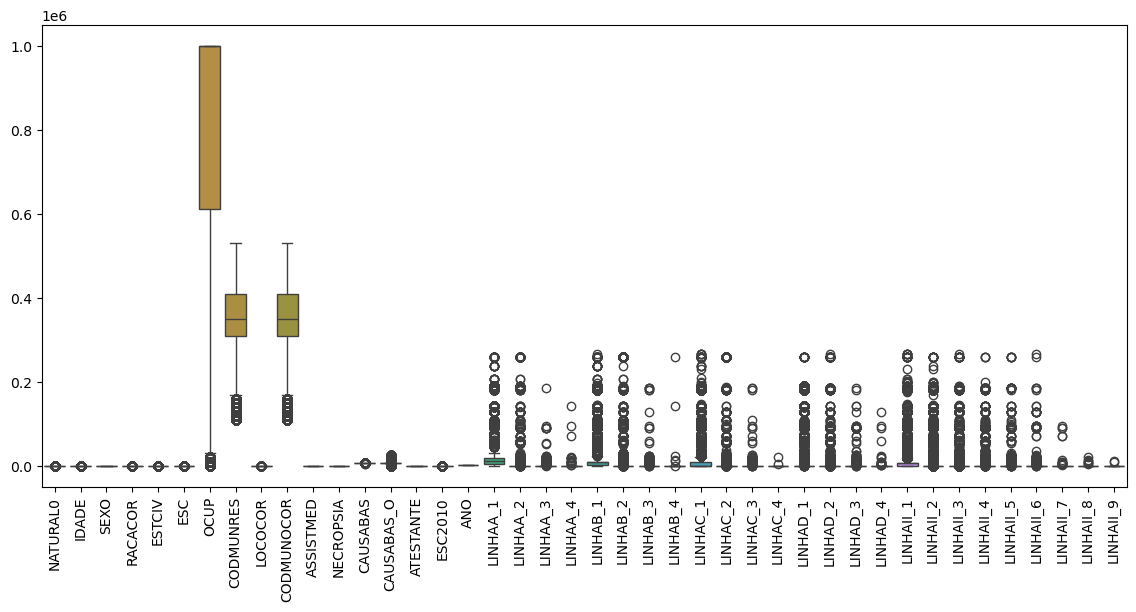

In [46]:
# Outliers

numeric_cols = df.select_dtypes(include=['number'])

plt.figure(figsize=(14, 6))
sns.boxplot(numeric_cols)
plt.xticks(rotation=90)
plt.show()

Como os registros são variados (diferentes idades, locais diferentes, ocupação diferente etc) os dados ficam mais dispersos ocasionando em outliers, mas é uma caracterísica do dado de saúde, e não um erro. Para futuras implementações, será necessário considerar essa característica dos dados e implementar algoritmos que sejam mais robustos a outliers

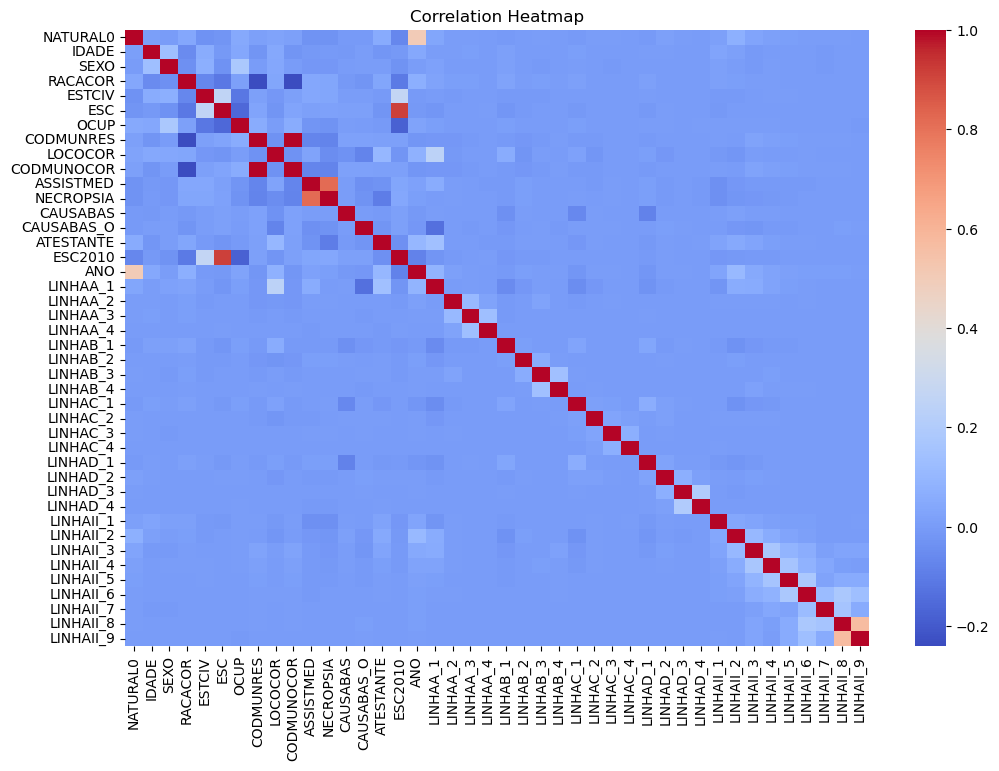

In [48]:
target_columns = df.drop(columns=['LINHAA', 'LINHAB', 'LINHAC', 'LINHAD', 'LINHAII'])
numeric_columns = target_columns.select_dtypes(include=['number']).columns

# Compute and plot the heatmap for numeric columns
plt.figure(figsize=(12,8))
sns.heatmap(df[numeric_columns].corr(), cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

Ao aplicar o heatmap de correlação, observou-se que as variáveis apresentam, em sua maioria, baixa correlação linear entre si (valores próximos de zero). Isso indica que não há relações lineares fortes entre as features, tornando necessário o uso de técnicas, que consigam capturar relações não lineares

# 4. Aplicando o MAPASOM

Os Mapas Auto-Organizáveis (Self-Organizing Maps – SOM) são um tipo de Rede Neural Artificial capaz de converter dados complexos e com correlações não lineares em uma representação de baixa dimensionalidade. Essa técnica permite visualizar e identificar padrões nos dados, mesmo quando relações lineares não são evidentes, como observado na matriz de correlação.

In [52]:
# Importando a biblioteca MiniSom 
from minisom import MiniSom

Selecionando as variáveis que iremos utilizar para aplicar no MAPASOM

In [54]:
df_training = df[
    [
        'LINHAA_1', 'LINHAA_2', 'LINHAA_3', 'LINHAA_4', 'LINHAB_1', 'LINHAB_2', 'LINHAB_3', 'LINHAB_4',
        'LINHAC_1', 'LINHAC_2', 'LINHAC_3', 'LINHAC_4', 'LINHAD_1', 'LINHAD_2', 'LINHAD_3', 'LINHAD_4',
        'LINHAII_1', 'LINHAII_2', 'LINHAII_3', 'LINHAII_4', 'LINHAII_5', 'LINHAII_6', 'LINHAII_7', 'LINHAII_8', 'LINHAII_9',
        'CAUSABAS', 'CAUSABAS_O'
    ]
]

In [55]:
df_training.head()

LINHAA_1  LINHAA_2  LINHAA_3  LINHAA_4  LINHAB_1  LINHAB_2  LINHAB_3  \
0      7300         0         0         0    185424         0         0   
1      7300         0         0         0         0         0         0   
2     10969         0         0         0     54624         0         0   
3      7300         0         0         0         0         0         0   
4      7300         0         0         0         0         0         0   

   LINHAB_4  LINHAC_1  LINHAC_2  ...  LINHAII_2  LINHAII_3  LINHAII_4  \
0         0         0         0  ...          0          0          0   
1         0         0         0  ...          0          0          0   
2         0      7300         0  ...          0          0          0   
3         0         0         0  ...          0          0          0   
4         0         0         0  ...          0          0          0   

   LINHAII_5  LINHAII_6  LINHAII_7  LINHAII_8  LINHAII_9  CAUSABAS  CAUSABAS_O  
0          0          0          0          0          0      7300        7300  
1          0          0          0          0          0      7300        7300  
2          0          0          0          0          0      7300        7300  
3          0          0          0          0          0      7300        7300  
4          0          0          0          0          0      7300        7300  

[5 rows x 27 columns]

In [56]:
df_training.shape

(211593, 27)

## Normalização dos dados com MinMaxScaler

As features ficam em um intervalo de [0,1], diminuindo a dimensionalidade dos dados

In [59]:
from sklearn.preprocessing import MinMaxScaler

In [60]:
df_normalized_min = MinMaxScaler().fit_transform(df_training)

In [61]:
df_normalized_min.shape

(211593, 27)

### MapaSom com Distância Manhattan

Segue a norma L1: soma das diferenças absolutas entre as coordenadas e mede a distância em caminhos retos (como ruas em um quarteirão).

In [64]:
# Configurando um SOM 4x4, com learning_rate de 0.5
som = MiniSom(x=4, y=4, input_len=df_normalized_min.shape[1], 
                        sigma=1.0, learning_rate=0.5, 
                        activation_distance='manhattan', 
                        random_seed=42)

# Inicialização aleatória - Pesos extraídos aleatoriamente
som.train_random(df_normalized_min, num_iteration=5000, verbose=True)

 [ 5000 / 5000 ] 100% - 0:00:00 left 
 quantization error: 0.11298498881217374


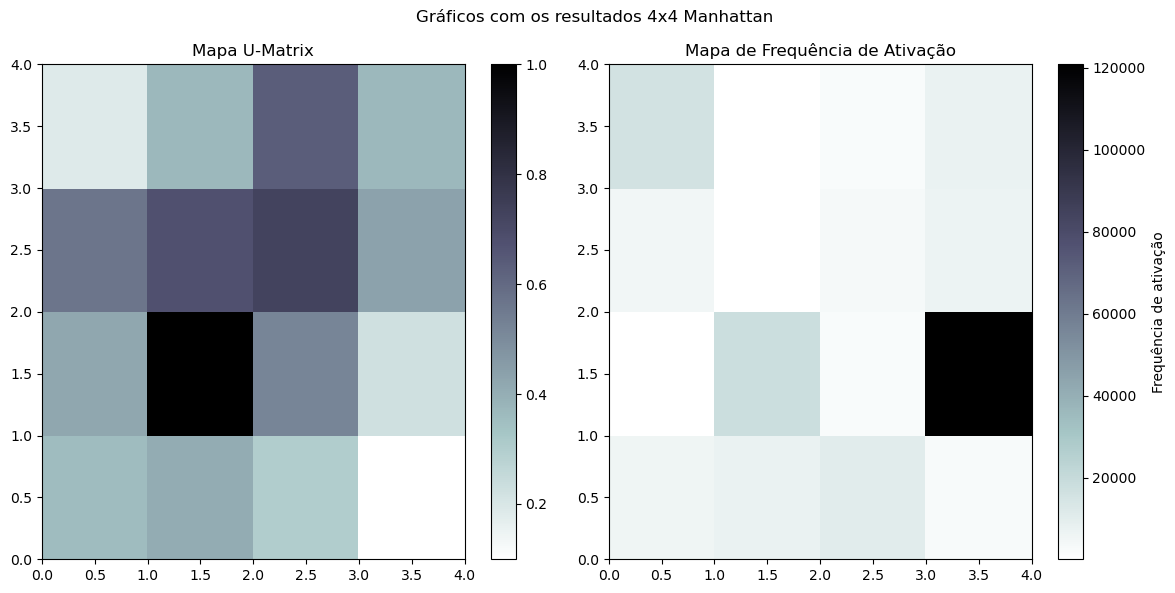

In [65]:
# Visualização dos Resultados

# dividindo a área para plotar 2 gráficos
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Mapa de distância (U-Matrix)
u_matrix = som.distance_map().T
grafico1 = axes[0].pcolor(u_matrix, cmap='bone_r')
fig.colorbar(grafico1, ax=axes[0])
axes[0].set_title("Mapa U-Matrix")

# Mapa de Frequência de Ativação
activation_map = np.zeros((4, 4))
for sample in df_normalized_min:
    winner = som.winner(sample)
    activation_map[winner] += 1

grafico2 = axes[1].pcolor(activation_map.T, cmap='bone_r')
fig.colorbar(grafico2, ax=axes[1], label='Frequência de ativação')
axes[1].set_title('Mapa de Frequência de Ativação')

plt.suptitle("Gráficos com os resultados 4x4 Manhattan")
plt.tight_layout()
plt.show()

Analisando os graficos acima, é possível notar que não houve agrupamento com esses parâmetros passados. Tentaremos com mais iterações

 [ 50000 / 50000 ] 100% - 0:00:00 left 
 quantization error: 0.10580878008195543


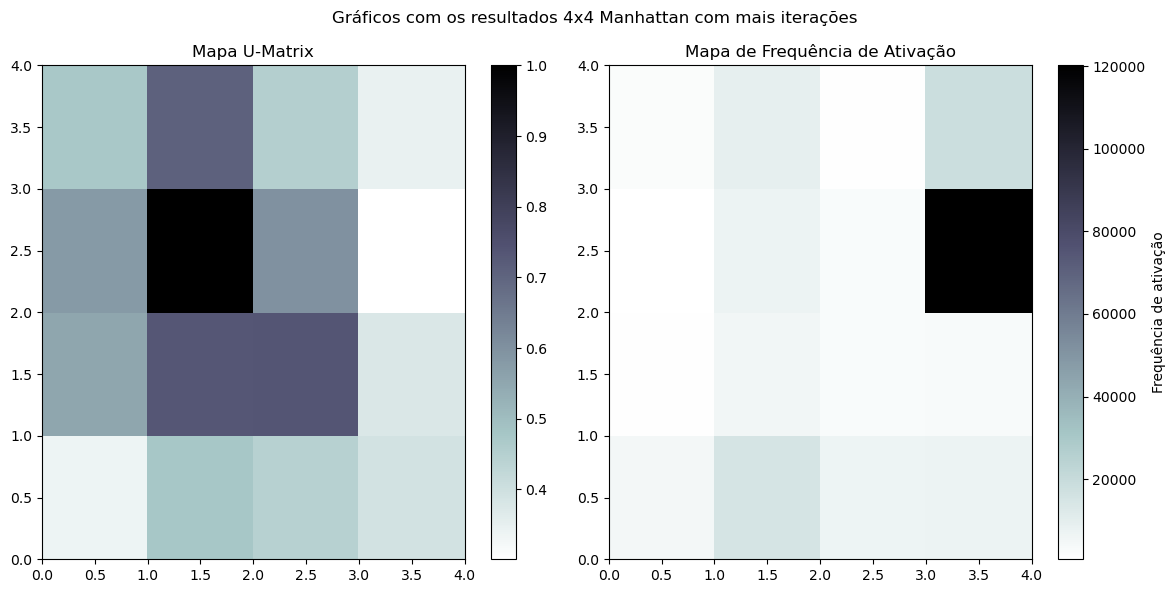

In [67]:
# Passando 50.000 iterações
som.train_random(df_normalized_min, num_iteration=50000, verbose=True)

# Visualização dos Resultados

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Mapa de distância (U-Matrix)
u_matrix = som.distance_map().T
grafico1 = axes[0].pcolor(u_matrix, cmap='bone_r')
fig.colorbar(grafico1, ax=axes[0])
axes[0].set_title("Mapa U-Matrix")

# Mapa de Frequência de Ativação
activation_map = np.zeros((4, 4))
for sample in df_normalized_min:
    winner = som.winner(sample)
    activation_map[winner] += 1

grafico2 = axes[1].pcolor(activation_map.T, cmap='bone_r')
fig.colorbar(grafico2, ax=axes[1], label='Frequência de ativação')
axes[1].set_title('Mapa de Frequência de Ativação')

plt.suptitle("Gráficos com os resultados 4x4 Manhattan com mais iterações")
plt.tight_layout()
plt.show()

Com mais iterações, o QE diminuiu e um possível cluster foi formado, porém é isolado, não é possível afirmar que houve clusterização

Análise:

A princípio, com a distancia Manhattan, é possível notar que houverem possível cluster, porém com baixa concentração dos dados

#### Testando com outras grades

SOM 2x2 - Erro de quantização: 0.1894616713809749


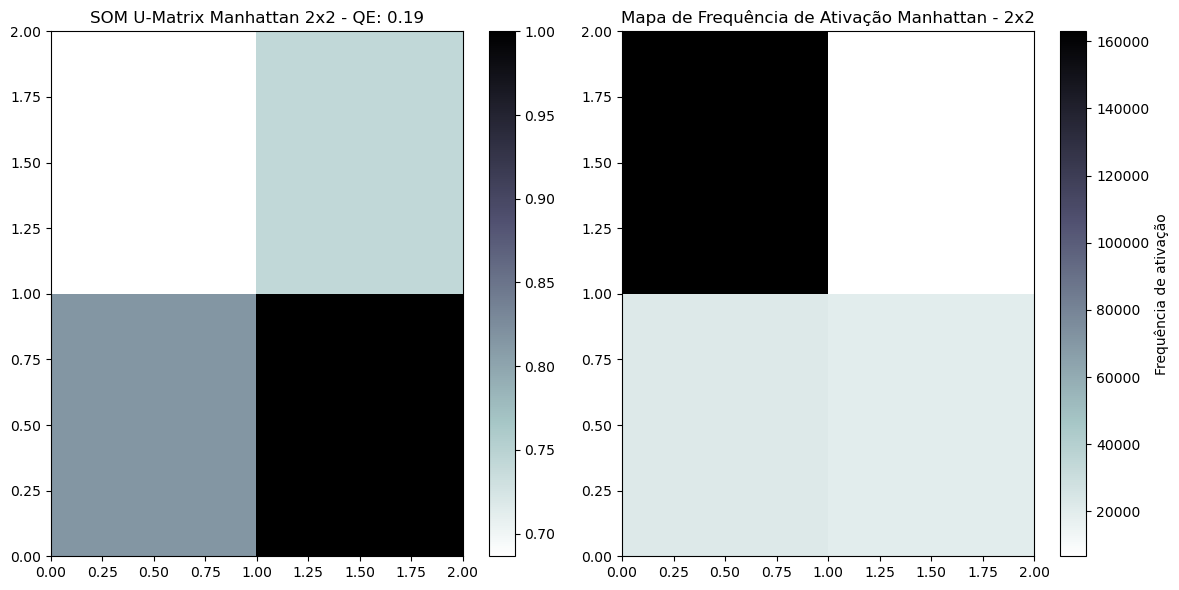

SOM 3x3 - Erro de quantização: 0.12892997875254578


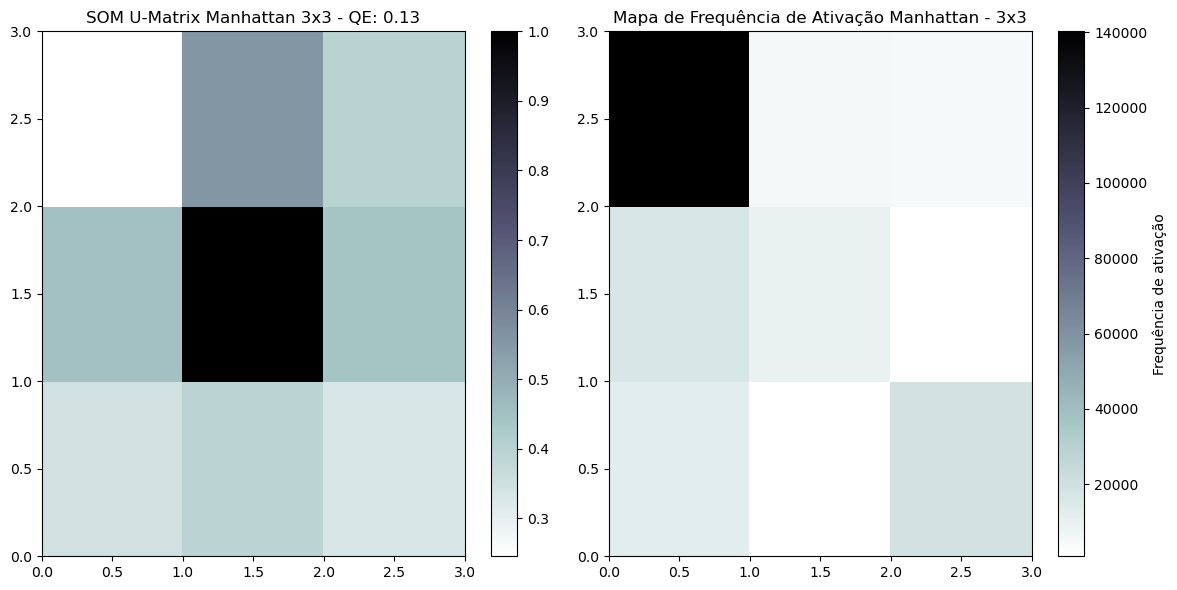

SOM 4x4 - Erro de quantização: 0.11298498881217374


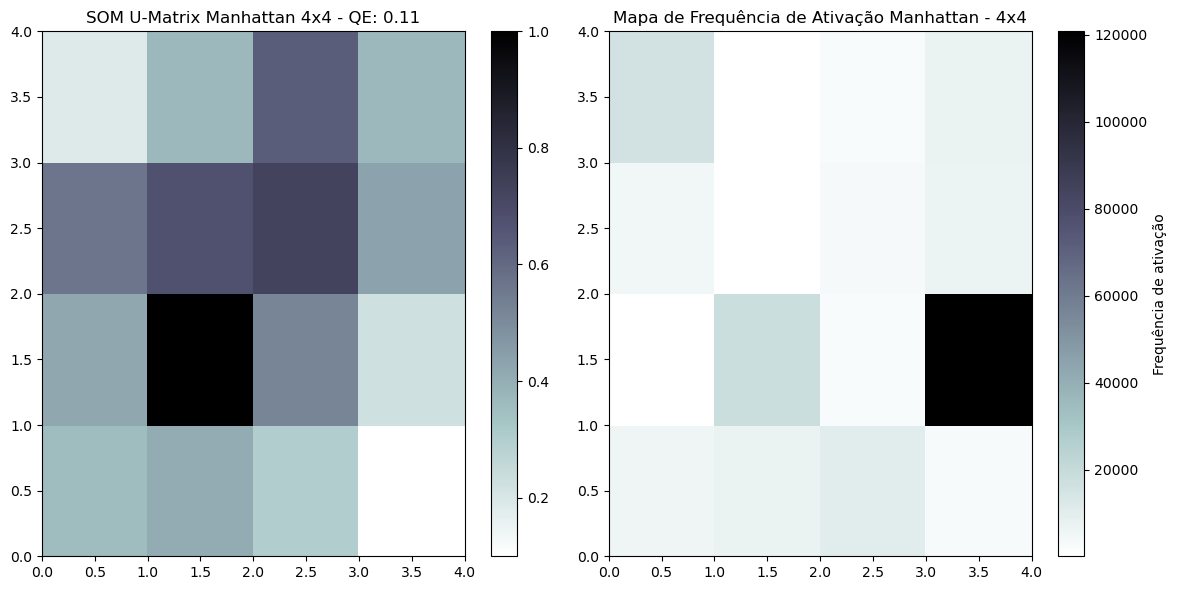

SOM 5x5 - Erro de quantização: 0.10208632118629914


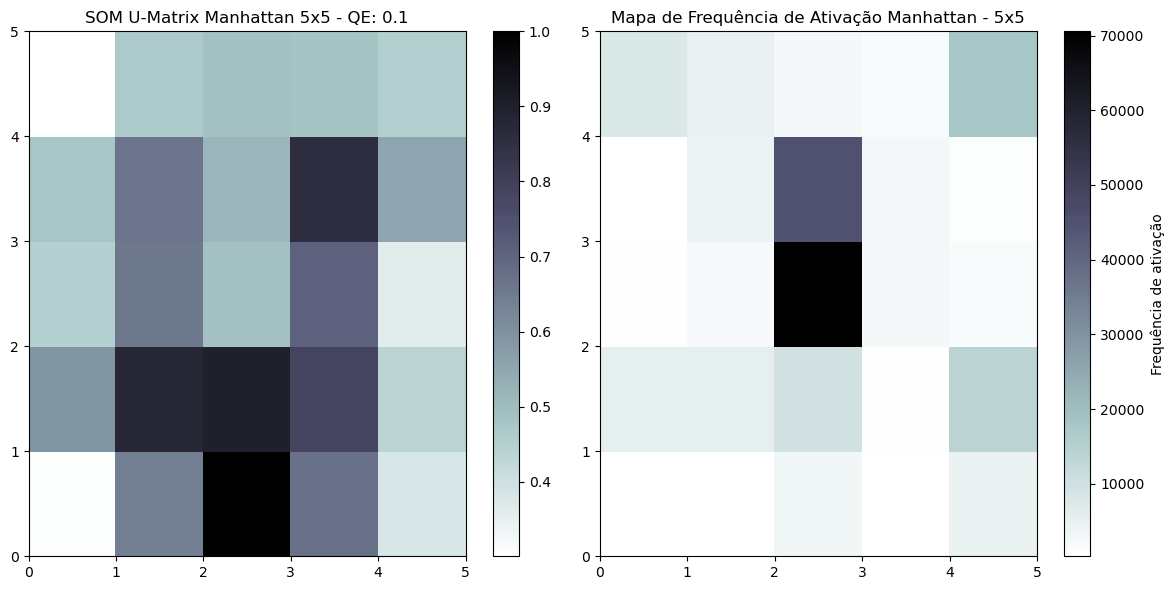

SOM 6x6 - Erro de quantização: 0.09272244766276623


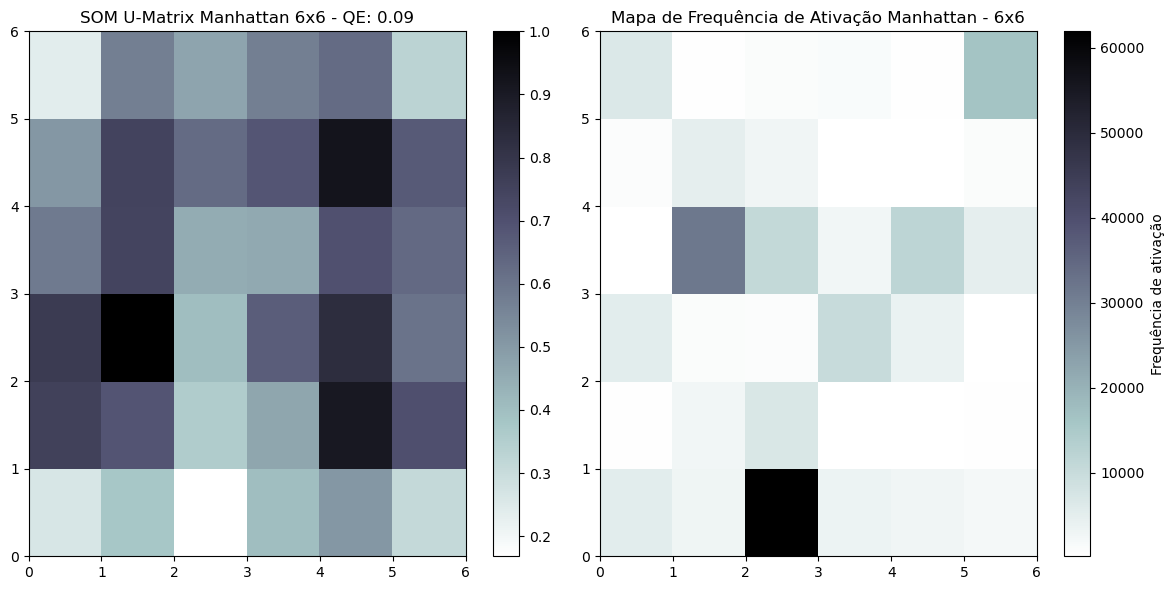

SOM 7x7 - Erro de quantização: 0.08689010070182861


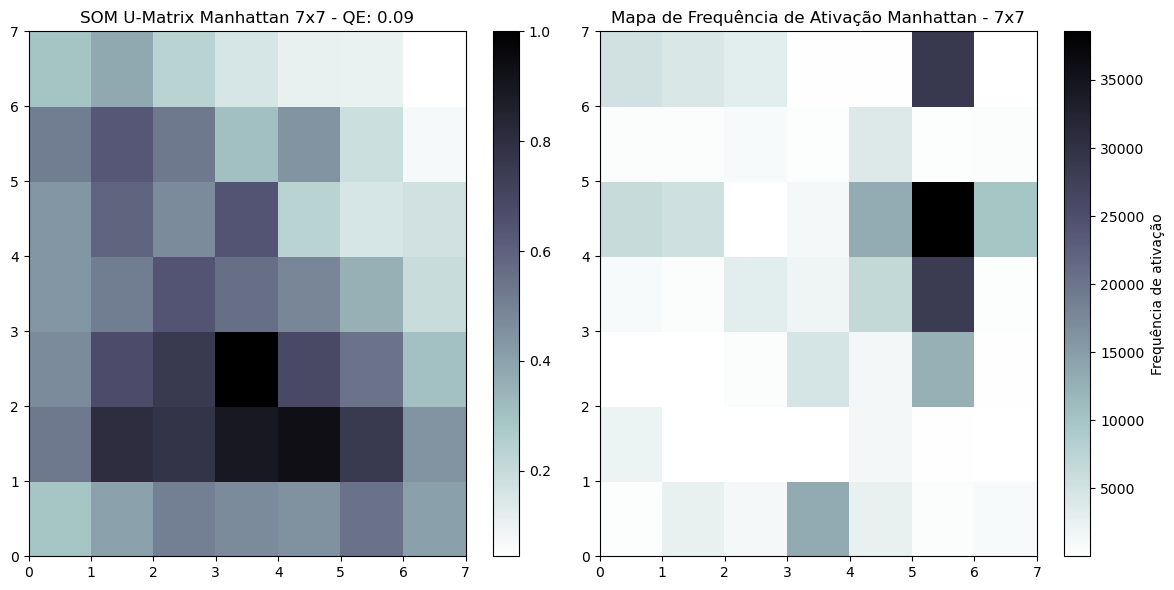

SOM 8x8 - Erro de quantização: 0.08309491744219993


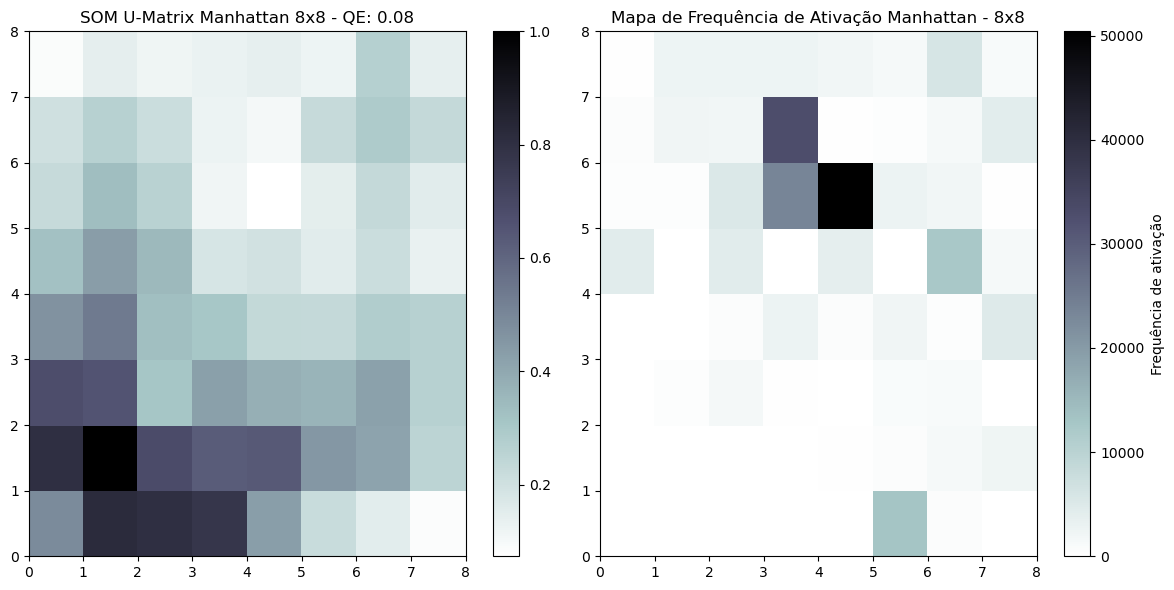

SOM 9x9 - Erro de quantização: 0.07756841259778109


SOM 10x10 - Erro de quantização: 0.07821288459928771


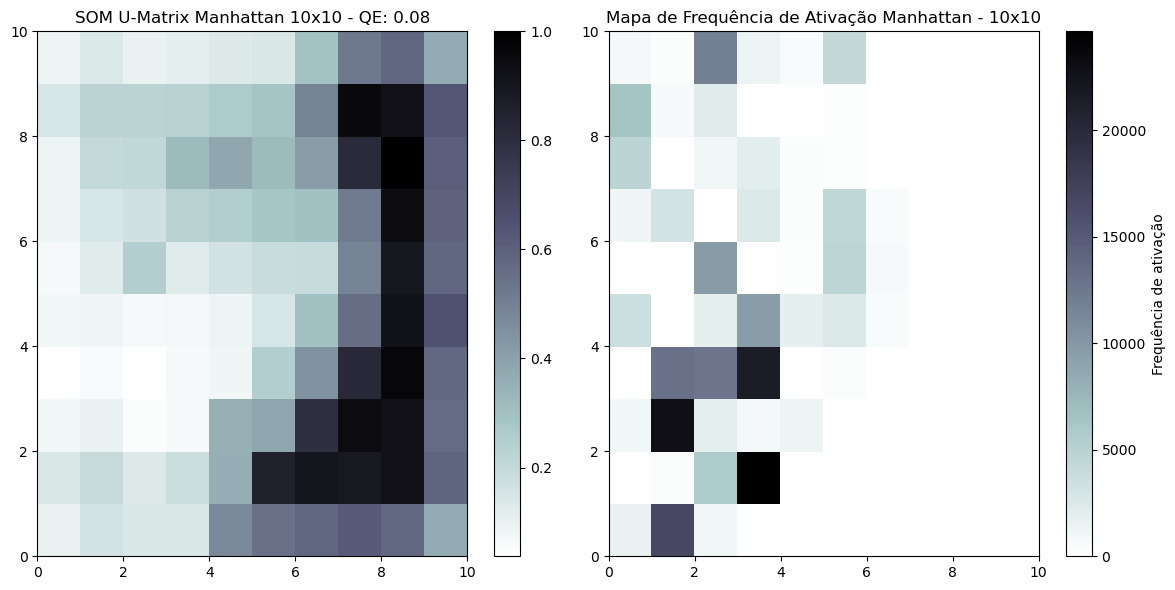

SOM 11x11 - Erro de quantização: 0.07140255806512903


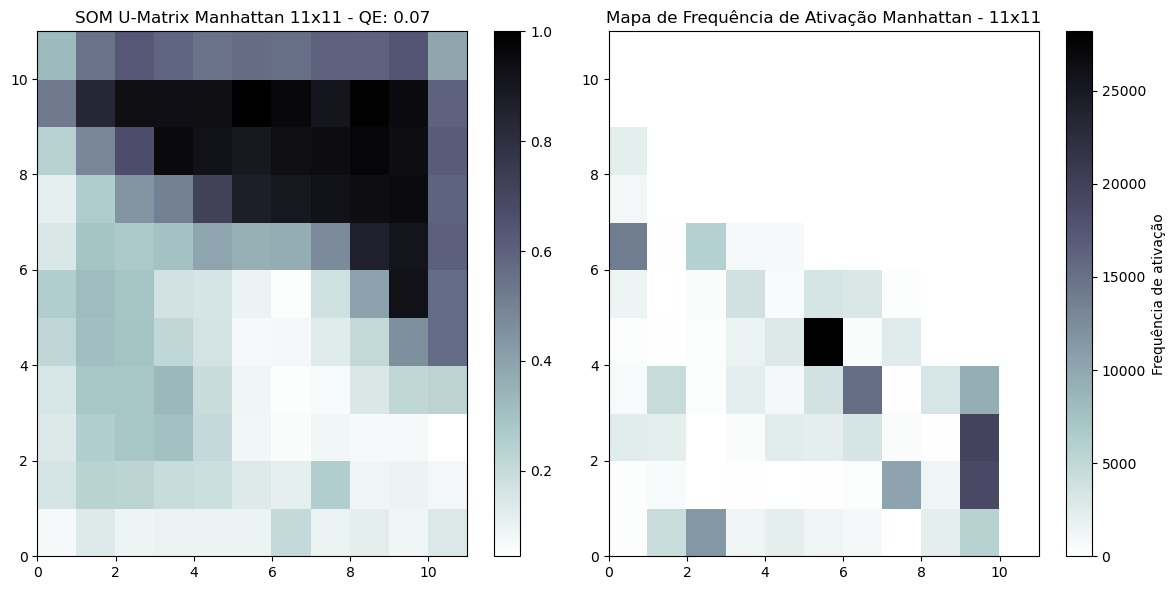

SOM 12x12 - Erro de quantização: 0.0797212209868293


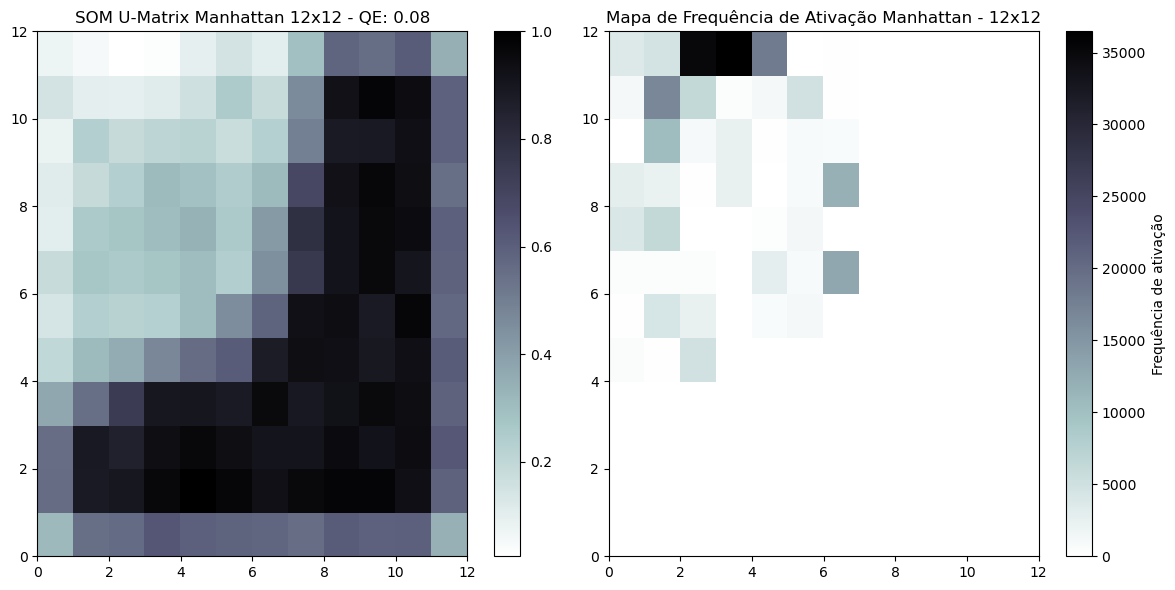

SOM 13x13 - Erro de quantização: 0.08166465580526641


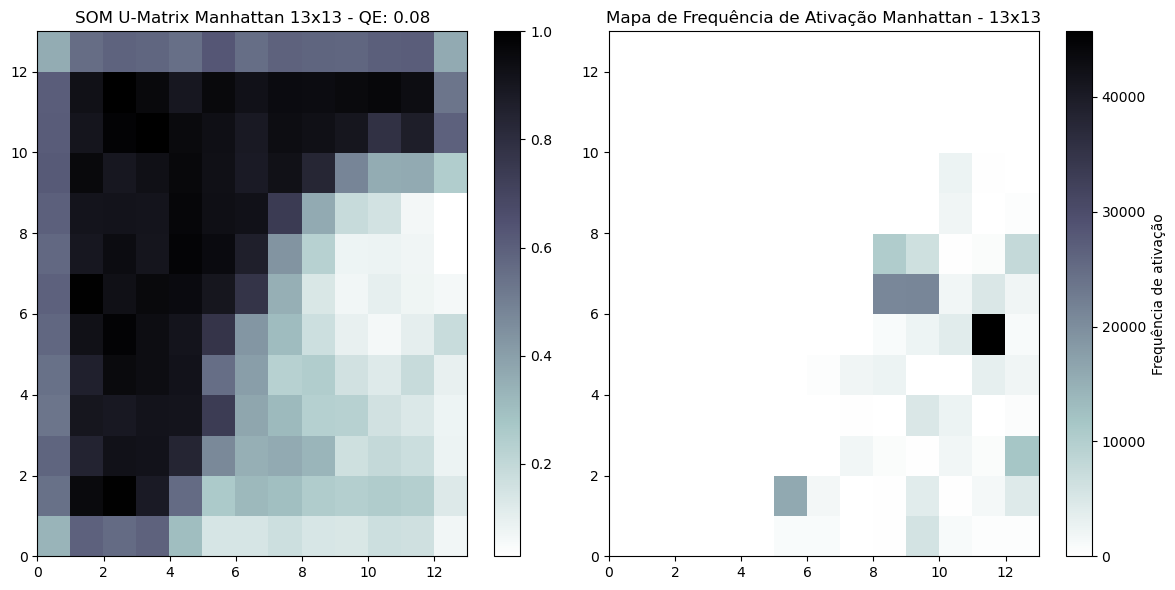

SOM 14x14 - Erro de quantização: 0.07318720346479851


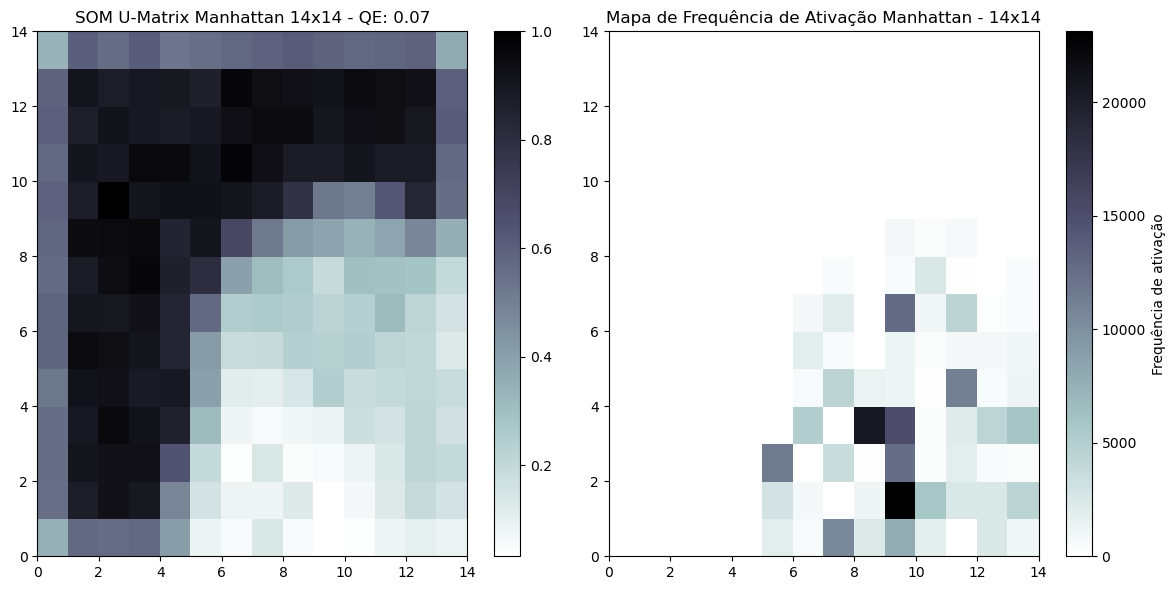

In [71]:
erro = []
sizes = []

# Testar de grades de 2x2 a 14x14
for i in range(2, 15):
    som = MiniSom(i, i, input_len=df_normalized_min.shape[1], 
                        sigma=1.0, learning_rate=0.5, 
                        activation_distance='manhattan', 
                        random_seed=42)
    
    som.train_random(df_normalized_min, 5000)
    
    qe = som.quantization_error(df_normalized_min)
    erro.append(qe)
    sizes.append(i)
    print(f"SOM {i}x{i} - Erro de quantização: {qe}")

    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    # Mapa de distância (U-Matrix)
    u_matrix = som.distance_map().T
    grafico1 = axes[0].pcolor(u_matrix, cmap='bone_r')
    fig.colorbar(grafico1, ax=axes[0])
    axes[0].set_title(f"SOM U-Matrix Manhattan {i}x{i} - QE: {round(qe, 2)}")

    # Mapa de Frequência de Ativação
    activation_map = np.zeros((i, i))
    for sample in df_normalized_min:
        winner = som.winner(sample)
        activation_map[winner] += 1

    grafico2 = axes[1].pcolor(activation_map.T, cmap='bone_r')
    fig.colorbar(grafico2, ax=axes[1], label='Frequência de ativação')
    axes[1].set_title(f'Mapa de Frequência de Ativação Manhattan - {i}x{i}')

    plt.tight_layout()
    plt.show()

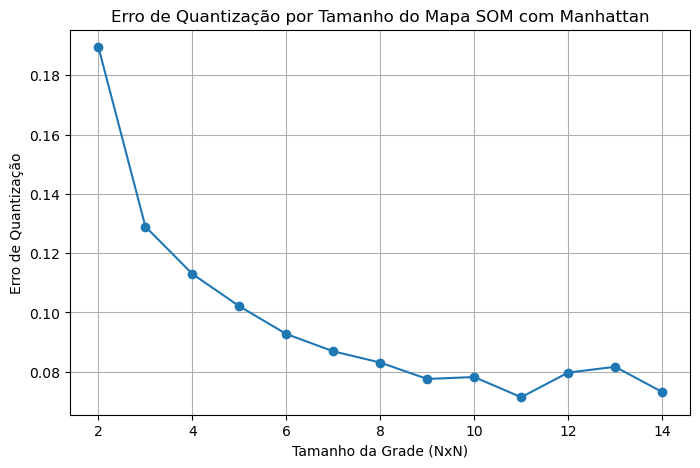

In [72]:
# Checando o erro de quantização

plt.figure(figsize=(8, 5))
plt.plot(sizes, erro, marker='o')
plt.title("Erro de Quantização por Tamanho do Mapa SOM com Manhattan")
plt.xlabel("Tamanho da Grade (NxN)")
plt.ylabel("Erro de Quantização")
plt.grid(True)
plt.show()

O desempenho com a distância Manhattan não foi tão boa, veremos com Cosseno

### MapaSom com Distância Cosseno

Mede a diferença angular entre dois vetores, avaliando o quão parecidos são em direção, ignorando o tamanho.

In [76]:
# Inicialização do SOM com Cosseno em uma grade 4x4
som_cos = MiniSom(x=4, y=4, 
                  input_len=df_normalized_min.shape[1], 
                  sigma=1.0, learning_rate=0.5,
                  activation_distance='cosine', 
                  random_seed=42)

som_cos.train_random(df_normalized_min, num_iteration=5000, verbose=True)

 [ 5000 / 5000 ] 100% - 0:00:00 left 
 quantization error: 0.11135992593086202


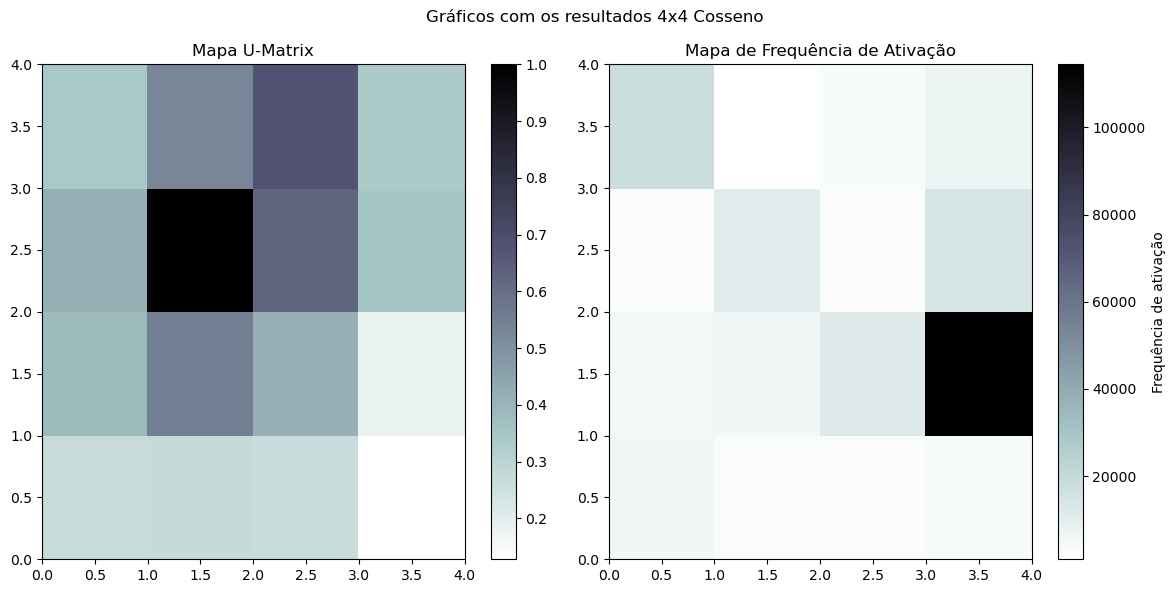

In [77]:
# Visualização dos Resultados

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Mapa de distância (U-Matrix)
u_matrix = som_cos.distance_map().T
grafico1 = axes[0].pcolor(u_matrix, cmap='bone_r')
fig.colorbar(grafico1, ax=axes[0])
axes[0].set_title("Mapa U-Matrix")

# Mapa de Frequência de Ativação
activation_map = np.zeros((4, 4))
for sample in df_normalized_min:
    winner = som_cos.winner(sample)
    activation_map[winner] += 1

grafico2 = axes[1].pcolor(activation_map.T, cmap='bone_r')
fig.colorbar(grafico2, ax=axes[1], label='Frequência de ativação')
axes[1].set_title('Mapa de Frequência de Ativação')

plt.suptitle("Gráficos com os resultados 4x4 Cosseno")
plt.tight_layout()
plt.show()

#### Testando com outras grades

som_cos 2x2 - Erro de quantização: 0.1875832800730815


som_cos 3x3 - Erro de quantização: 0.12813858395925626


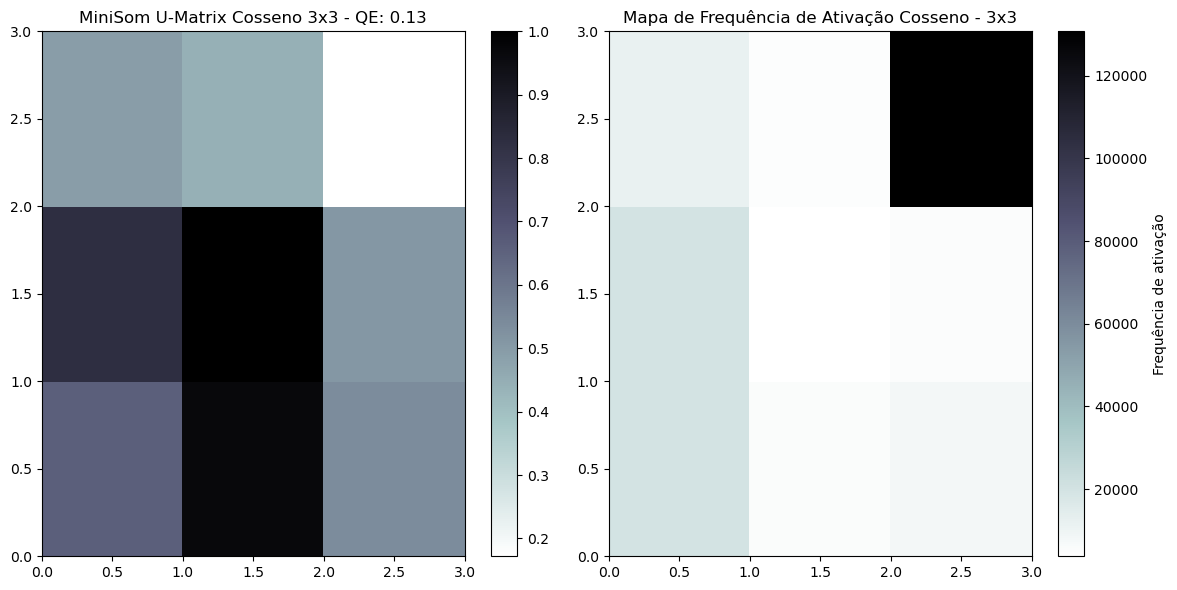

som_cos 4x4 - Erro de quantização: 0.11135992593086202


som_cos 5x5 - Erro de quantização: 0.09457851999532482


som_cos 6x6 - Erro de quantização: 0.08658706895706642


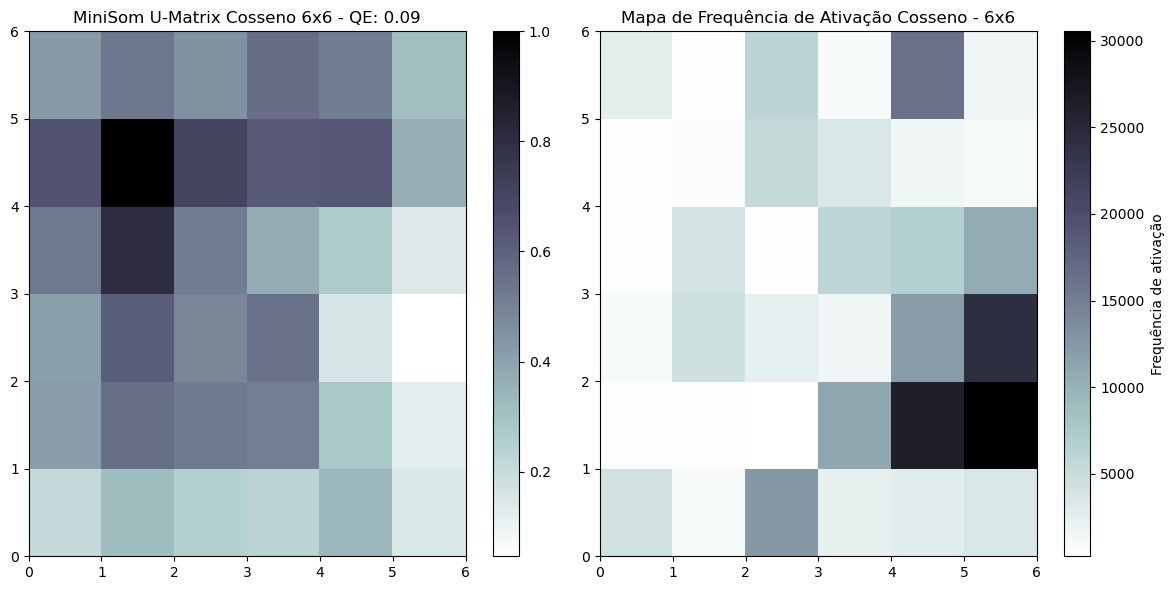

som_cos 7x7 - Erro de quantização: 0.0766107458695881


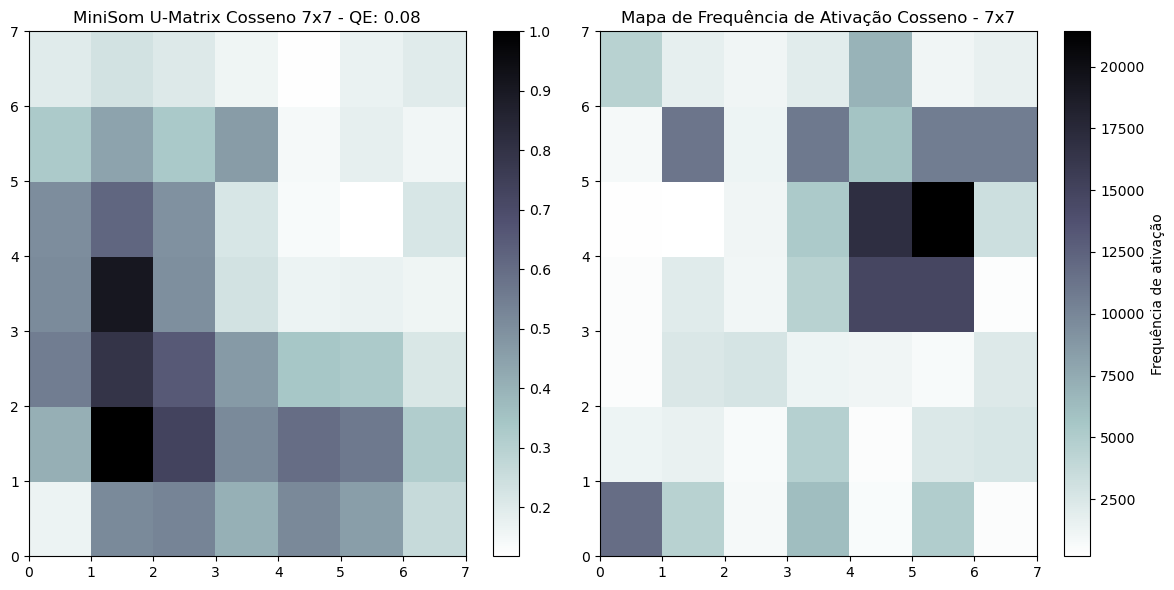

som_cos 8x8 - Erro de quantização: 0.06926179496278172


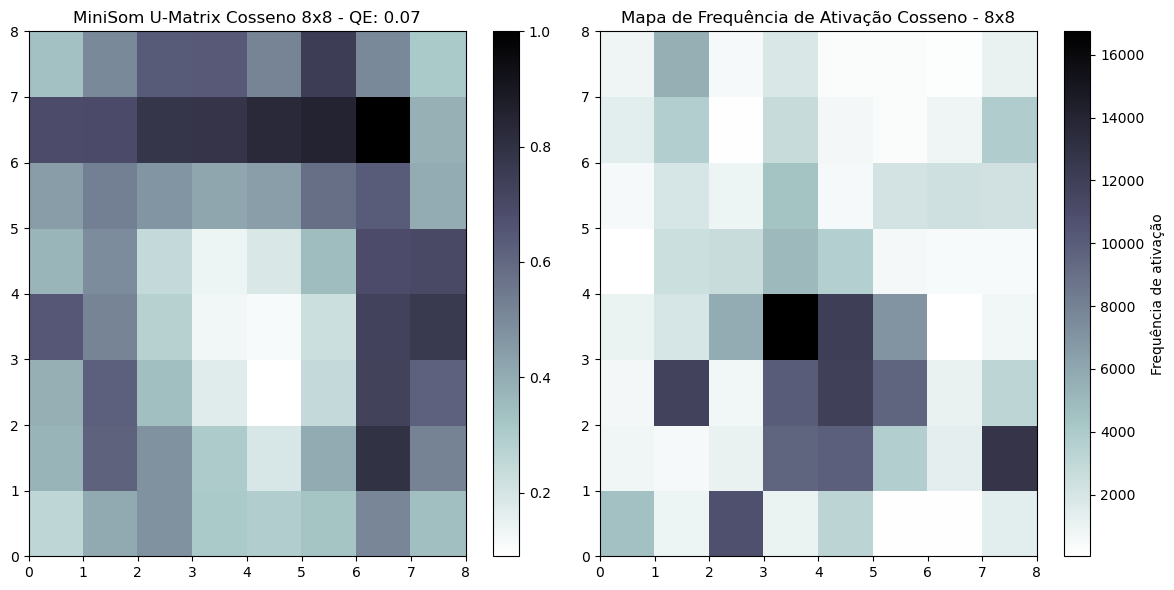

som_cos 9x9 - Erro de quantização: 0.06927769140127597


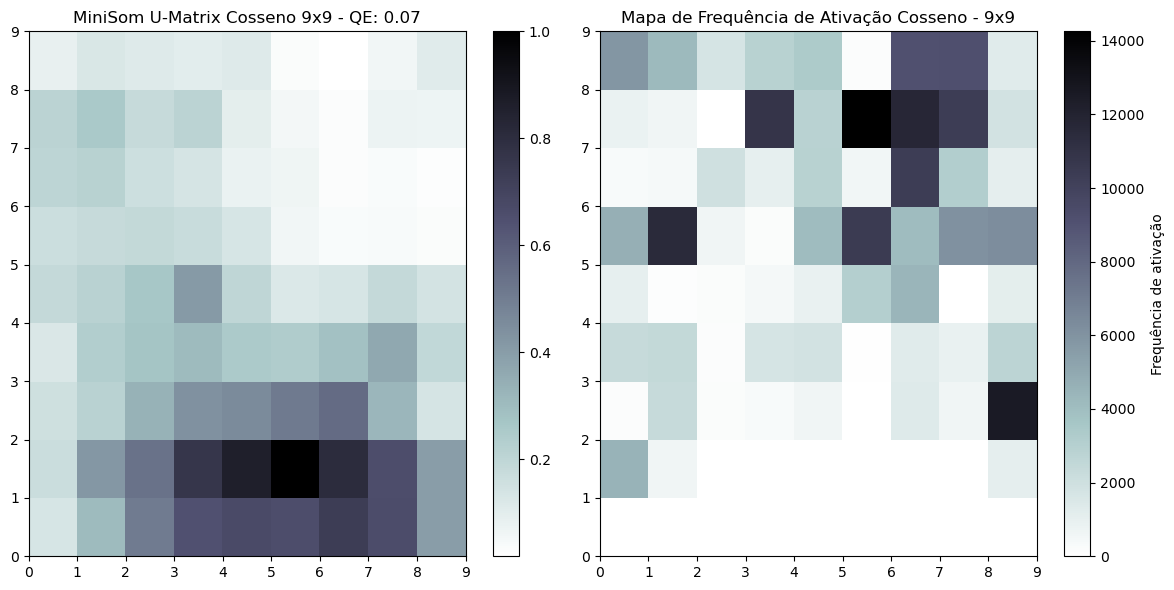

som_cos 10x10 - Erro de quantização: 0.06501891185063084


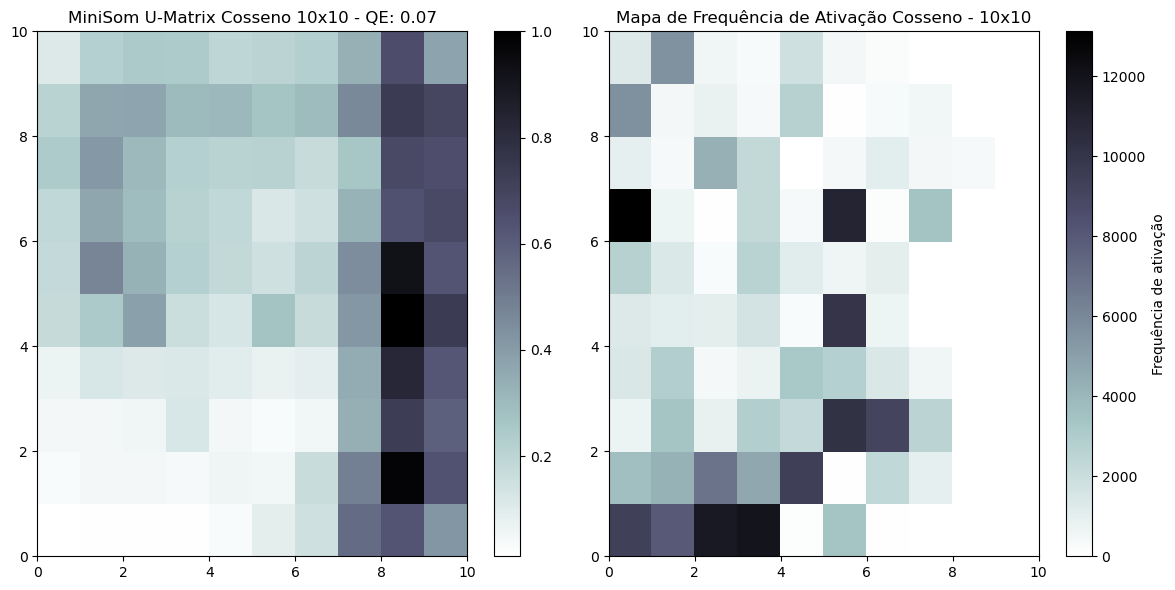

som_cos 11x11 - Erro de quantização: 0.060837192199258296


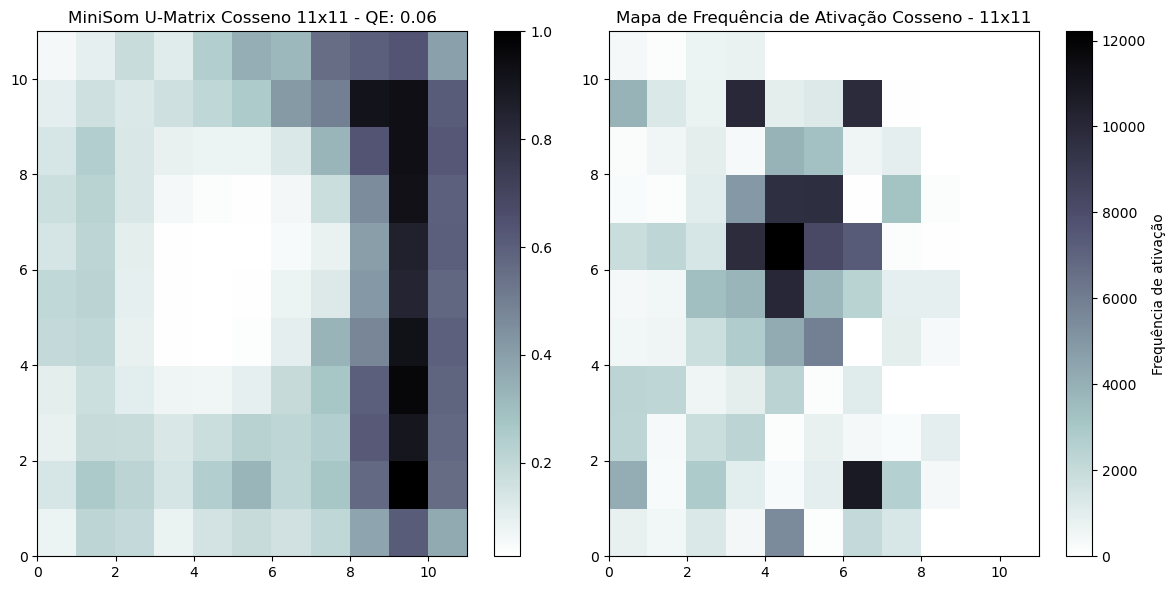

som_cos 12x12 - Erro de quantização: 0.06222934924616039


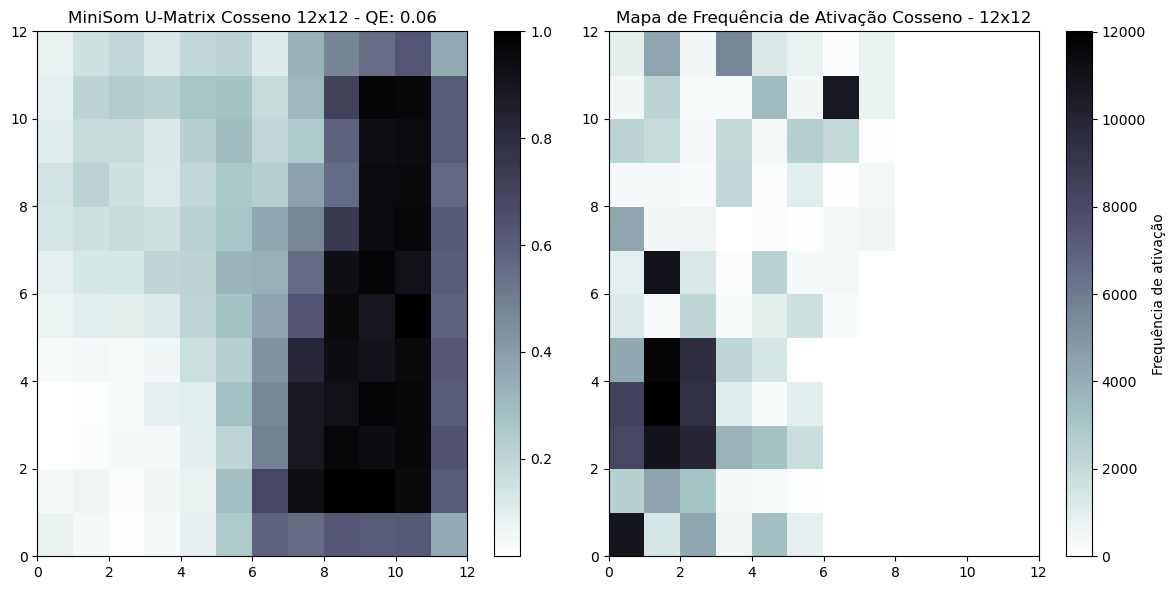

som_cos 13x13 - Erro de quantização: 0.05900838934560471


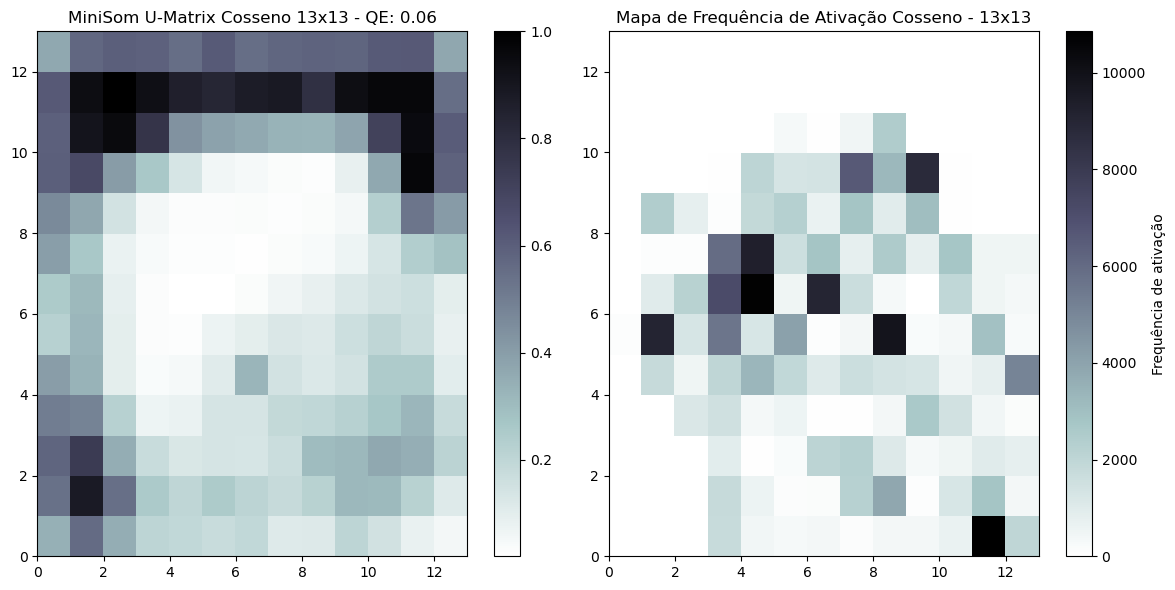

som_cos 14x14 - Erro de quantização: 0.06493505384725028


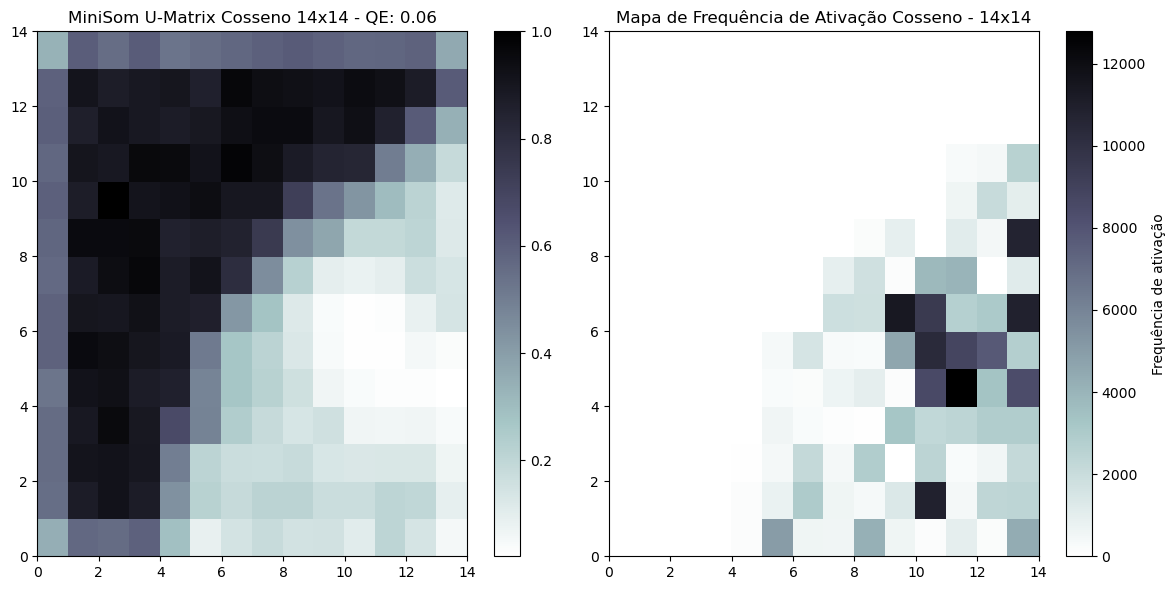

In [79]:
erro = []
sizes = []

for i in range(2, 15):
    som_cos = MiniSom(i, i, 
                      input_len=df_normalized_min.shape[1], 
                      sigma=1.0, learning_rate=0.5, 
                      activation_distance='cosine', 
                      random_seed=42)
    
    som_cos.train_random(df_normalized_min, 5000)
    
    qe = som_cos.quantization_error(df_normalized_min)
    erro.append(qe)
    sizes.append(i)
    print(f"som_cos {i}x{i} - Erro de quantização: {qe}")

    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    # Mapa de distância (U-Matrix)
    u_matrix = som_cos.distance_map().T
    grafico1 = axes[0].pcolor(u_matrix, cmap='bone_r')
    fig.colorbar(grafico1, ax=axes[0])
    axes[0].set_title(f"MiniSom U-Matrix Cosseno {i}x{i} - QE: {round(qe, 2)}")

    # Mapa de Frequência de Ativação
    activation_map = np.zeros((i, i))
    for sample in df_normalized_min:
        winner = som_cos.winner(sample)
        activation_map[winner] += 1

    grafico2 = axes[1].pcolor(activation_map.T, cmap='bone_r')
    fig.colorbar(grafico2, ax=axes[1], label='Frequência de ativação')
    axes[1].set_title(f'Mapa de Frequência de Ativação Cosseno - {i}x{i}')

    plt.tight_layout()
    plt.show()

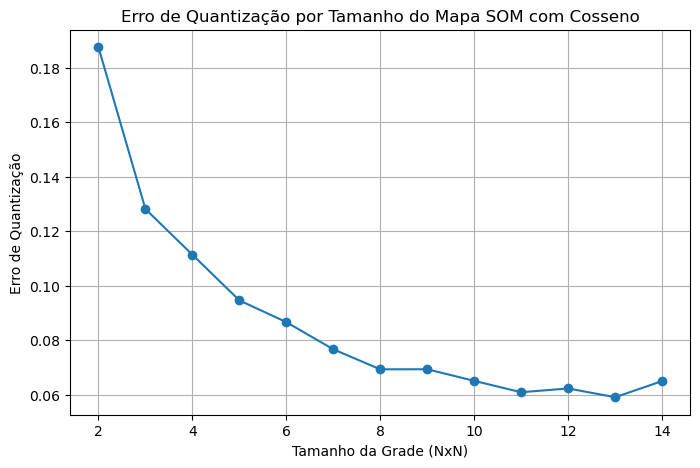

In [80]:
# Checando o erro de quantização

plt.figure(figsize=(8, 5))
plt.plot(sizes, erro, marker='o')
plt.title("Erro de Quantização por Tamanho do Mapa SOM com Cosseno")
plt.xlabel("Tamanho da Grade (NxN)")
plt.ylabel("Erro de Quantização")
plt.grid(True)
plt.show()

### MapaSom Cosseno com 6x6, learning rate com 0.5:

In [82]:
som_cos = MiniSom(x=6, y=6, 
                  input_len=df_normalized_min.shape[1], 
                  sigma=1.0, 
                  learning_rate=0.5, 
                  activation_distance='cosine', 
                  random_seed=42)

som_cos.train_random(df_normalized_min, 5000)

In [83]:
# Visualização dos Resultados

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Mapa de distância (U-Matrix)
u_matrix = som_cos.distance_map().T
grafico1 = axes[0].pcolor(u_matrix, cmap='bone_r')
fig.colorbar(grafico1, ax=axes[0])
axes[0].set_title("Mapa U-Matrix")

# Mapa de Frequência de Ativação
activation_map = np.zeros((6, 6))
for sample in df_normalized_min:
    winner = som_cos.winner(sample)
    activation_map[winner] += 1

grafico2 = axes[1].pcolor(activation_map.T, cmap='bone_r')
fig.colorbar(grafico2, ax=axes[1], label='Frequência de ativação')
axes[1].set_title('Mapa de Frequência de Ativação')

plt.suptitle("Gráficos com os resultados 6x6 Cosseno")
plt.tight_layout()
plt.show()

### Sobreposição com PieCharts
A sobreposição de pie charts ao Mapa SOM permite visualizar a distribuição dos CIDs dentro de cada cluster, facilitando a identificação de padrões e aglomerações


In [85]:
# Definindo cores para as features ficarem distintas entre si
colors = ['red', 'blue', 'green', 'yellow', 'orange', 'purple', 'cyan', 'magenta', 'brown',
    'lime', 'pink', 'teal', 'gold', 'black', 'gray', 'navy', 'olive', 'coral',
    'orchid', 'salmon', 'aqua', 'maroon', 'deepskyblue', 'darkviolet', 'chocolate',
    'chartreuse', 'mediumslateblue']

# Criando as legendas das colunas
labels = [f'{col}' for col in df_training.columns]

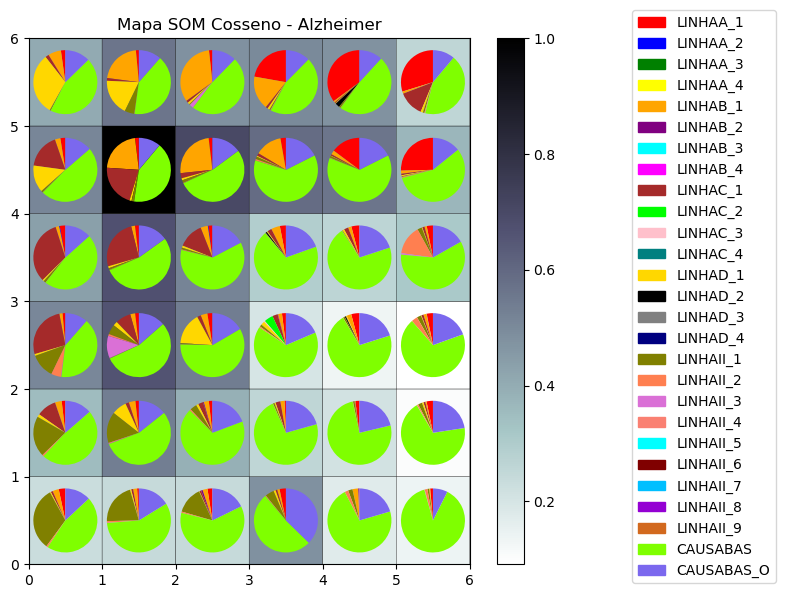

In [86]:
# biblioteca para fazer a legenda
from matplotlib.patches import Patch

# Função para criar "eixos" (subplots) pequenos dentro de um eixo maior,
# útil para sobrepor gráficos pequenos
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# 6x6
som_cos_size = (6,6)

som_cos.train_random(df_normalized_min, 5000)
weights = som_cos.get_weights()

# Criando a figura
fig, ax = plt.subplots(figsize=(6, 6))

# U-Matrix
u_matrix = som_cos.distance_map().T
plt.pcolor(u_matrix, cmap='bone_r', edgecolors='k')  
plt.colorbar()
plt.title("Mapa SOM Cosseno - Alzheimer")
plt.tight_layout()

# Gráficos de Pizza posicionados corretamente
for i in range(som_cos_size[0]):
    for j in range(som_cos_size[1]):
        neuron_weights = weights[i, j] # obtem a posição dos pesos
        
        neuron_weights = np.clip(neuron_weights, 0, None) # remove 0
        
        if neuron_weights.sum() == 0:
            continue
            
        neuron_weights = neuron_weights / neuron_weights.sum() # Normaliza os pesos

        # print(f"Neurônio ({i}, {j}) → Pesos normalizados: {neuron_weights}")
        
        # largura e altura 
        pie_ax = inset_axes(ax,  # eixo principal onde está o mapa SOM
                            width=0.8, height=0.8,  # fixo
                            loc='center',
                            bbox_to_anchor=(i + 0.5, j + 0.5), # centraliza no neurônio (i,j)
                            # Converte as coordenadas (i + 0.5, j + 0.5) para o sistema de coordenadas do gráfico
                            bbox_transform=ax.transData, # garante que a posição da pizza esteja correta em relação ao mapa SOM plotado
                            borderpad=0)
        pie_ax.pie(neuron_weights, colors=colors, startangle=90)

        # Remove os eixos do gráfico de pizza (limpa visual)
        pie_ax.set_xticks([])
        pie_ax.set_yticks([])
        
# Legenda
patches = [Patch(color=colors[i], label=labels[i]) for i in range(len(labels))]
fig.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

### MapaSom com 7x7, learning rate com 0.5:

In [88]:
som_cos = MiniSom(x=7, y=7, 
                  input_len=df_normalized_min.shape[1], 
                  sigma=1.0, learning_rate=0.5, 
                  activation_distance='cosine', 
                  random_seed=42)

som_cos.train_random(df_normalized_min, num_iteration=5000, verbose=True)

 [ 5000 / 5000 ] 100% - 0:00:00 left 
 quantization error: 0.0766107458695881


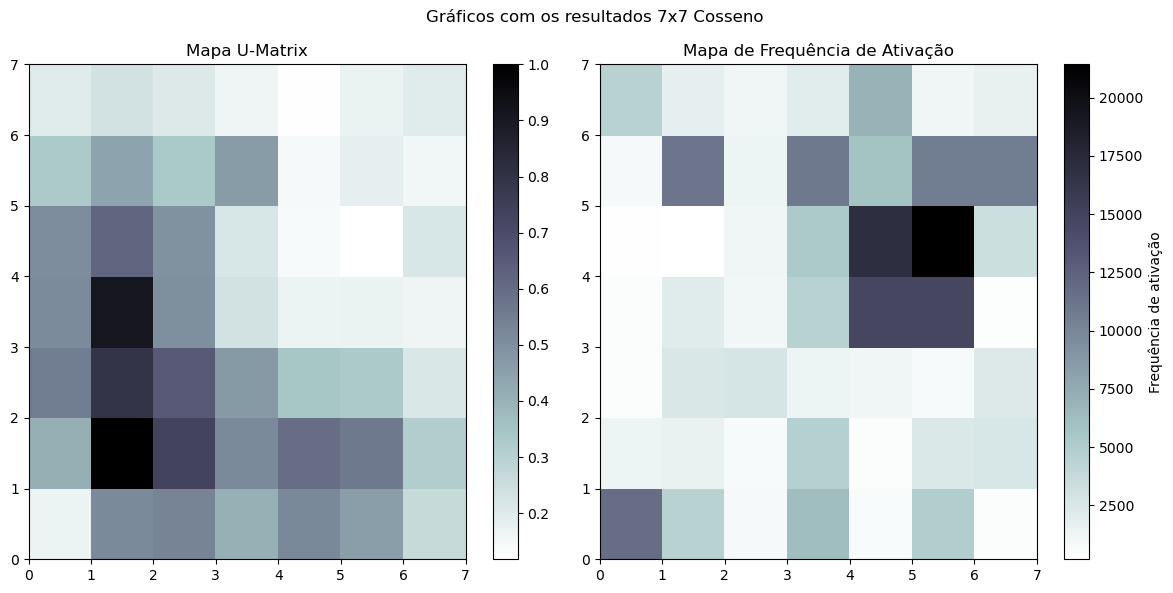

In [89]:
# Visualização dos Resultados

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Mapa de distância (U-Matrix)
u_matrix = som_cos.distance_map().T
grafico1 = axes[0].pcolor(u_matrix, cmap='bone_r')
fig.colorbar(grafico1, ax=axes[0])
axes[0].set_title("Mapa U-Matrix")

# Mapa de Frequência de Ativação
activation_map = np.zeros((7, 7))
for sample in df_normalized_min:
    winner = som_cos.winner(sample)
    activation_map[winner] += 1

grafico2 = axes[1].pcolor(activation_map.T, cmap='bone_r')
fig.colorbar(grafico2, ax=axes[1], label='Frequência de ativação')
axes[1].set_title('Mapa de Frequência de Ativação')

plt.suptitle("Gráficos com os resultados 7x7 Cosseno")
plt.tight_layout()
plt.show()

In [90]:
som_cos_size = (7,7)

weights = som_cos.get_weights()

# Create figure
fig, ax = plt.subplots(figsize=(6, 6))

# Criando a figura
u_matrix = som_cos.distance_map().T
plt.pcolor(u_matrix, cmap='bone_r', edgecolors='k')  
plt.colorbar()
plt.title("Mapa SOM Cosseno - Alzheimer")
plt.tight_layout()

# Gráficos de Pizza posicionados corretamente
for i in range(som_cos_size[0]):
    for j in range(som_cos_size[1]):
        neuron_weights = weights[i, j] # obtem a posição dos pesos
        
        neuron_weights = np.clip(neuron_weights, 0, None) # remove 0
        
        if neuron_weights.sum() == 0:
            continue
            
        neuron_weights = neuron_weights / neuron_weights.sum() # Normaliza os pesos

        # print(f"Neurônio ({i}, {j}) → Pesos normalizados: {neuron_weights}")
        
        # largura e altura 
        pie_ax = inset_axes(ax,  # eixo principal onde está o mapa SOM
                            width=0.8, height=0.8,  # fixo
                            loc='center',
                            bbox_to_anchor=(i + 0.5, j + 0.5), # centraliza no neurônio (i,j)
                            # Converte as coordenadas (i + 0.5, j + 0.5) para o sistema de coordenadas do gráfico
                            bbox_transform=ax.transData, # garante que a posição da pizza esteja correta em relação ao mapa SOM plotado
                            borderpad=0)
        pie_ax.pie(neuron_weights, colors=colors, startangle=90)

        # Remove os eixos do gráfico de pizza (limpa visual)
        pie_ax.set_xticks([])
        pie_ax.set_yticks([])

# Legenda
patches = [Patch(color=colors[i], label=labels[i]) for i in range(len(labels))]
fig.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

Comparando as distâncias Manhattan e Cosseno, o QE da distância Cosseno está menor, indicando que o desempenho com essa distância pode ser mais satisfatória para o estudo

## Testando com outros hiperparâmetros 

Os parâmetros controlam o comportamento do algoritmo de aprendizado e têm um impacto significativo no desempenho do modelo final. Ajustá-los é primordial para obter um bom desempenho

### Aumentando o número de iteração para 50000

MiniSom 2x2 - Erro de quantização: 0.16987062626209248


MiniSom 3x3 - Erro de quantização: 0.12378084228945445


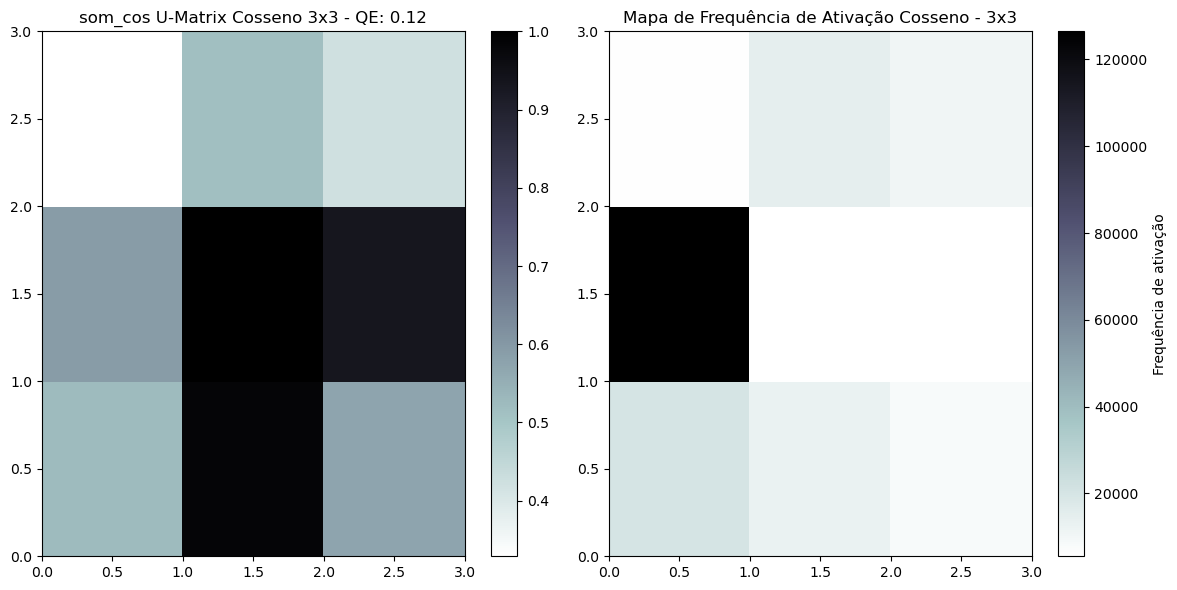

MiniSom 4x4 - Erro de quantização: 0.10202823977252198


MiniSom 5x5 - Erro de quantização: 0.08985565368685941


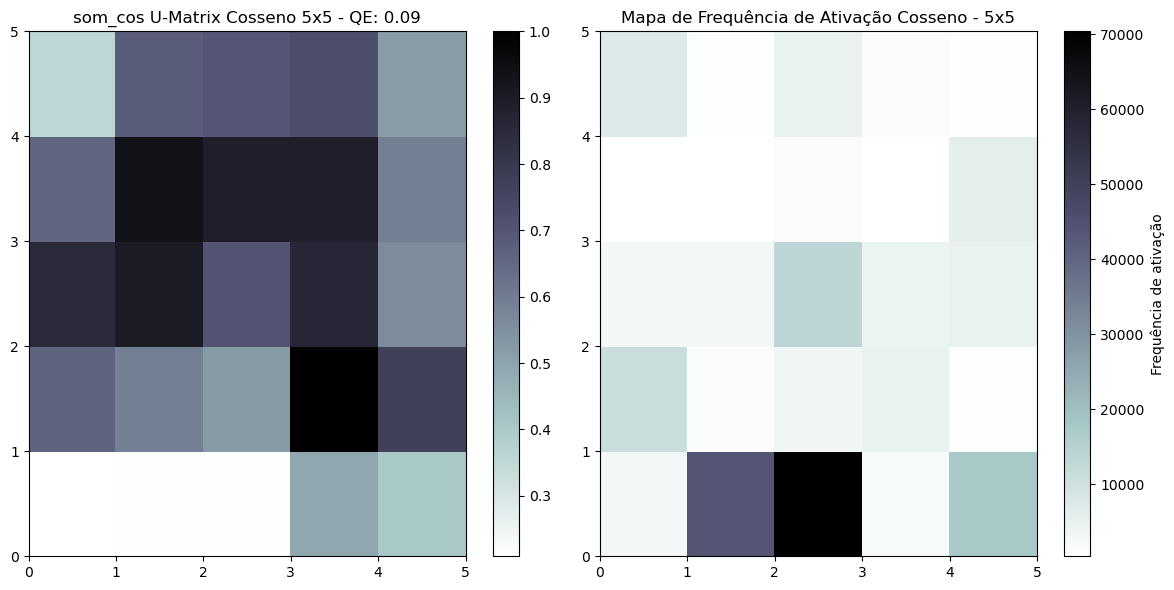

MiniSom 6x6 - Erro de quantização: 0.08237175066457086


MiniSom 7x7 - Erro de quantização: 0.07062186789337402


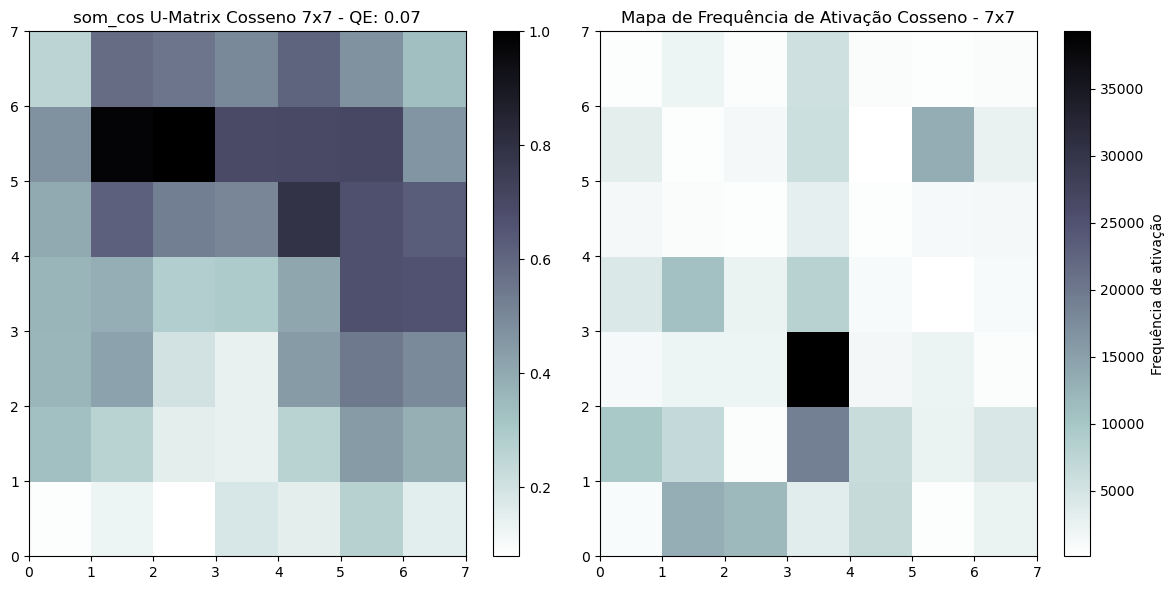

MiniSom 8x8 - Erro de quantização: 0.06152997029972734


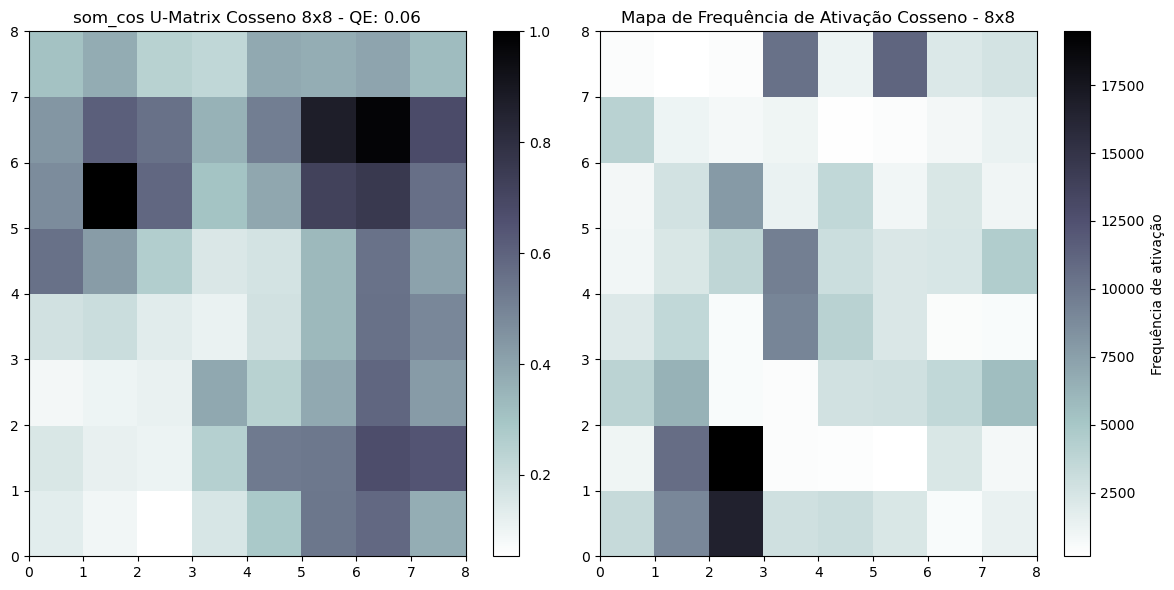

MiniSom 9x9 - Erro de quantização: 0.05541444872642542


MiniSom 10x10 - Erro de quantização: 0.05212151436828636


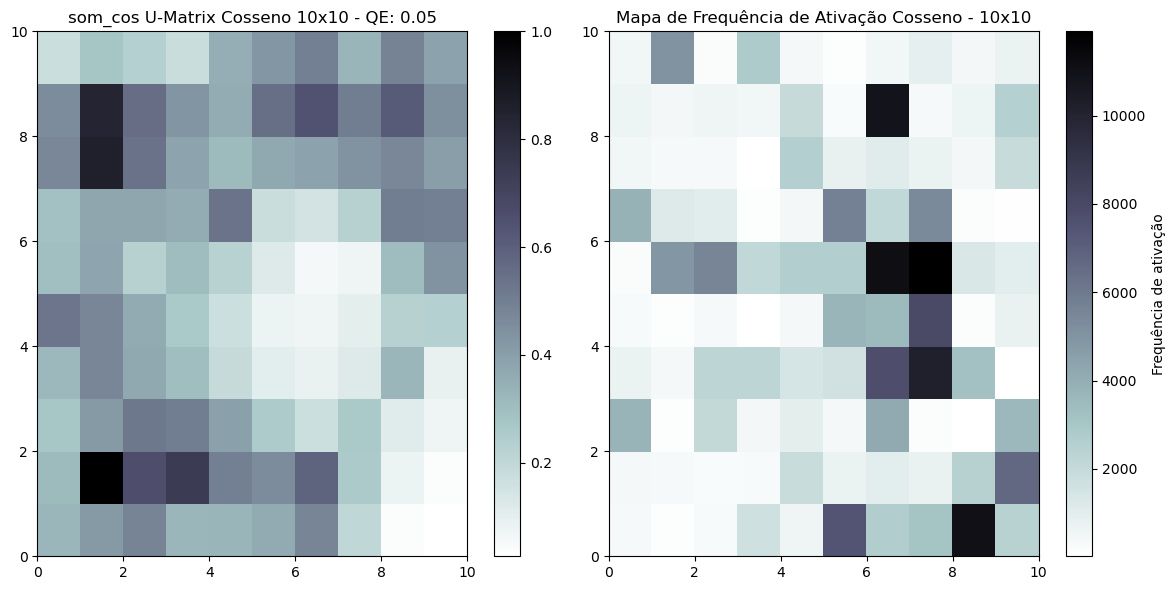

MiniSom 11x11 - Erro de quantização: 0.0489619568566008


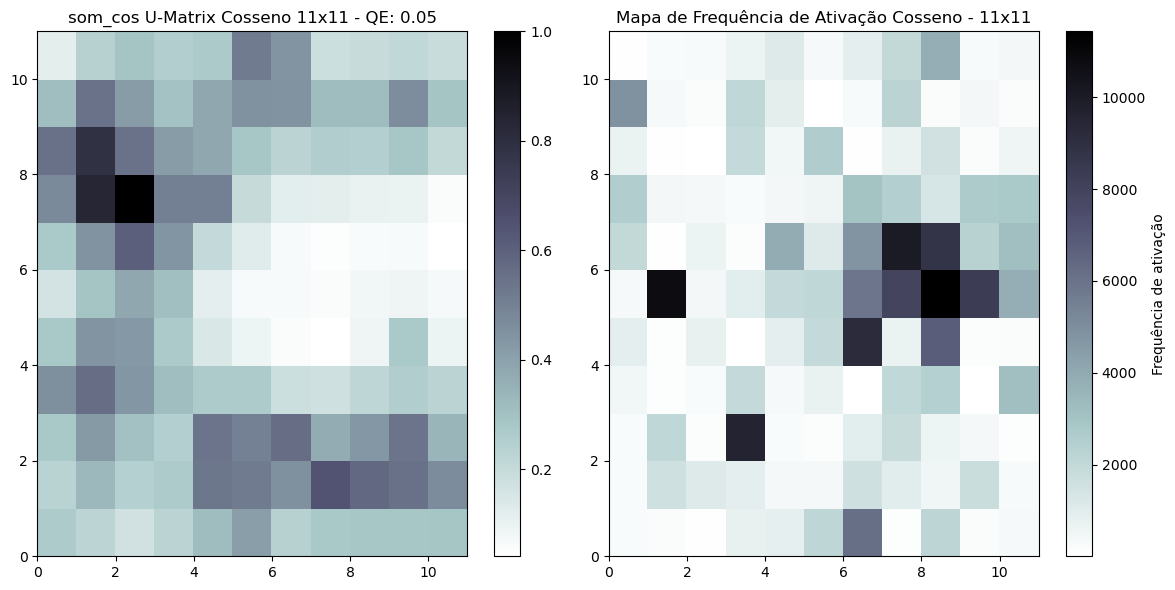

MiniSom 12x12 - Erro de quantização: 0.047238680475015345


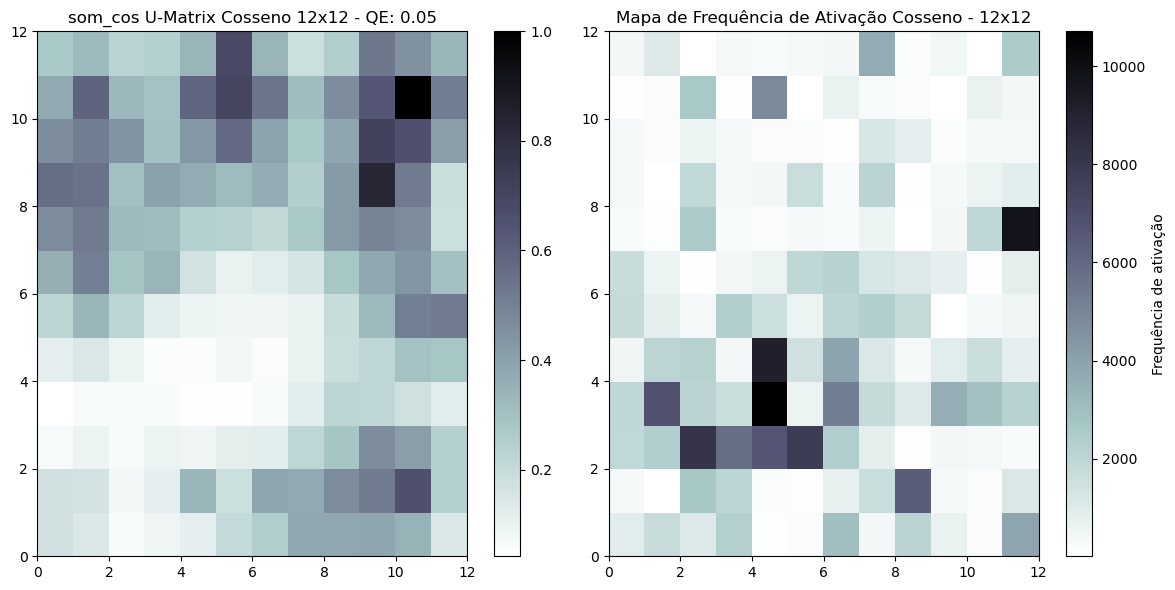

MiniSom 13x13 - Erro de quantização: 0.0449113352829658


MiniSom 14x14 - Erro de quantização: 0.04156727595343475


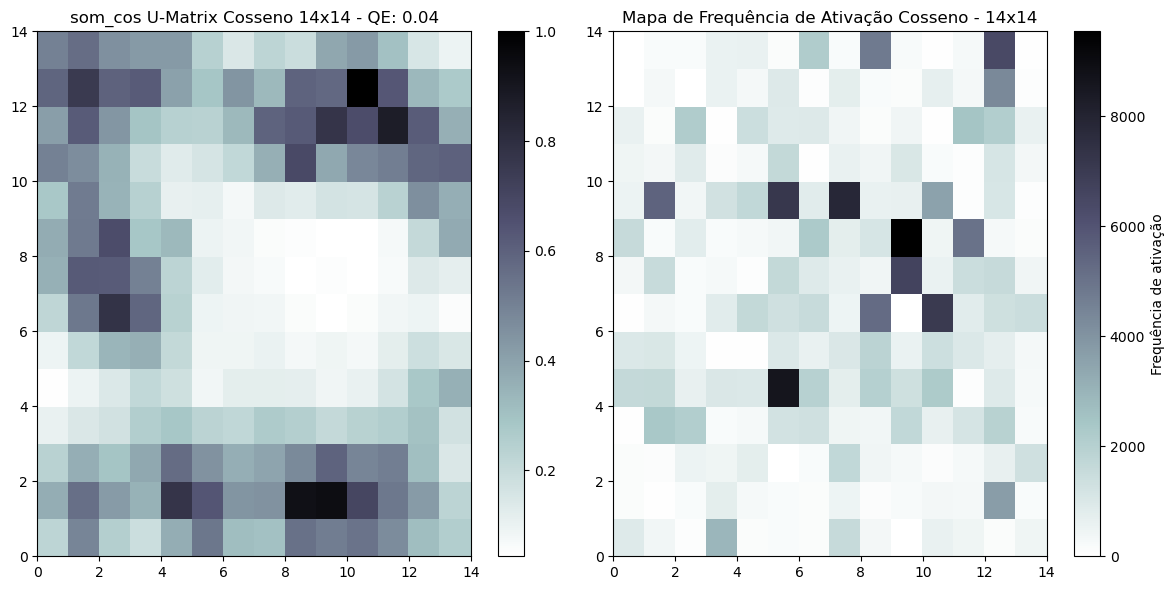

In [95]:
erro = []
sizes = []

for i in range(2, 15):
    som_cos = MiniSom(i, i, 
                      input_len=df_normalized_min.shape[1], 
                      sigma=1.0, 
                      learning_rate=0.5, 
                      activation_distance='cosine', 
                      random_seed=42)
    
    som_cos.train_random(df_normalized_min, 50000)
    qe = som_cos.quantization_error(df_normalized_min)
    erro.append(qe)
    sizes.append(i)
    print(f"MiniSom {i}x{i} - Erro de quantização: {qe}")

    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    # Mapa de distância (U-Matrix)
    u_matrix = som_cos.distance_map().T
    grafico1 = axes[0].pcolor(u_matrix, cmap='bone_r')
    fig.colorbar(grafico1, ax=axes[0])
    axes[0].set_title(f"som_cos U-Matrix Cosseno {i}x{i} - QE: {round(qe, 2)}")

    # Mapa de Frequência de Ativação
    activation_map = np.zeros((i, i))
    for sample in df_normalized_min:
        winner = som_cos.winner(sample)
        activation_map[winner] += 1

    grafico2 = axes[1].pcolor(activation_map.T, cmap='bone_r')
    fig.colorbar(grafico2, ax=axes[1], label='Frequência de ativação')
    axes[1].set_title(f'Mapa de Frequência de Ativação Cosseno - {i}x{i}')

    plt.tight_layout()
    plt.show()

In [96]:
# Checando o erro de quantização

plt.figure(figsize=(8, 5))
plt.plot(sizes, erro, marker='o')
plt.title("Erro de Quantização por Tamanho do Mapa SOM com Cosseno")
plt.xlabel("Tamanho do Mapa (NxN)")
plt.ylabel("Erro de Quantização")
plt.grid(True)
plt.show()

### MapaSom com 7x7, learning rate com 0.5 e iteration 50000:

In [98]:
som_cos = MiniSom(x=7, y=7, 
                  input_len=df_normalized_min.shape[1], 
                  sigma=1.0, learning_rate=0.5, 
                  activation_distance='cosine', 
                  random_seed=42)

som_cos.train_random(df_normalized_min, num_iteration=50000, verbose=True)

 [ 50000 / 50000 ] 100% - 0:00:00 left 
 quantization error: 0.07062186789337402


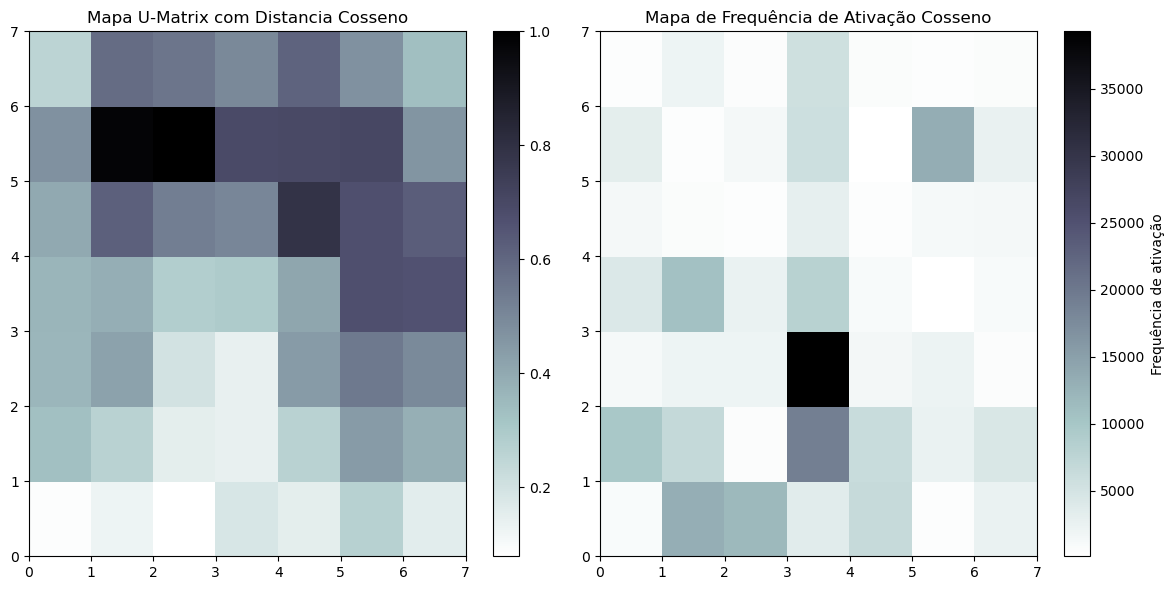

In [99]:
# Visualização dos Resultados

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Mapa de distância (U-Matrix)
u_matrix = som_cos.distance_map().T
grafico1 = axes[0].pcolor(u_matrix, cmap='bone_r')
fig.colorbar(grafico1, ax=axes[0])
axes[0].set_title("Mapa U-Matrix com Distancia Cosseno")

# Mapa de Frequência de Ativação
activation_map = np.zeros((7, 7))
for sample in df_normalized_min:
    winner = som_cos.winner(sample)
    activation_map[winner] += 1

grafico2 = axes[1].pcolor(activation_map.T, cmap='bone_r')
fig.colorbar(grafico2, ax=axes[1], label='Frequência de ativação')
axes[1].set_title('Mapa de Frequência de Ativação Cosseno')

plt.tight_layout()
plt.show()

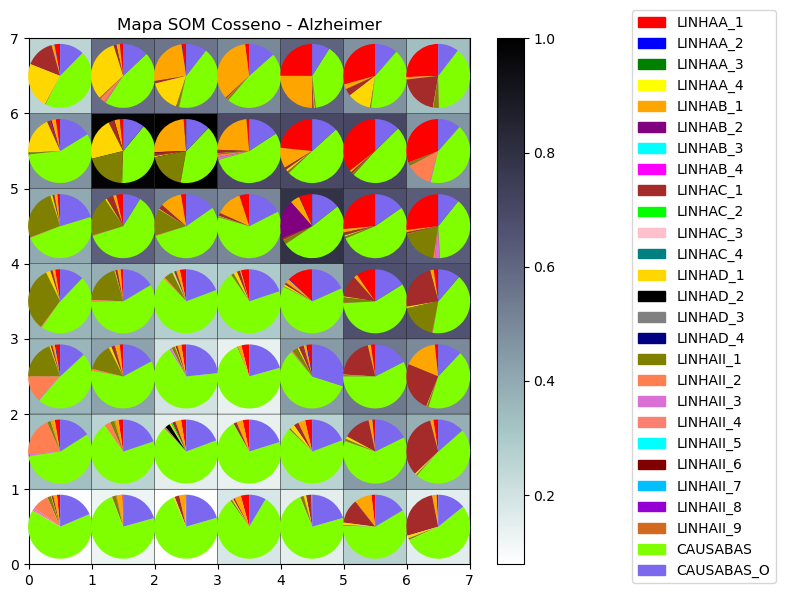

In [100]:
som_cos_size = (7,7)

weights = som_cos.get_weights()

# Create figure
fig, ax = plt.subplots(figsize=(6, 6))

# U-Matrix
u_matrix = som_cos.distance_map().T
plt.pcolor(u_matrix, cmap='bone_r', edgecolors='k')  
plt.colorbar()
plt.title("Mapa SOM Cosseno - Alzheimer")
plt.tight_layout()

# Gráficos de Pizza posicionados corretamente
for i in range(som_cos_size[0]):
    for j in range(som_cos_size[1]):
        neuron_weights = weights[i, j] # obtem a posição dos pesos
        
        neuron_weights = np.clip(neuron_weights, 0, None) # remove 0
        
        if neuron_weights.sum() == 0:
            continue
            
        neuron_weights = neuron_weights / neuron_weights.sum() # Normaliza os pesos

        # print(f"Neurônio ({i}, {j}) → Pesos normalizados: {neuron_weights}")
        
        # largura e altura 
        pie_ax = inset_axes(ax,  # eixo principal onde está o mapa SOM
                            width=0.8, height=0.8,  # fixo
                            loc='center',
                            bbox_to_anchor=(i + 0.5, j + 0.5), # centraliza no neurônio (i,j)
                            # Converte as coordenadas (i + 0.5, j + 0.5) para o sistema de coordenadas do gráfico
                            bbox_transform=ax.transData, # garante que a posição da pizza esteja correta em relação ao mapa SOM plotado
                            borderpad=0)
        pie_ax.pie(neuron_weights, colors=colors, startangle=90)

        # Remove os eixos do gráfico de pizza (limpa visual)
        pie_ax.set_xticks([])
        pie_ax.set_yticks([])

# Legenda
patches = [Patch(color=colors[i], label=labels[i]) for i in range(len(labels))]
fig.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

### Ajustando o Leraning Rate

som_cos 2x2 - Erro de quantização: 0.1760837804535541


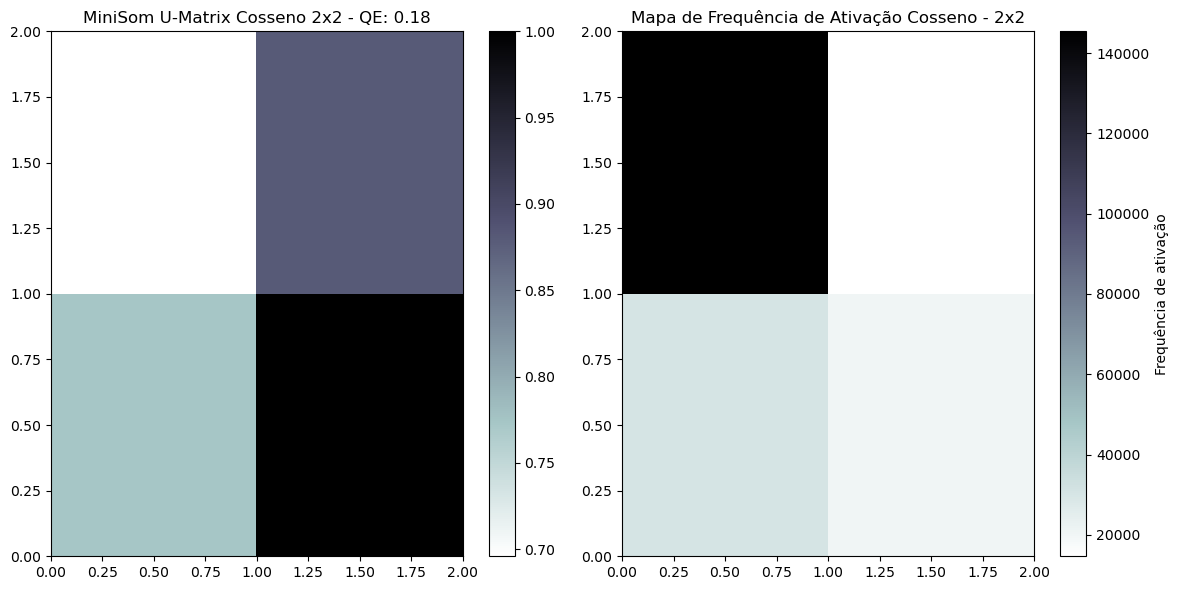

som_cos 3x3 - Erro de quantização: 0.1218193133055847


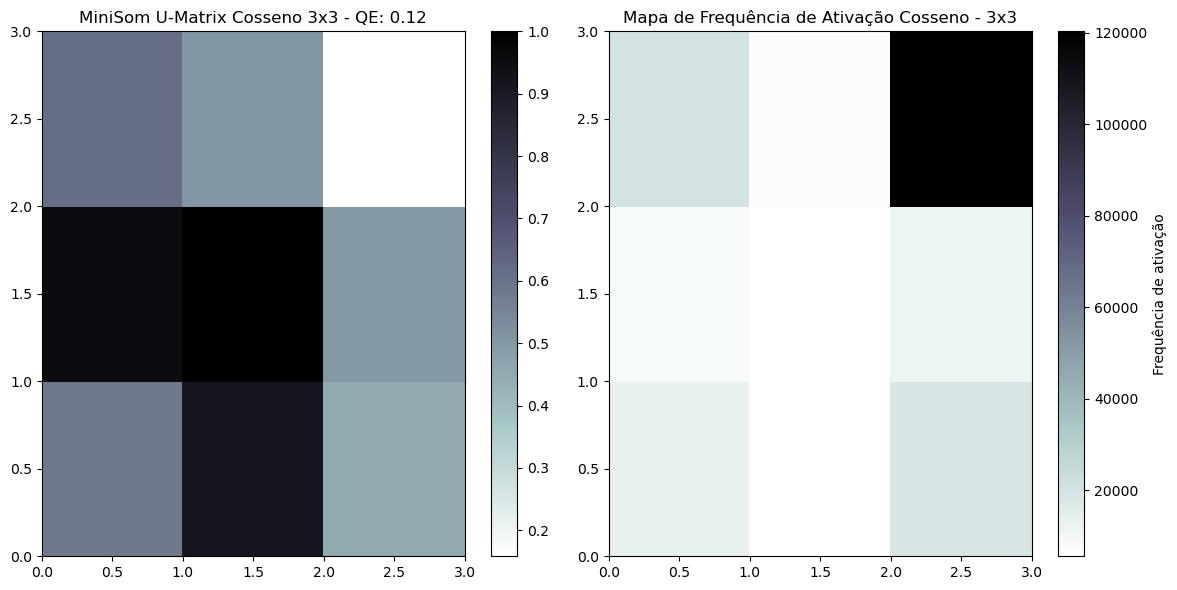

som_cos 4x4 - Erro de quantização: 0.10079578646821585


som_cos 5x5 - Erro de quantização: 0.08599410078120379


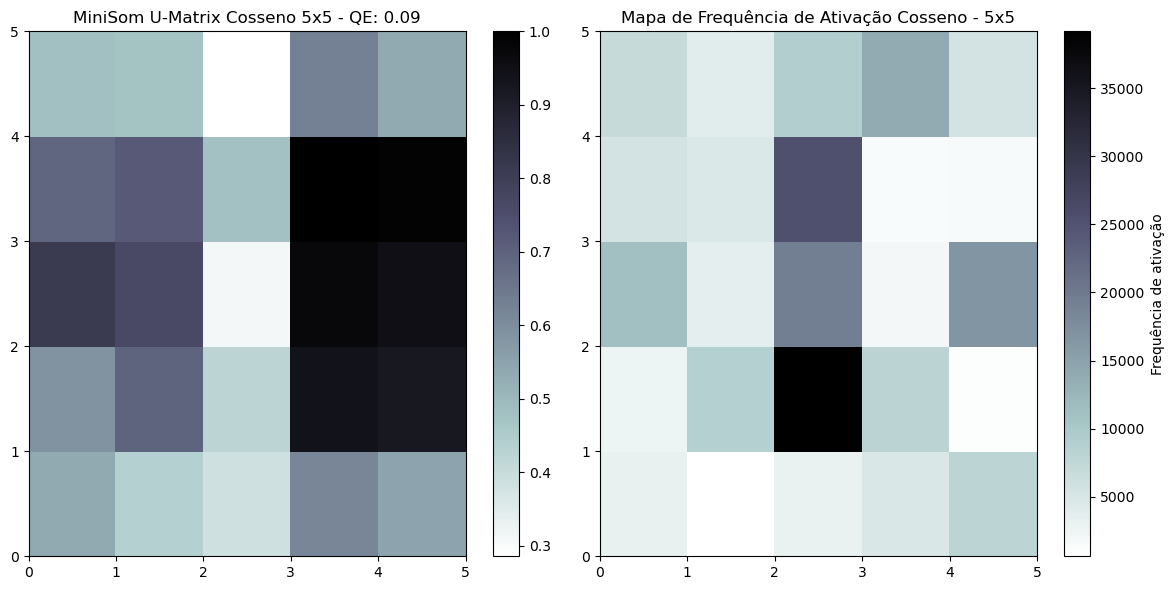

som_cos 6x6 - Erro de quantização: 0.07740579068551819


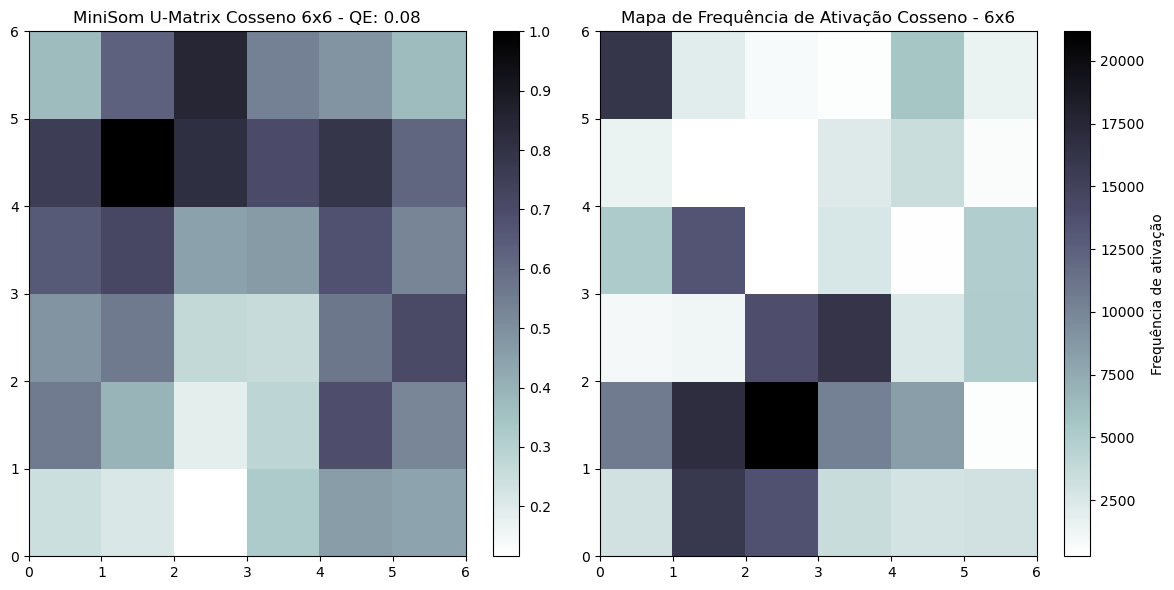

som_cos 7x7 - Erro de quantização: 0.06997119756994216


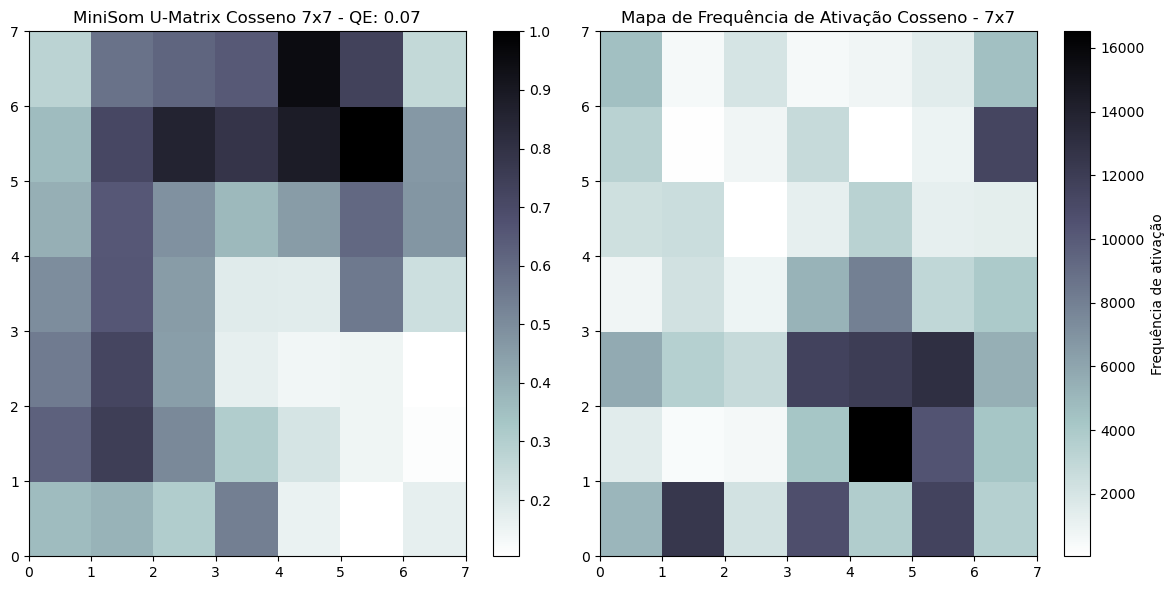

som_cos 8x8 - Erro de quantização: 0.06778603223005239


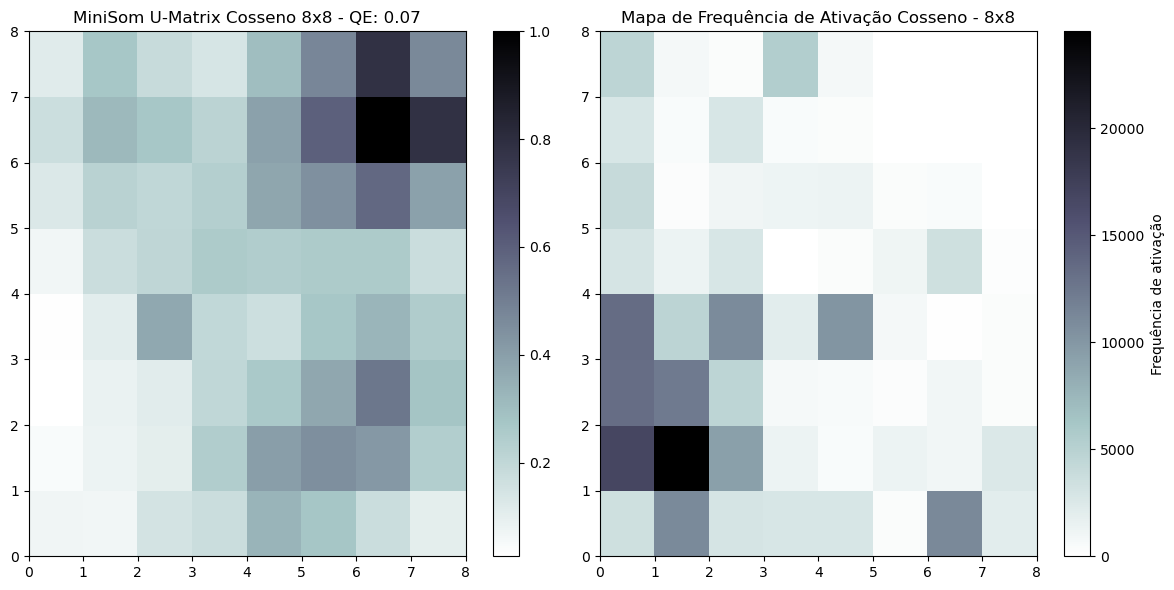

som_cos 9x9 - Erro de quantização: 0.06783881766086801


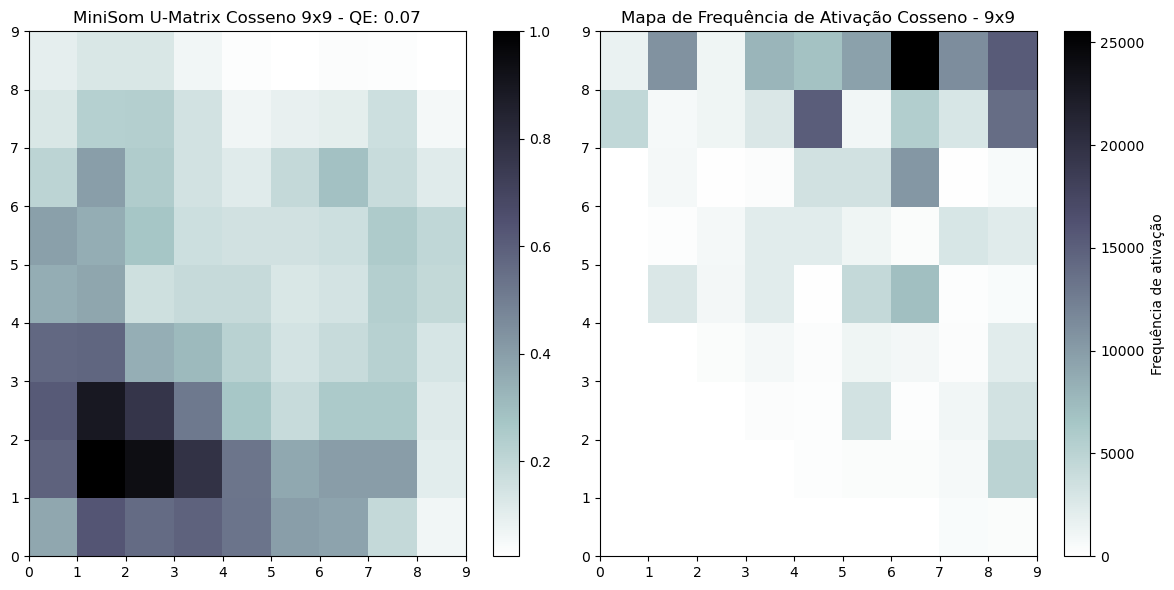

som_cos 10x10 - Erro de quantização: 0.06759748960439985


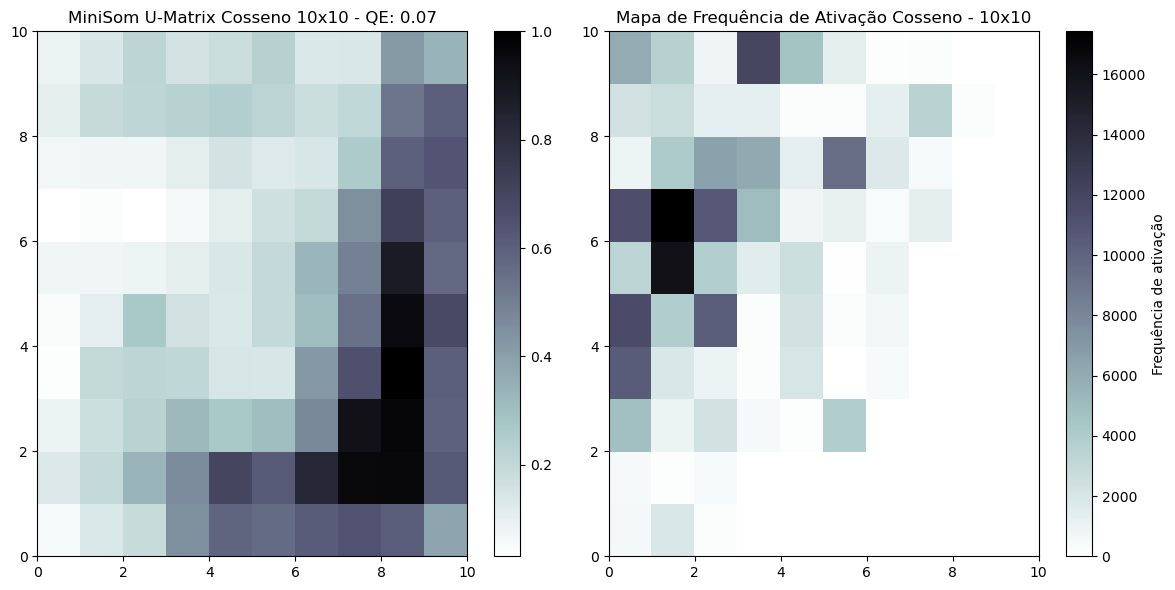

som_cos 11x11 - Erro de quantização: 0.05757631693358246


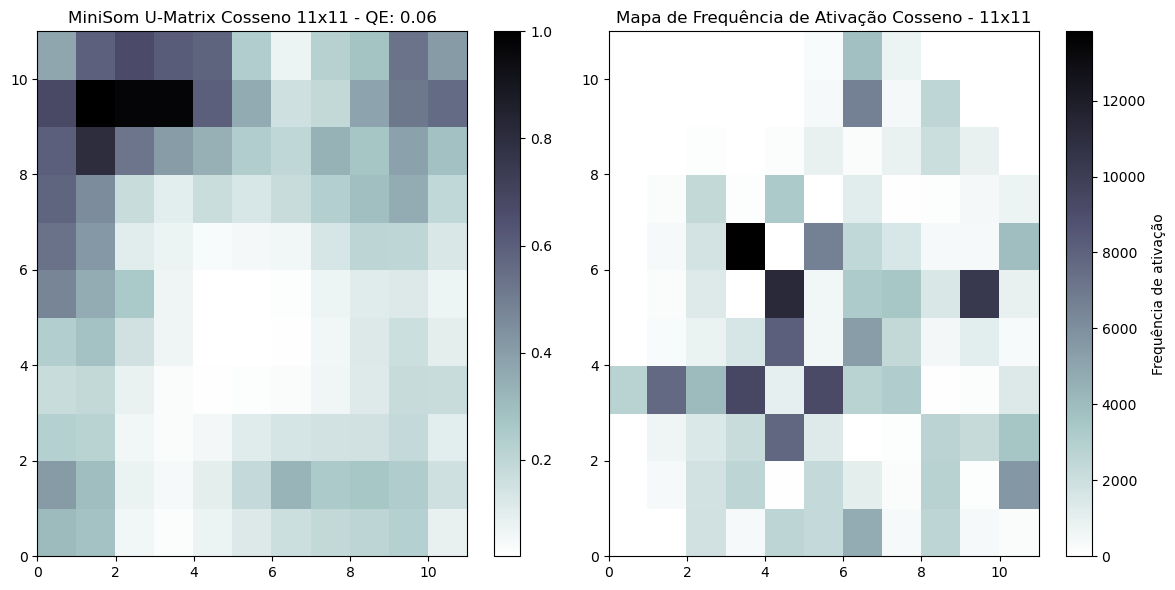

som_cos 12x12 - Erro de quantização: 0.06689403184145357


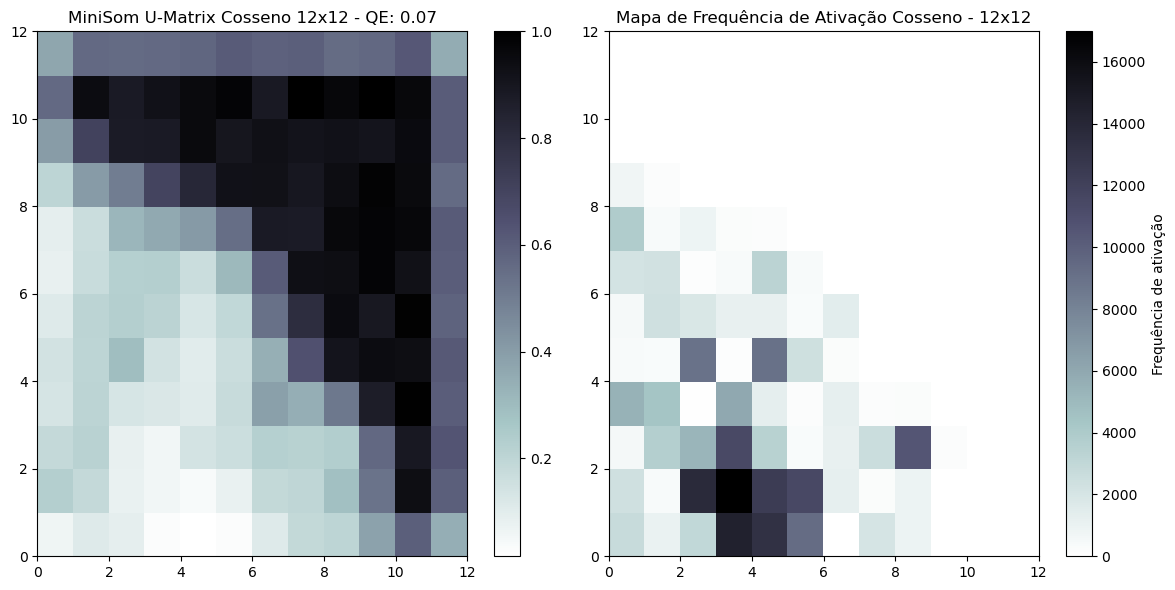

som_cos 13x13 - Erro de quantização: 0.06612125473740126


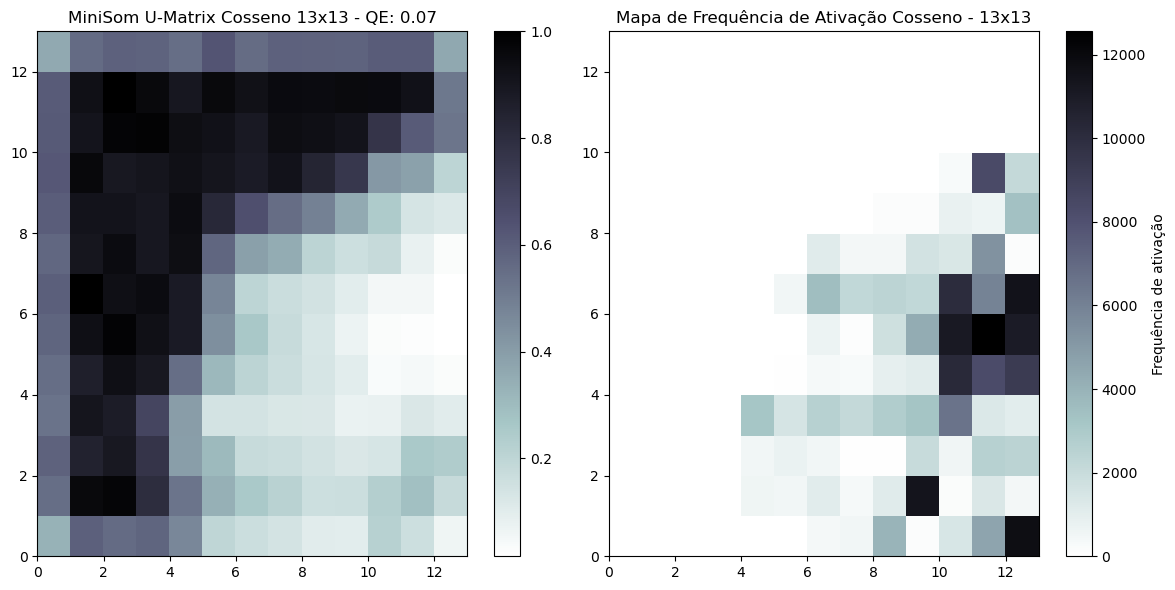

som_cos 14x14 - Erro de quantização: 0.05903969976035554


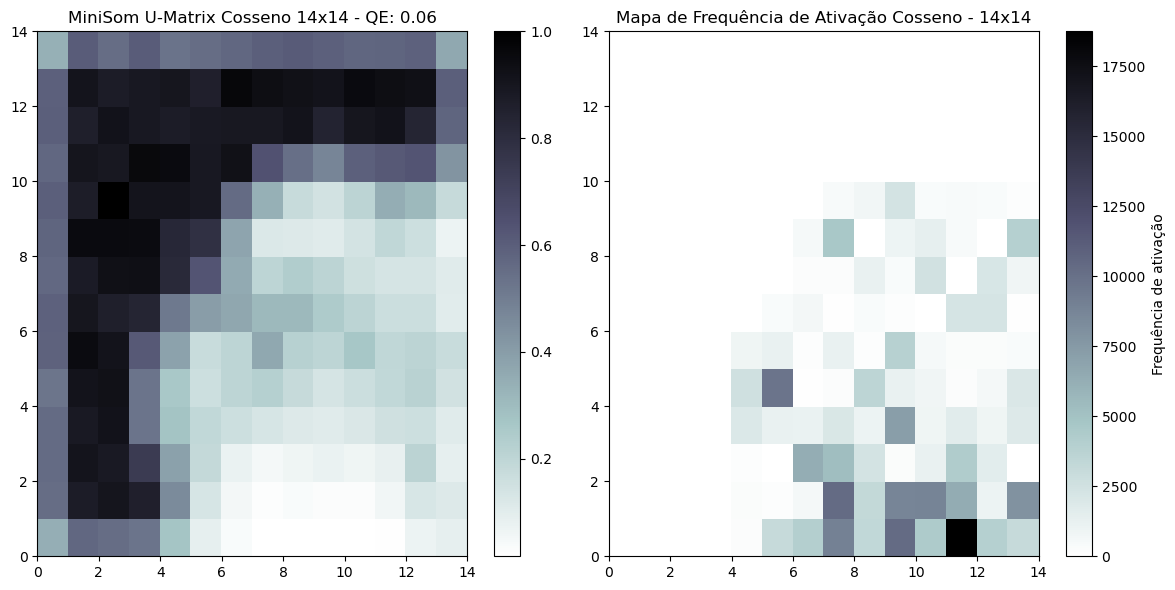

In [102]:
erro = []
sizes = []

for i in range(2, 15):
    som_cos = MiniSom(i, i, 
                      input_len=df_normalized_min.shape[1], 
                      sigma=1.0, learning_rate=0.05, 
                      activation_distance='cosine', 
                      random_seed=42)
    
    som_cos.train_random(df_normalized_min, 50000)
    qe = som_cos.quantization_error(df_normalized_min)
    erro.append(qe)
    sizes.append(i)
    print(f"som_cos {i}x{i} - Erro de quantização: {qe}")

    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    # Mapa de distância (U-Matrix)
    u_matrix = som_cos.distance_map().T
    grafico1 = axes[0].pcolor(u_matrix, cmap='bone_r')
    fig.colorbar(grafico1, ax=axes[0])
    axes[0].set_title(f"MiniSom U-Matrix Cosseno {i}x{i} - QE: {round(qe, 2)}")

    # Mapa de Frequência de Ativação
    activation_map = np.zeros((i, i))
    for sample in df_normalized_min:
        winner = som_cos.winner(sample)
        activation_map[winner] += 1

    grafico2 = axes[1].pcolor(activation_map.T, cmap='bone_r')
    fig.colorbar(grafico2, ax=axes[1], label='Frequência de ativação')
    axes[1].set_title(f'Mapa de Frequência de Ativação Cosseno - {i}x{i}')

    plt.tight_layout()
    plt.show()

### MapaSom com 6x6, learning rate com 0.05 e iteration 50000:

In [104]:
som_cos = MiniSom(x=6, y=6, 
                  input_len=df_normalized_min.shape[1], 
                  sigma=1.0, learning_rate=0.05, 
                  activation_distance='cosine', 
                  random_seed=42)

som_cos.train_random(df_normalized_min, num_iteration=50000, verbose=True)

 [ 50000 / 50000 ] 100% - 0:00:00 left 
 quantization error: 0.07740579068551819


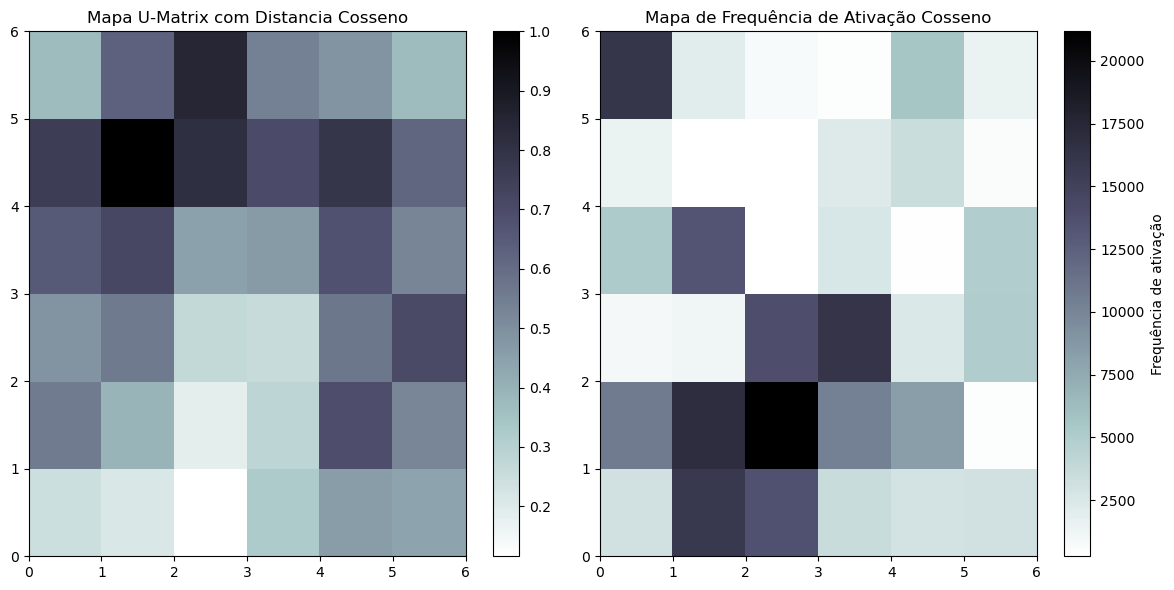

In [105]:
# Visualização dos Resultados

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Mapa de distância (U-Matrix)
u_matrix = som_cos.distance_map().T
grafico1 = axes[0].pcolor(u_matrix, cmap='bone_r')
fig.colorbar(grafico1, ax=axes[0])
axes[0].set_title("Mapa U-Matrix com Distancia Cosseno")

# Mapa de Frequência de Ativação
activation_map = np.zeros((6, 6))
for sample in df_normalized_min:
    winner = som_cos.winner(sample)
    activation_map[winner] += 1

grafico2 = axes[1].pcolor(activation_map.T, cmap='bone_r')
fig.colorbar(grafico2, ax=axes[1], label='Frequência de ativação')
axes[1].set_title('Mapa de Frequência de Ativação Cosseno')

plt.tight_layout()
plt.show()

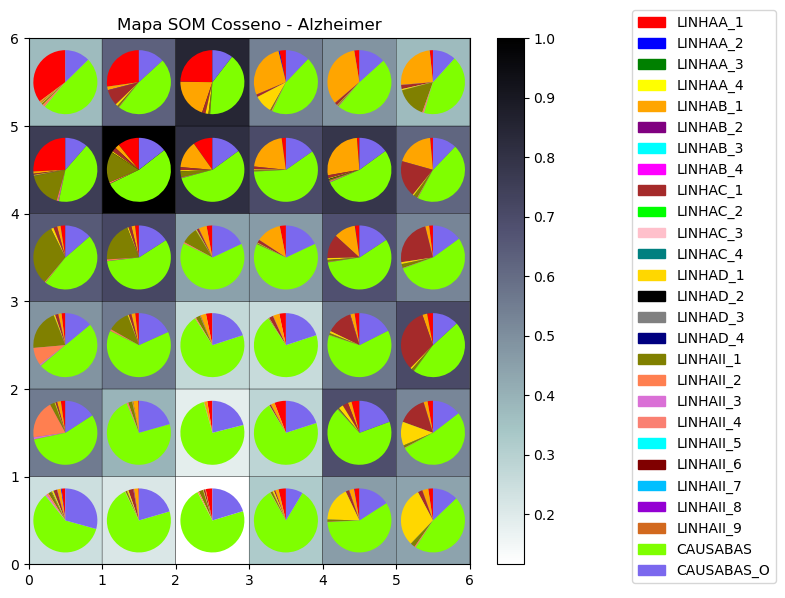

In [106]:
som_cos_size = (6,6)

weights = som_cos.get_weights()

# Create figure
fig, ax = plt.subplots(figsize=(6, 6))

# U-Matrix
u_matrix = som_cos.distance_map().T
plt.pcolor(u_matrix, cmap='bone_r', edgecolors='k')  
plt.colorbar()
plt.title("Mapa SOM Cosseno - Alzheimer")
plt.tight_layout()

# Gráficos de Pizza posicionados corretamente
for i in range(som_cos_size[0]):
    for j in range(som_cos_size[1]):
        neuron_weights = weights[i, j] # obtem a posição dos pesos
        
        neuron_weights = np.clip(neuron_weights, 0, None) # remove 0
        
        if neuron_weights.sum() == 0:
            continue
            
        neuron_weights = neuron_weights / neuron_weights.sum() # Normaliza os pesos

        # print(f"Neurônio ({i}, {j}) → Pesos normalizados: {neuron_weights}")
        
        # largura e altura 
        pie_ax = inset_axes(ax,  # eixo principal onde está o mapa SOM
                            width=0.8, height=0.8,  # fixo
                            loc='center',
                            bbox_to_anchor=(i + 0.5, j + 0.5), # centraliza no neurônio (i,j)
                            # Converte as coordenadas (i + 0.5, j + 0.5) para o sistema de coordenadas do gráfico
                            bbox_transform=ax.transData, # garante que a posição da pizza esteja correta em relação ao mapa SOM plotado
                            borderpad=0)
        pie_ax.pie(neuron_weights, colors=colors, startangle=90)

        # Remove os eixos do gráfico de pizza (limpa visual)
        pie_ax.set_xticks([])
        pie_ax.set_yticks([])

# Legenda
patches = [Patch(color=colors[i], label=labels[i]) for i in range(len(labels))]
fig.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

### MapaSom com 7x7, learning rate com 0.05 e iteration 50000:

In [108]:
som_cos = MiniSom(x=7, y=7, 
                  input_len=df_normalized_min.shape[1], 
                  sigma=1.0, learning_rate=0.05, 
                  activation_distance='cosine', 
                  random_seed=42)

som_cos.train_random(df_normalized_min, num_iteration=50000, verbose=True)

 [ 50000 / 50000 ] 100% - 0:00:00 left 
 quantization error: 0.06997119756994216


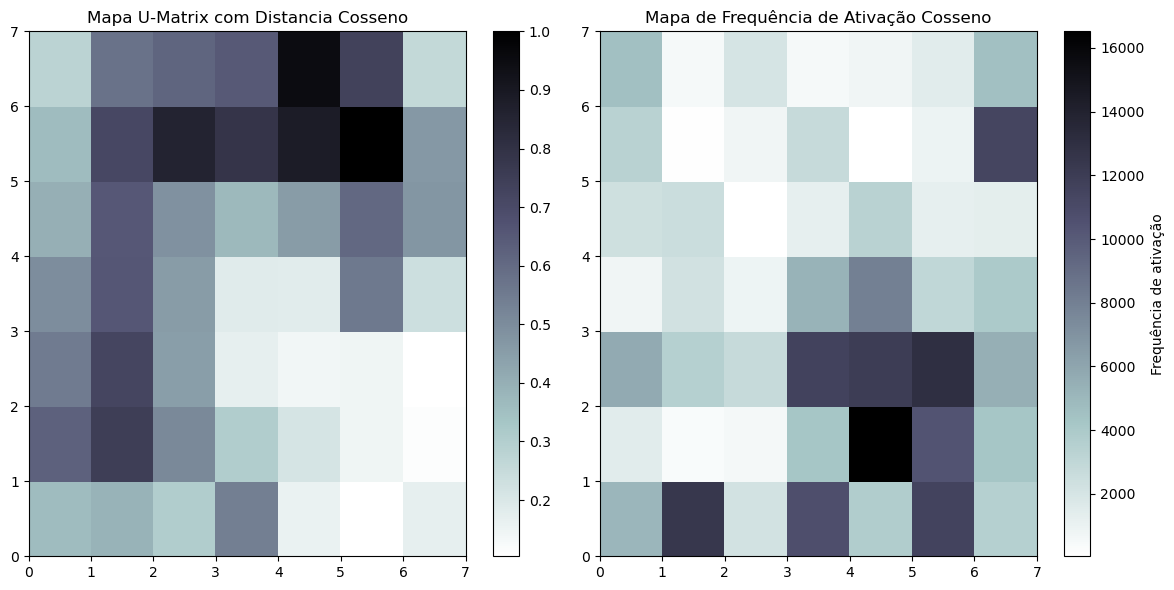

In [109]:
# Visualização dos Resultados

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Mapa de distância (U-Matrix)
u_matrix = som_cos.distance_map().T
grafico1 = axes[0].pcolor(u_matrix, cmap='bone_r')
fig.colorbar(grafico1, ax=axes[0])
axes[0].set_title("Mapa U-Matrix com Distancia Cosseno")

# Mapa de Frequência de Ativação
activation_map = np.zeros((7, 7))
for sample in df_normalized_min:
    winner = som_cos.winner(sample)
    activation_map[winner] += 1

grafico2 = axes[1].pcolor(activation_map.T, cmap='bone_r')
fig.colorbar(grafico2, ax=axes[1], label='Frequência de ativação')
axes[1].set_title('Mapa de Frequência de Ativação Cosseno')

plt.tight_layout()
plt.show()

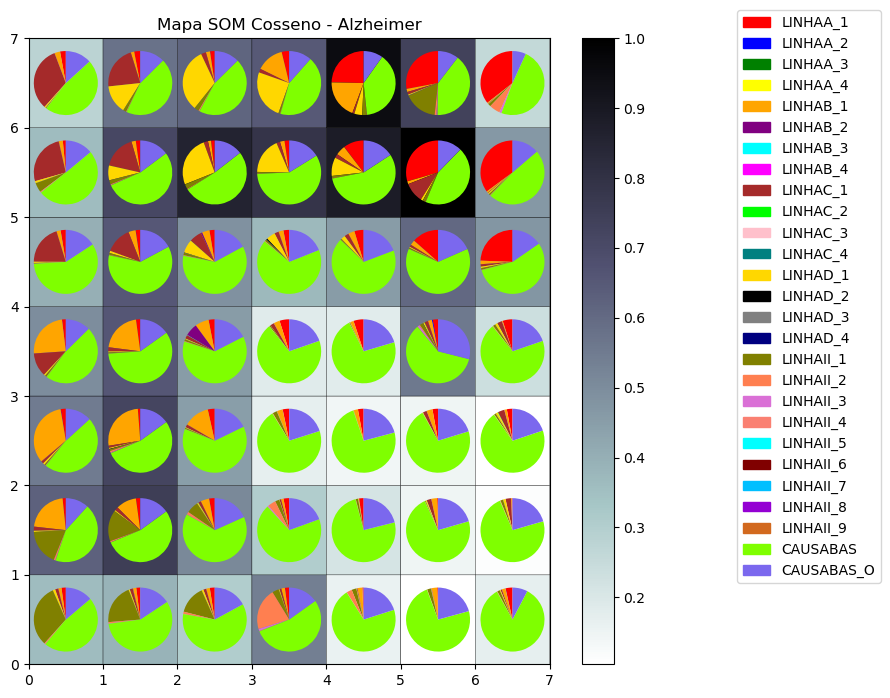

In [110]:
som_cos_size = (7,7)

weights = som_cos.get_weights()

# Create figure
fig, ax = plt.subplots(figsize=(7, 7))

# U-Matrix
u_matrix = som_cos.distance_map().T
plt.pcolor(u_matrix, cmap='bone_r', edgecolors='k')  
plt.colorbar()
plt.title("Mapa SOM Cosseno - Alzheimer")
plt.tight_layout()

# Gráficos de Pizza posicionados corretamente
for i in range(som_cos_size[0]):
    for j in range(som_cos_size[1]):
        neuron_weights = weights[i, j] # obtem a posição dos pesos
        
        neuron_weights = np.clip(neuron_weights, 0, None) # remove 0
        
        if neuron_weights.sum() == 0:
            continue
            
        neuron_weights = neuron_weights / neuron_weights.sum() # Normaliza os pesos

        #print(f"Neurônio ({i}, {j}) → Pesos normalizados: {neuron_weights}")
        
        # largura e altura 
        pie_ax = inset_axes(ax,  # eixo principal onde está o mapa SOM
                            width=0.8, height=0.8,  # fixo
                            loc='center',
                            bbox_to_anchor=(i + 0.5, j + 0.5), # centraliza no neurônio (i,j)
                            # Converte as coordenadas (i + 0.5, j + 0.5) para o sistema de coordenadas do gráfico
                            bbox_transform=ax.transData, # garante que a posição da pizza esteja correta em relação ao mapa SOM plotado
                            borderpad=0)
        pie_ax.pie(neuron_weights, colors=colors, startangle=90)

        # Remove os eixos do gráfico de pizza (limpa visual)
        pie_ax.set_xticks([])
        pie_ax.set_yticks([])

# Legenda
patches = [Patch(color=colors[i], label=labels[i]) for i in range(len(labels))]
fig.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

## Análisando o Resultado do treinamento

In [112]:
# Coordenada dos possíveis clusters
cluster_1 = [(3,0), (3,1), (3,2), (4,0), (4,1), (4,2), (5,0), (5,1), (5,2)]
cluster_2 = [(6,6)]
cluster_3 = [(1,0)]

dados_cluster_1 = []
dados_cluster_2 = []
dados_cluster_3 = []

# Loop pelos dados normalizados para verificar a qual neurônio cada amostra pertence
for i, sample in enumerate(df_normalized_min):
    # Identifica o neurônio vencedor no mapa SOM para a amostra atual
    winner = som_cos.winner(sample)

    # Verifica se o neurônio vencedor está no cluster 1
    if winner in cluster_1:
        # Se sim, adiciona a amostra original ao cluster 1
        dados_cluster_1.append(df_training.iloc[i])
    
    # Verifica se o neurônio vencedor está no cluster 2
    elif winner in cluster_2:
        # Se sim, adiciona a amostra original ao cluster 2
        dados_cluster_2.append(df_training.iloc[i])
    
    # Verifica se o neurônio vencedor está no cluster 3
    elif winner in cluster_3:
        # Se sim, adiciona a amostra original ao cluster 3
        dados_cluster_3.append(df_training.iloc[i])

# Transforma em DFs
df_cluster_1 = pd.DataFrame(dados_cluster_1)
df_cluster_2 = pd.DataFrame(dados_cluster_2)
df_cluster_3 = pd.DataFrame(dados_cluster_3)

In [113]:
df_cluster_1.shape

(93752, 27)

In [114]:
df_cluster_2.shape

(4571, 27)

In [115]:
df_cluster_3.shape

(12461, 27)

In [116]:
# Função para descodificar o CID previamente codificado para o treinamento 

def descodificar_cid(cid_codificado):

    #transforma para string
    cid_str = str(cid_codificado)

    # verifica o length
    if len(cid_str) == 4:
        # pega o 1° dígito, transforma para ASCII
        capitulo = chr(int(cid_str[0]) + ord('A') - 1)

        # o restante será número
        numeros = cid_str[1:]

        # retorna a combinação do capítulo com os numeros
        return capitulo + numeros
        
    elif len(cid_str) == 5:
        if cid_str[3:] == "24":
            capitulo = chr(int(cid_str[0]) + ord('A') - 1)
            numeros = cid_str[1:3]
            sufixo = chr(int(cid_str[3:]) + ord('A') - 1)

            return capitulo + numeros + sufixo

        else:
            capitulo = chr(int(cid_str[:2]) + ord('A') - 1)
            numeros = cid_str[2:]

            return capitulo + numeros

    elif len(cid_str) == 6:
        if cid_str[4:] == "24":
            capitulo = chr(int(cid_str[:2]) + ord('A') - 1)
            numeros = cid_str[2:4]
            sufixo = chr(int(cid_str[4:]) + ord('A') - 1)

            return capitulo + numeros + sufixo

    

    else:
        return 0

In [117]:
# Descodificando os CIDs

df_cluster_1_descodificado = df_cluster_1.apply(lambda col: col.map(descodificar_cid))
df_cluster_2_descodificado = df_cluster_2.apply(lambda col: col.map(descodificar_cid))
df_cluster_3_descodificado = df_cluster_3.apply(lambda col: col.map(descodificar_cid))

In [118]:
df_cluster_1_descodificado.head()

LINHAA_1 LINHAA_2 LINHAA_3 LINHAA_4 LINHAB_1 LINHAB_2 LINHAB_3 LINHAB_4  \
3      G300        0        0        0        0        0        0        0   
4      G300        0        0        0        0        0        0        0   
8      I500        0        0        0     G300        0        0        0   
9      J960        0        0        0     G300        0        0        0   
12     J960        0        0        0     J189        0        0        0   

   LINHAC_1 LINHAC_2  ... LINHAII_2  LINHAII_3 LINHAII_4 LINHAII_5 LINHAII_6  \
3         0        0  ...         0          0         0         0         0   
4         0        0  ...         0          0         0         0         0   
8         0        0  ...         0          0         0         0         0   
9         0        0  ...         0          0         0         0         0   
12     I500        0  ...         0          0         0         0         0   

   LINHAII_7 LINHAII_8 LINHAII_9 CAUSABAS CAUSABAS_O  
3          0         0         0     G300       G300  
4          0         0         0     G300       G300  
8          0         0         0     G300       G300  
9          0         0         0     G300       G300  
12         0         0         0     G300       G300  

[5 rows x 27 columns]

### Visualizando os Resultados

#### Cluster1

In [121]:
cids_lista_1 = df_cluster_1_descodificado.values.flatten() # transformando as colunas em uma única lista
cids_lista_1 = pd.Series(cids_lista_1) # transfornamdno em uma coluna

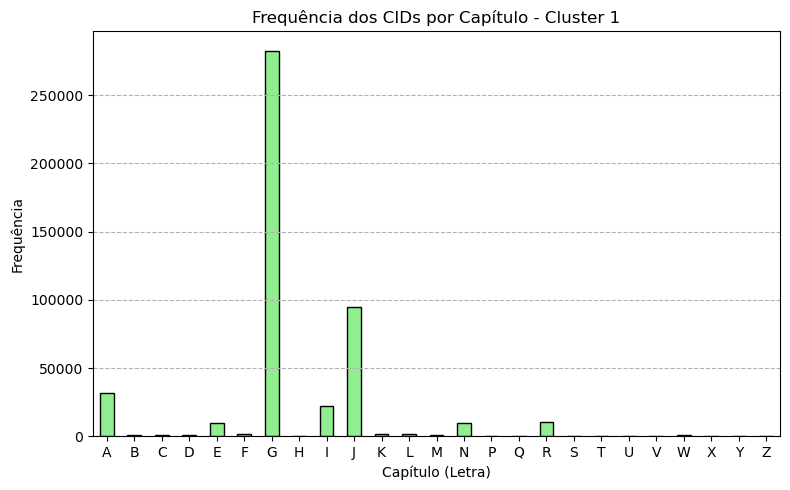

In [122]:
# Pega a primeira letra (capítulo CID)
capitulos = cids_lista_1.str[0]

# Conta a frequência de cada capítulo e ordena em ordem alfabética
frequencias_capitulo = capitulos.value_counts().sort_index()

# Visualização
plt.figure(figsize=(8, 5))

frequencias_capitulo.plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Frequência dos CIDs por Capítulo - Cluster 1')
plt.xlabel('Capítulo (Letra)')
plt.ylabel('Frequência')
plt.xticks(rotation=0)

#for i, value in enumerate(frequencias_capitulo):
#    plt.text(i, value, str(value), ha='center')

plt.tight_layout()
plt.grid(axis='y', linestyle='--')

plt.show()

Nesse primeiro cluster, além de CIDs do capítulo G, é possível notar valores interessantes de CIDs do capítulo J e A

#### Cluster2

In [125]:
cids_lista_2 = df_cluster_2_descodificado.values.flatten()
cids_lista_2 = pd.Series(cids_lista_2)

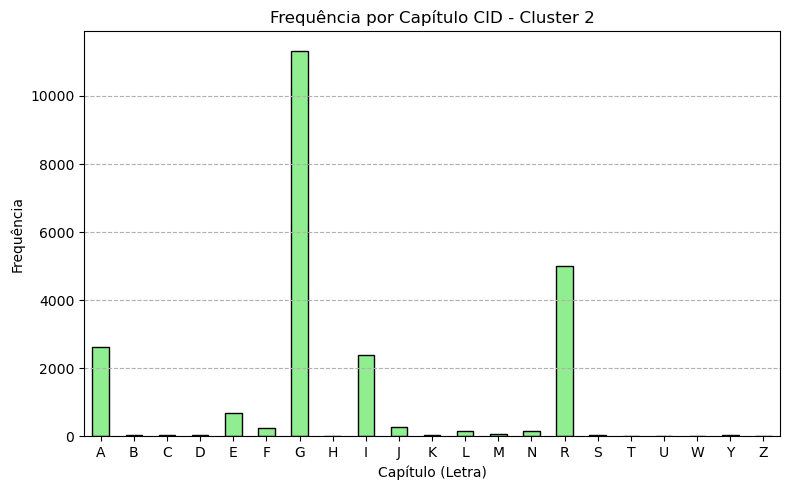

In [126]:
# Pega a primeira letra (capítulo CID)
capitulos = cids_lista_2.str[0]

# Conta a frequência de cada capítulo
frequencias_capitulo = capitulos.value_counts().sort_index()

plt.figure(figsize=(8, 5))

frequencias_capitulo.plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Frequência por Capítulo CID - Cluster 2')
plt.xlabel('Capítulo (Letra)')
plt.ylabel('Frequência')
plt.xticks(rotation=0)

#for i, value in enumerate(frequencias_capitulo):
#    plt.text(i, value, str(value), ha='center')

plt.tight_layout()
plt.grid(axis='y', linestyle='--')

plt.show()

Nesse segundo cluster, é possível notar a presença dos capítulo G, R, A e I

#### Cluster3

In [129]:
cids_lista_3 = df_cluster_3_descodificado.values.flatten()
cids_lista_3 = pd.Series(cids_lista_3)

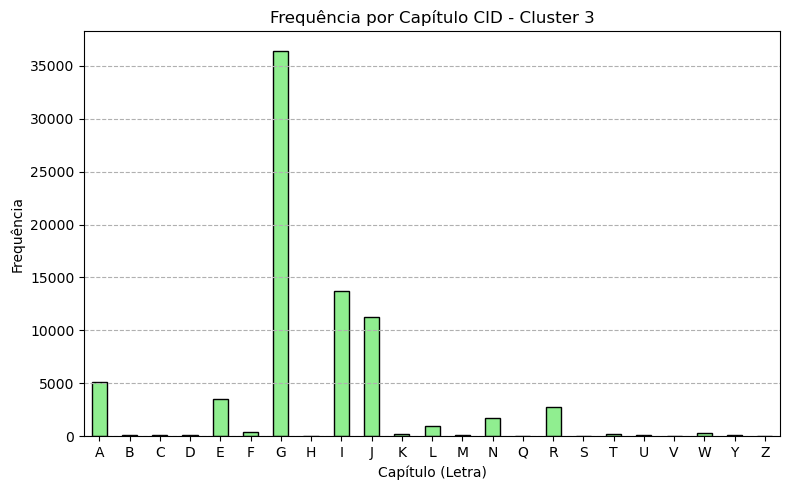

In [130]:
# Pega a primeira letra (capítulo CID)
capitulos = cids_lista_3.str[0]

frequencias_capitulo = capitulos.value_counts().sort_index()

plt.figure(figsize=(8, 5))

frequencias_capitulo.plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Frequência por Capítulo CID - Cluster 3')
plt.xlabel('Capítulo (Letra)')
plt.ylabel('Frequência')
plt.xticks(rotation=0)

#for i, value in enumerate(frequencias_capitulo):
#    plt.text(i, value + 5, str(value), ha='center')

plt.tight_layout()
plt.grid(axis='y', linestyle='--')

plt.show()

Por fim, é possível notar a presença dos capítulo G, I, J, A e R

### Análisando as composições de cada Coluna do cluster1

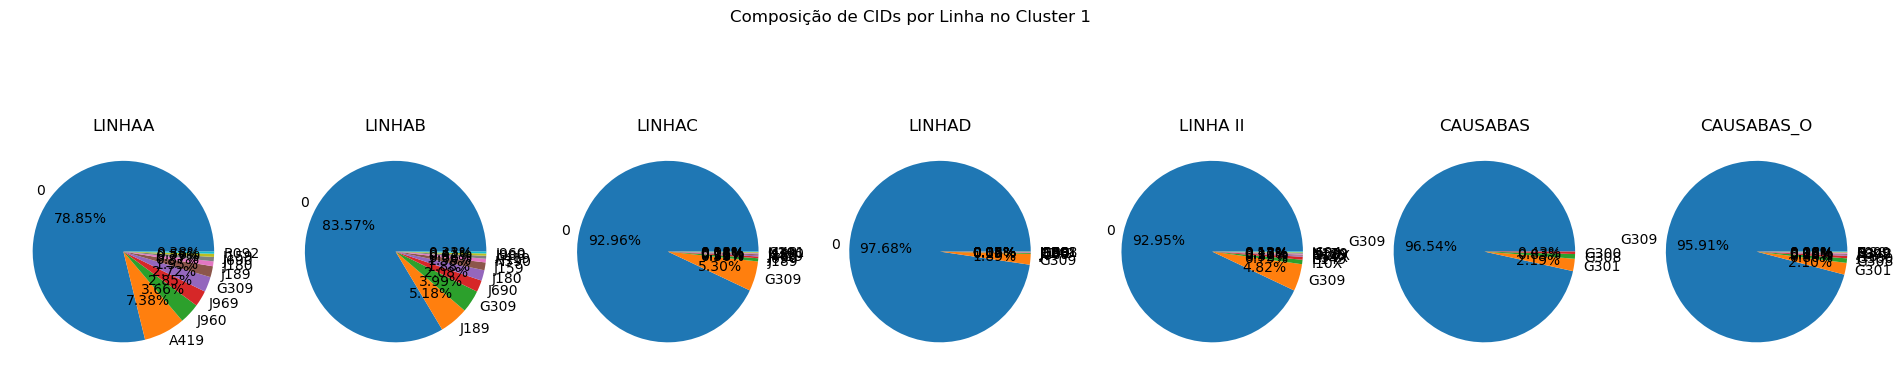

In [133]:
# Junta os dados de cada coluna
linhaa_cids = pd.concat([
    df_cluster_1_descodificado['LINHAA_1'], 
    df_cluster_1_descodificado['LINHAA_2'], 
    df_cluster_1_descodificado['LINHAA_3'], 
    df_cluster_1_descodificado['LINHAA_4']
], ignore_index=True)

linhab_cids = pd.concat([
    df_cluster_1_descodificado['LINHAB_1'], 
    df_cluster_1_descodificado['LINHAB_2'], 
    df_cluster_1_descodificado['LINHAB_3'], 
    df_cluster_1_descodificado['LINHAB_4']
], ignore_index=True)

linhac_cids = pd.concat([
    df_cluster_1_descodificado['LINHAC_1'], 
    df_cluster_1_descodificado['LINHAC_2'], 
    df_cluster_1_descodificado['LINHAC_3'], 
    df_cluster_1_descodificado['LINHAC_4']
], ignore_index=True)

linhad_cids = pd.concat([
    df_cluster_1_descodificado['LINHAD_1'], 
    df_cluster_1_descodificado['LINHAD_2'], 
    df_cluster_1_descodificado['LINHAD_3'], 
    df_cluster_1_descodificado['LINHAD_4']
], ignore_index=True)

linhaII_cids = pd.concat([
    df_cluster_1_descodificado['LINHAII_1'], 
    df_cluster_1_descodificado['LINHAII_2'], 
    df_cluster_1_descodificado['LINHAII_3'], 
    df_cluster_1_descodificado['LINHAII_4'],
    df_cluster_1_descodificado['LINHAII_5'], 
    df_cluster_1_descodificado['LINHAII_6'], 
    df_cluster_1_descodificado['LINHAII_7'], 
    df_cluster_1_descodificado['LINHAII_8'],
    df_cluster_1_descodificado['LINHAII_9']
], ignore_index=True)

# Calcula as contagens
contagemA = linhaa_cids.value_counts().head(10)
contagemB = linhab_cids.value_counts().head(10)
contagemC = linhac_cids.value_counts().head(10)
contagemD = linhad_cids.value_counts().head(10)
contagemII = linhaII_cids.value_counts().head(10)
contagemCausa = df_cluster_1_descodificado['CAUSABAS'].value_counts().head(10)
contagemCausa_o = df_cluster_1_descodificado['CAUSABAS_O'].value_counts().head(10)

# Cria a figura com 5 subplots
fig, axs = plt.subplots(1, 7, figsize=(24, 5))

# LINHAA
axs[0].pie(contagemA.values, labels=contagemA.index, autopct='%1.2f%%')
axs[0].set_title("LINHAA")

# LINHAB
axs[1].pie(contagemB.values, labels=contagemB.index, autopct='%1.2f%%')
axs[1].set_title("LINHAB")

# LINHAC
axs[2].pie(contagemC.values, labels=contagemC.index, autopct='%1.2f%%')
axs[2].set_title("LINHAC")

# LINHAD
axs[3].pie(contagemD.values, labels=contagemD.index, autopct='%1.2f%%')
axs[3].set_title("LINHAD")

# LINHA II
axs[4].pie(contagemII.values, labels=contagemII.index, autopct='%1.2f%%')
axs[4].set_title("LINHA II")

#causabas
axs[5].pie(contagemCausa.values, labels=contagemCausa.index, autopct='%1.2f%%')
axs[5].set_title("CAUSABAS")

#causabas_o
axs[6].pie(contagemCausa_o.values, labels=contagemCausa_o.index, autopct='%1.2f%%')
axs[6].set_title("CAUSABAS_O")

plt.suptitle("Composição de CIDs por Linha no Cluster 1")
plt.show()

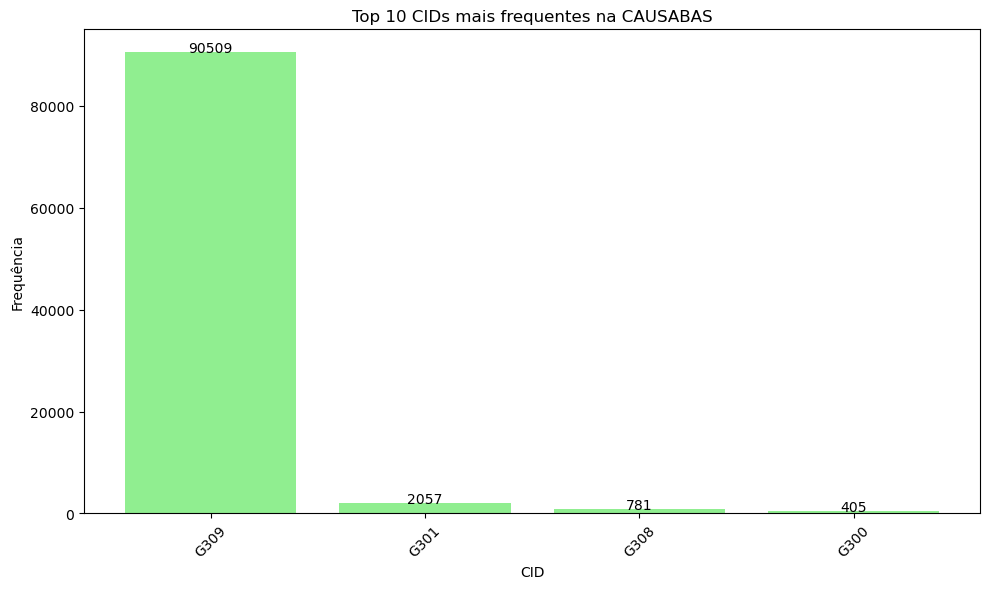

In [134]:
linhaa_col = df_cluster_1_descodificado['CAUSABAS']
contagem = linhaa_col.value_counts()
top10 = contagem.head(10) # top 10

plt.figure(figsize=(10, 6))

plt.bar(top10.index.astype(str), top10.values, color='lightgreen')
plt.xlabel("CID")
plt.ylabel("Frequência")
plt.title("Top 10 CIDs mais frequentes na CAUSABAS")
plt.xticks(rotation=45)

for i, value in enumerate(top10):
    plt.text(i, value, str(value), ha='center')

plt.tight_layout()

plt.show()

Através da sobreposição com piechart, foi possível notar que os possíveis clusters que pertencem ao que classifiquei como 1, possuíam uma predominancia de dados da CAUSABAS. Com essa análise, é possível notar que esse agrupamento foi influenciado pelo CID G309

### Análisando as composições de cada Coluna do cluster2
Através da análise do PieChart, foi possível notar uma maior concentração da LINHAA_1

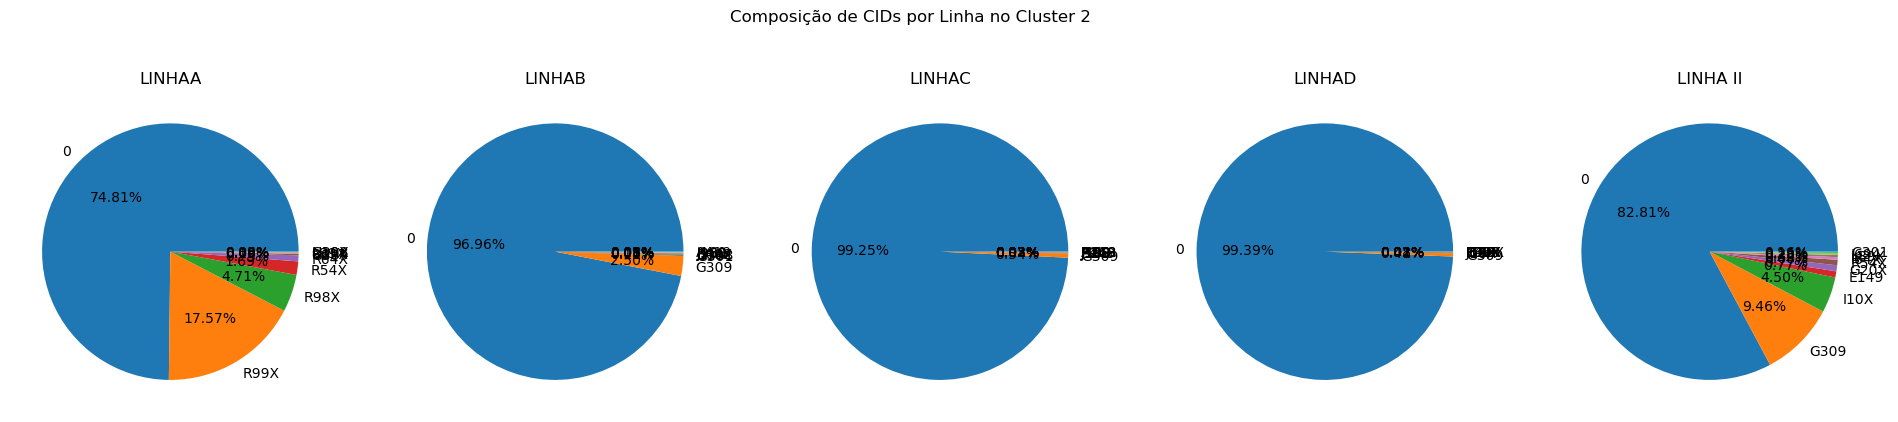

In [137]:
# Junta os dados de cada coluna
linhaa_cids = pd.concat([
    df_cluster_2_descodificado['LINHAA_1'], 
    df_cluster_2_descodificado['LINHAA_2'], 
    df_cluster_2_descodificado['LINHAA_3'], 
    df_cluster_2_descodificado['LINHAA_4']
], ignore_index=True)

linhab_cids = pd.concat([
    df_cluster_2_descodificado['LINHAB_1'], 
    df_cluster_2_descodificado['LINHAB_2'], 
    df_cluster_2_descodificado['LINHAB_3'], 
    df_cluster_2_descodificado['LINHAB_4']
], ignore_index=True)

linhac_cids = pd.concat([
    df_cluster_2_descodificado['LINHAC_1'], 
    df_cluster_2_descodificado['LINHAC_2'], 
    df_cluster_2_descodificado['LINHAC_3'], 
    df_cluster_2_descodificado['LINHAC_4']
], ignore_index=True)

linhad_cids = pd.concat([
    df_cluster_2_descodificado['LINHAD_1'], 
    df_cluster_2_descodificado['LINHAD_2'], 
    df_cluster_2_descodificado['LINHAD_3'], 
    df_cluster_2_descodificado['LINHAD_4']
], ignore_index=True)

linhaII_cids = pd.concat([
    df_cluster_2_descodificado['LINHAII_1'], 
    df_cluster_2_descodificado['LINHAII_2'], 
    df_cluster_2_descodificado['LINHAII_3'], 
    df_cluster_2_descodificado['LINHAII_4'],
    df_cluster_2_descodificado['LINHAII_5'], 
    df_cluster_2_descodificado['LINHAII_6'], 
    df_cluster_2_descodificado['LINHAII_7'], 
    df_cluster_2_descodificado['LINHAII_8'],
    df_cluster_2_descodificado['LINHAII_9']
], ignore_index=True)

# Calcula as contagens
contagemA = linhaa_cids.value_counts().head(10)
contagemB = linhab_cids.value_counts().head(10)
contagemC = linhac_cids.value_counts().head(10)
contagemD = linhad_cids.value_counts().head(10)
contagemII = linhaII_cids.value_counts().head(10)

# Cria a figura com 5 subplots
fig, axs = plt.subplots(1, 5, figsize=(24, 5))

# LINHAA
axs[0].pie(contagemA.values, labels=contagemA.index, autopct='%1.2f%%')
axs[0].set_title("LINHAA")

# LINHAB
axs[1].pie(contagemB.values, labels=contagemB.index, autopct='%1.2f%%')
axs[1].set_title("LINHAB")

# LINHAC
axs[2].pie(contagemC.values, labels=contagemC.index, autopct='%1.2f%%')
axs[2].set_title("LINHAC")

# LINHAD
axs[3].pie(contagemD.values, labels=contagemD.index, autopct='%1.2f%%')
axs[3].set_title("LINHAD")

# LINHA II
axs[4].pie(contagemII.values, labels=contagemII.index, autopct='%1.2f%%')
axs[4].set_title("LINHA II")

plt.suptitle("Composição de CIDs por Linha no Cluster 2")
plt.show()

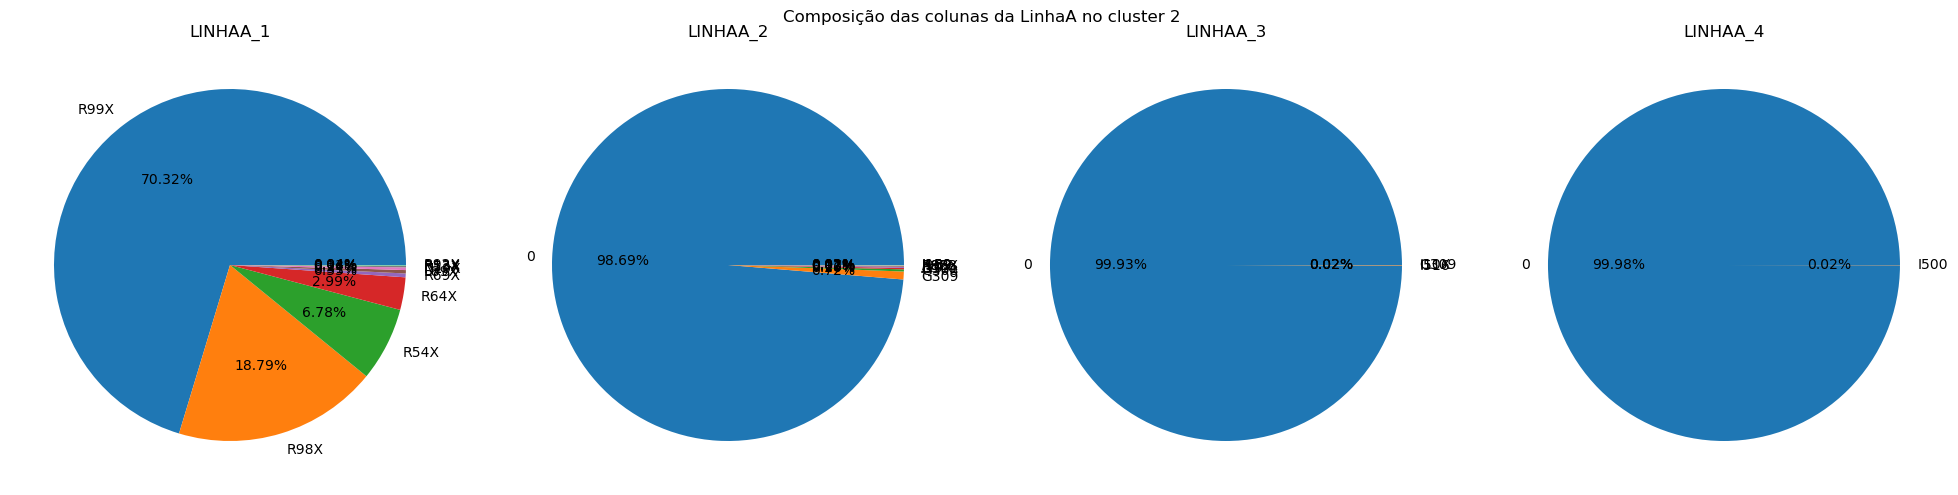

In [244]:
colunas = ['LINHAA_1', 'LINHAA_2', 'LINHAA_3', 'LINHAA_4']
fig, axs = plt.subplots(1, len(colunas), figsize=(20, 5)) 

for i, coluna in enumerate(colunas):
    contagem = df_cluster_2_descodificado[coluna].value_counts().head(10)  # filtrando pelo top 10 cids
    axs[i].pie(contagem.values, labels=contagem.index, autopct='%1.2f%%')
    axs[i].set_title(f'{coluna}')

plt.suptitle('Composição das colunas da LinhaA no cluster 2')
plt.tight_layout()

plt.show()

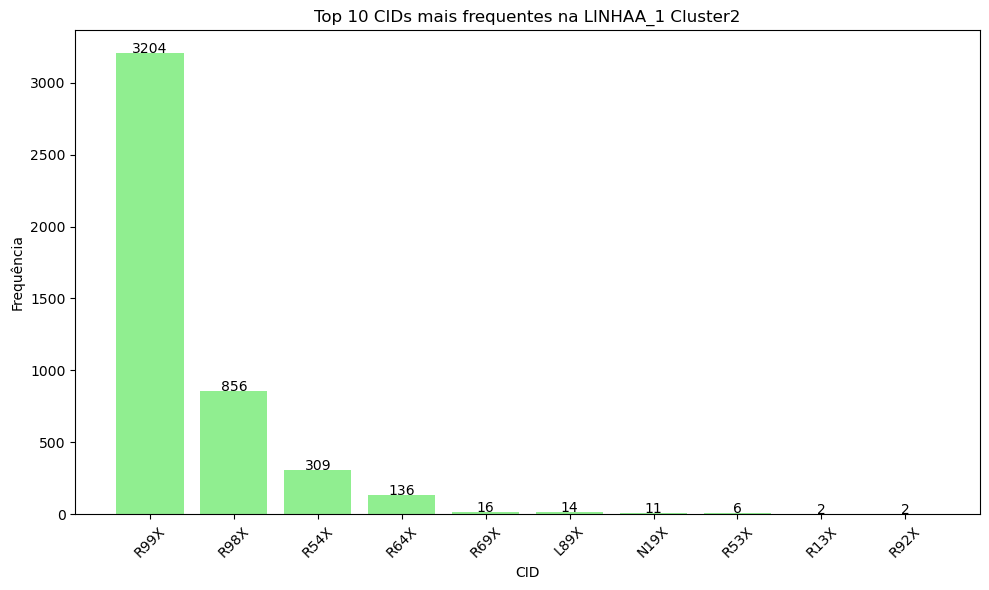

In [139]:
linhac_col = df_cluster_2_descodificado['LINHAA_1']
contagem = linhac_col.value_counts()
top10 = contagem.head(10)

plt.figure(figsize=(10, 6))
plt.bar(top10.index.astype(str), top10.values, color='lightgreen')
plt.xlabel("CID")
plt.ylabel("Frequência")
plt.title("Top 10 CIDs mais frequentes na LINHAA_1 Cluster2")
plt.xticks(rotation=45)

for i, value in enumerate(top10):
    plt.text(i, value, str(value), ha='center')

plt.tight_layout()
plt.show()

os CIDs com maior presença na LINHAA\_1 foram os CIDs R99X, R98X, R54X, R64X.

### Análisando as composições de cada Coluna do cluster3
Ao observer o PieChart, foi possível notar a predominância de LINHAII_1

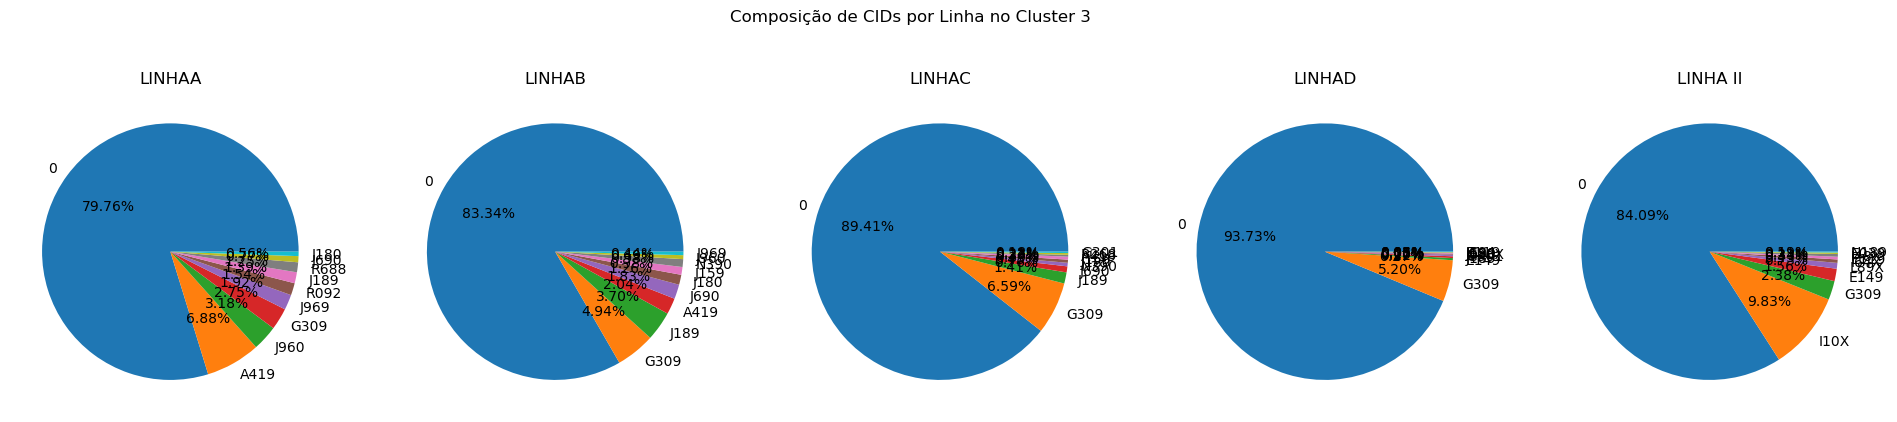

In [142]:
# Junta os dados de cada coluna
linhaa_cids = pd.concat([
    df_cluster_3_descodificado['LINHAA_1'], 
    df_cluster_3_descodificado['LINHAA_2'], 
    df_cluster_3_descodificado['LINHAA_3'], 
    df_cluster_3_descodificado['LINHAA_4']
], ignore_index=True)

linhab_cids = pd.concat([
    df_cluster_3_descodificado['LINHAB_1'], 
    df_cluster_3_descodificado['LINHAB_2'], 
    df_cluster_3_descodificado['LINHAB_3'], 
    df_cluster_3_descodificado['LINHAB_4']
], ignore_index=True)

linhac_cids = pd.concat([
    df_cluster_3_descodificado['LINHAC_1'], 
    df_cluster_3_descodificado['LINHAC_2'], 
    df_cluster_3_descodificado['LINHAC_3'], 
    df_cluster_3_descodificado['LINHAC_4']
], ignore_index=True)

linhad_cids = pd.concat([
    df_cluster_3_descodificado['LINHAD_1'], 
    df_cluster_3_descodificado['LINHAD_2'], 
    df_cluster_3_descodificado['LINHAD_3'], 
    df_cluster_3_descodificado['LINHAD_4']
], ignore_index=True)

linhaII_cids = pd.concat([
    df_cluster_3_descodificado['LINHAII_1'], 
    df_cluster_3_descodificado['LINHAII_2'], 
    df_cluster_3_descodificado['LINHAII_3'], 
    df_cluster_3_descodificado['LINHAII_4'],
    df_cluster_3_descodificado['LINHAII_5'], 
    df_cluster_3_descodificado['LINHAII_6'], 
    df_cluster_3_descodificado['LINHAII_7'], 
    df_cluster_3_descodificado['LINHAII_8'],
    df_cluster_3_descodificado['LINHAII_9']
], ignore_index=True)

# Calcula as contagens
contagemA = linhaa_cids.value_counts().head(10)
contagemB = linhab_cids.value_counts().head(10)
contagemC = linhac_cids.value_counts().head(10)
contagemD = linhad_cids.value_counts().head(10)
contagemII = linhaII_cids.value_counts().head(10)

# Cria a figura com 5 subplots
fig, axs = plt.subplots(1, 5, figsize=(24, 5))

# LINHAA
axs[0].pie(contagemA.values, labels=contagemA.index, autopct='%1.2f%%')
axs[0].set_title("LINHAA")

# LINHAB
axs[1].pie(contagemB.values, labels=contagemB.index, autopct='%1.2f%%')
axs[1].set_title("LINHAB")

# LINHAC
axs[2].pie(contagemC.values, labels=contagemC.index, autopct='%1.2f%%')
axs[2].set_title("LINHAC")

# LINHAD
axs[3].pie(contagemD.values, labels=contagemD.index, autopct='%1.2f%%')
axs[3].set_title("LINHAD")

# LINHA II
axs[4].pie(contagemII.values, labels=contagemII.index, autopct='%1.2f%%')
axs[4].set_title("LINHA II")

plt.suptitle("Composição de CIDs por Linha no Cluster 3")
plt.show()

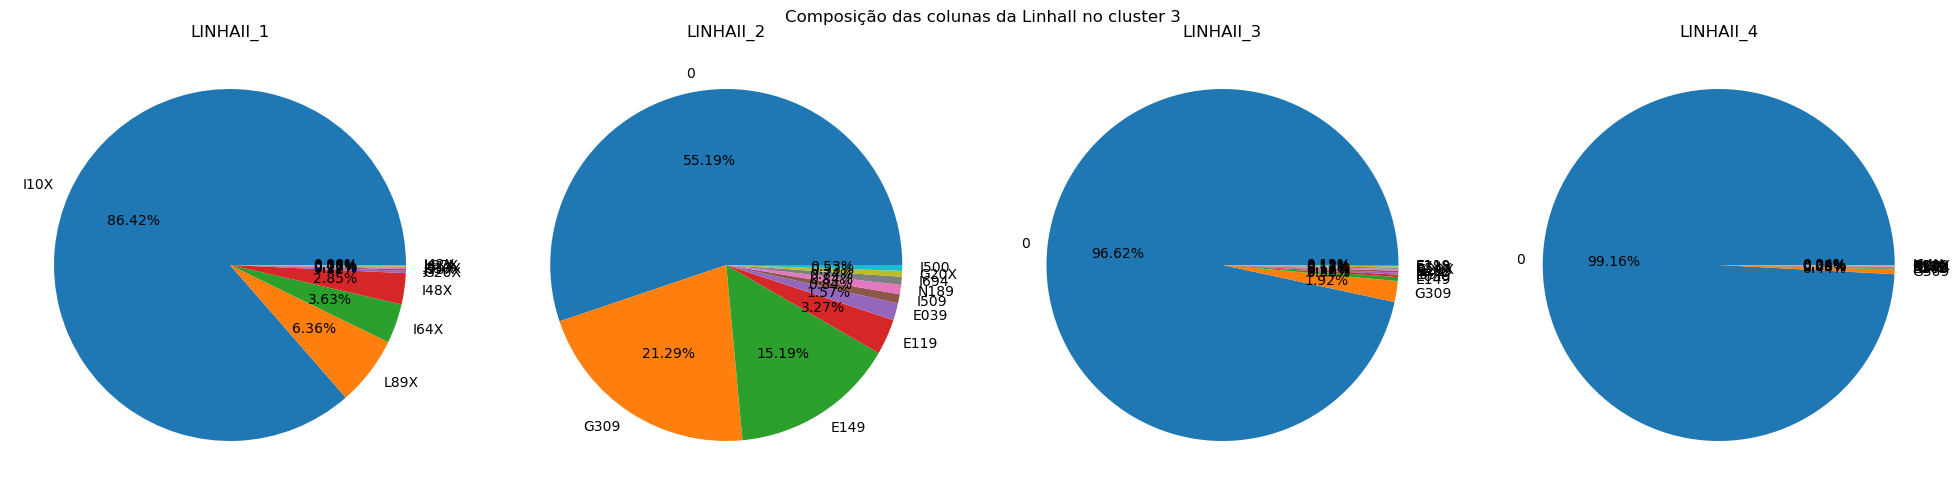

In [247]:
colunas = ['LINHAII_1', 'LINHAII_2', 'LINHAII_3', 'LINHAII_4']
fig, axs = plt.subplots(1, len(colunas), figsize=(20, 5)) 

for i, coluna in enumerate(colunas):
    contagem = df_cluster_3_descodificado[coluna].value_counts().head(10)  # filtrando pelo top 10 cids
    axs[i].pie(contagem.values, labels=contagem.index, autopct='%1.2f%%')
    axs[i].set_title(f'{coluna}')

plt.suptitle('Composição das colunas da LinhaII no cluster 3')
plt.tight_layout()

plt.show()

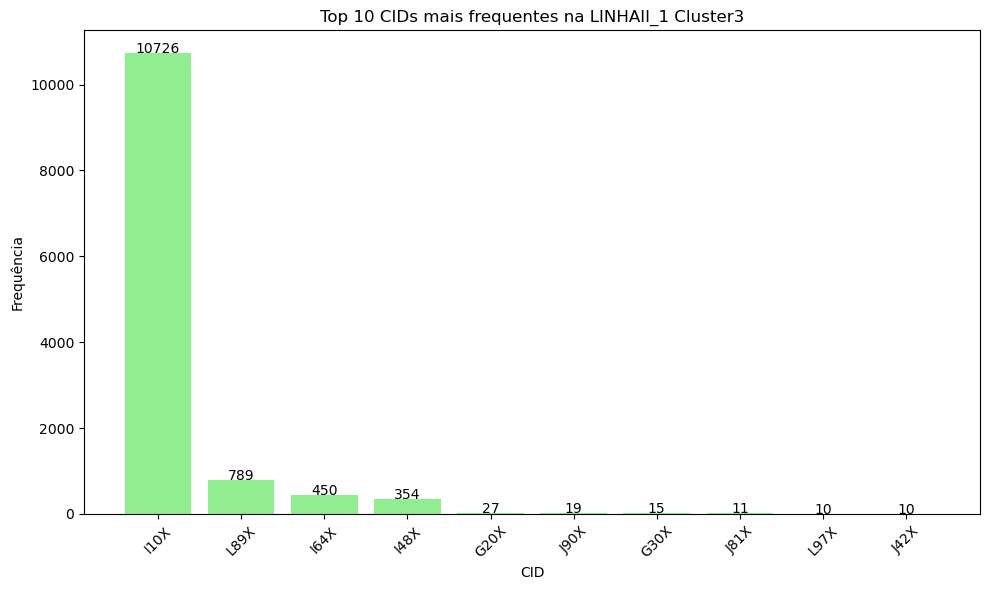

In [143]:
linhac_col = df_cluster_3_descodificado['LINHAII_1']
contagem = linhac_col.value_counts()
top10 = contagem.head(10)

plt.figure(figsize=(10, 6))
plt.bar(top10.index.astype(str), top10.values, color='lightgreen')
plt.xlabel("CID")
plt.ylabel("Frequência")
plt.title("Top 10 CIDs mais frequentes na LINHAII_1 Cluster3")
plt.xticks(rotation=45)

for i, value in enumerate(top10):
    plt.text(i, value, str(value), ha='center')

plt.tight_layout()
plt.show()